In [70]:
# import things we're going to need
# Libraries

import numpy as np
import os
import glob
import librosa
import random
import librosa.display
from tqdm import tqdm_notebook as tqdm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
import matplotlib.pyplot as plt


import IPython.display as ipd

In [71]:
# Audio Directory
audio_dir = 'multiple_dir/'

# Result directory
resultsDirectory = "/MFCCresults"

# # mfcc images directory
# mfcc_images = 'mfcc_images/'

# # Result directory
# resultsDirectory = [mfcc_images + "bulldozer", mfcc_images + "dump_truck", mfcc_images + "excavator"]

In [72]:
# filename = os.path.split(audio_dir)[0]
# filename_wout_ext = filename.split('.')[0]
# print(filename_wout_ext)

In [73]:
# make a new folder in this directory to save our results in
for resultsDirectory in resultsDirectory:
    
    if not os.path.exists(resultsDirectory):
        os.makedirs(resultsDirectory)

In [74]:
# Audio Labels
CATEGORIES = ["bulldozer", "dump_truck", "excavator"]

0
1
2


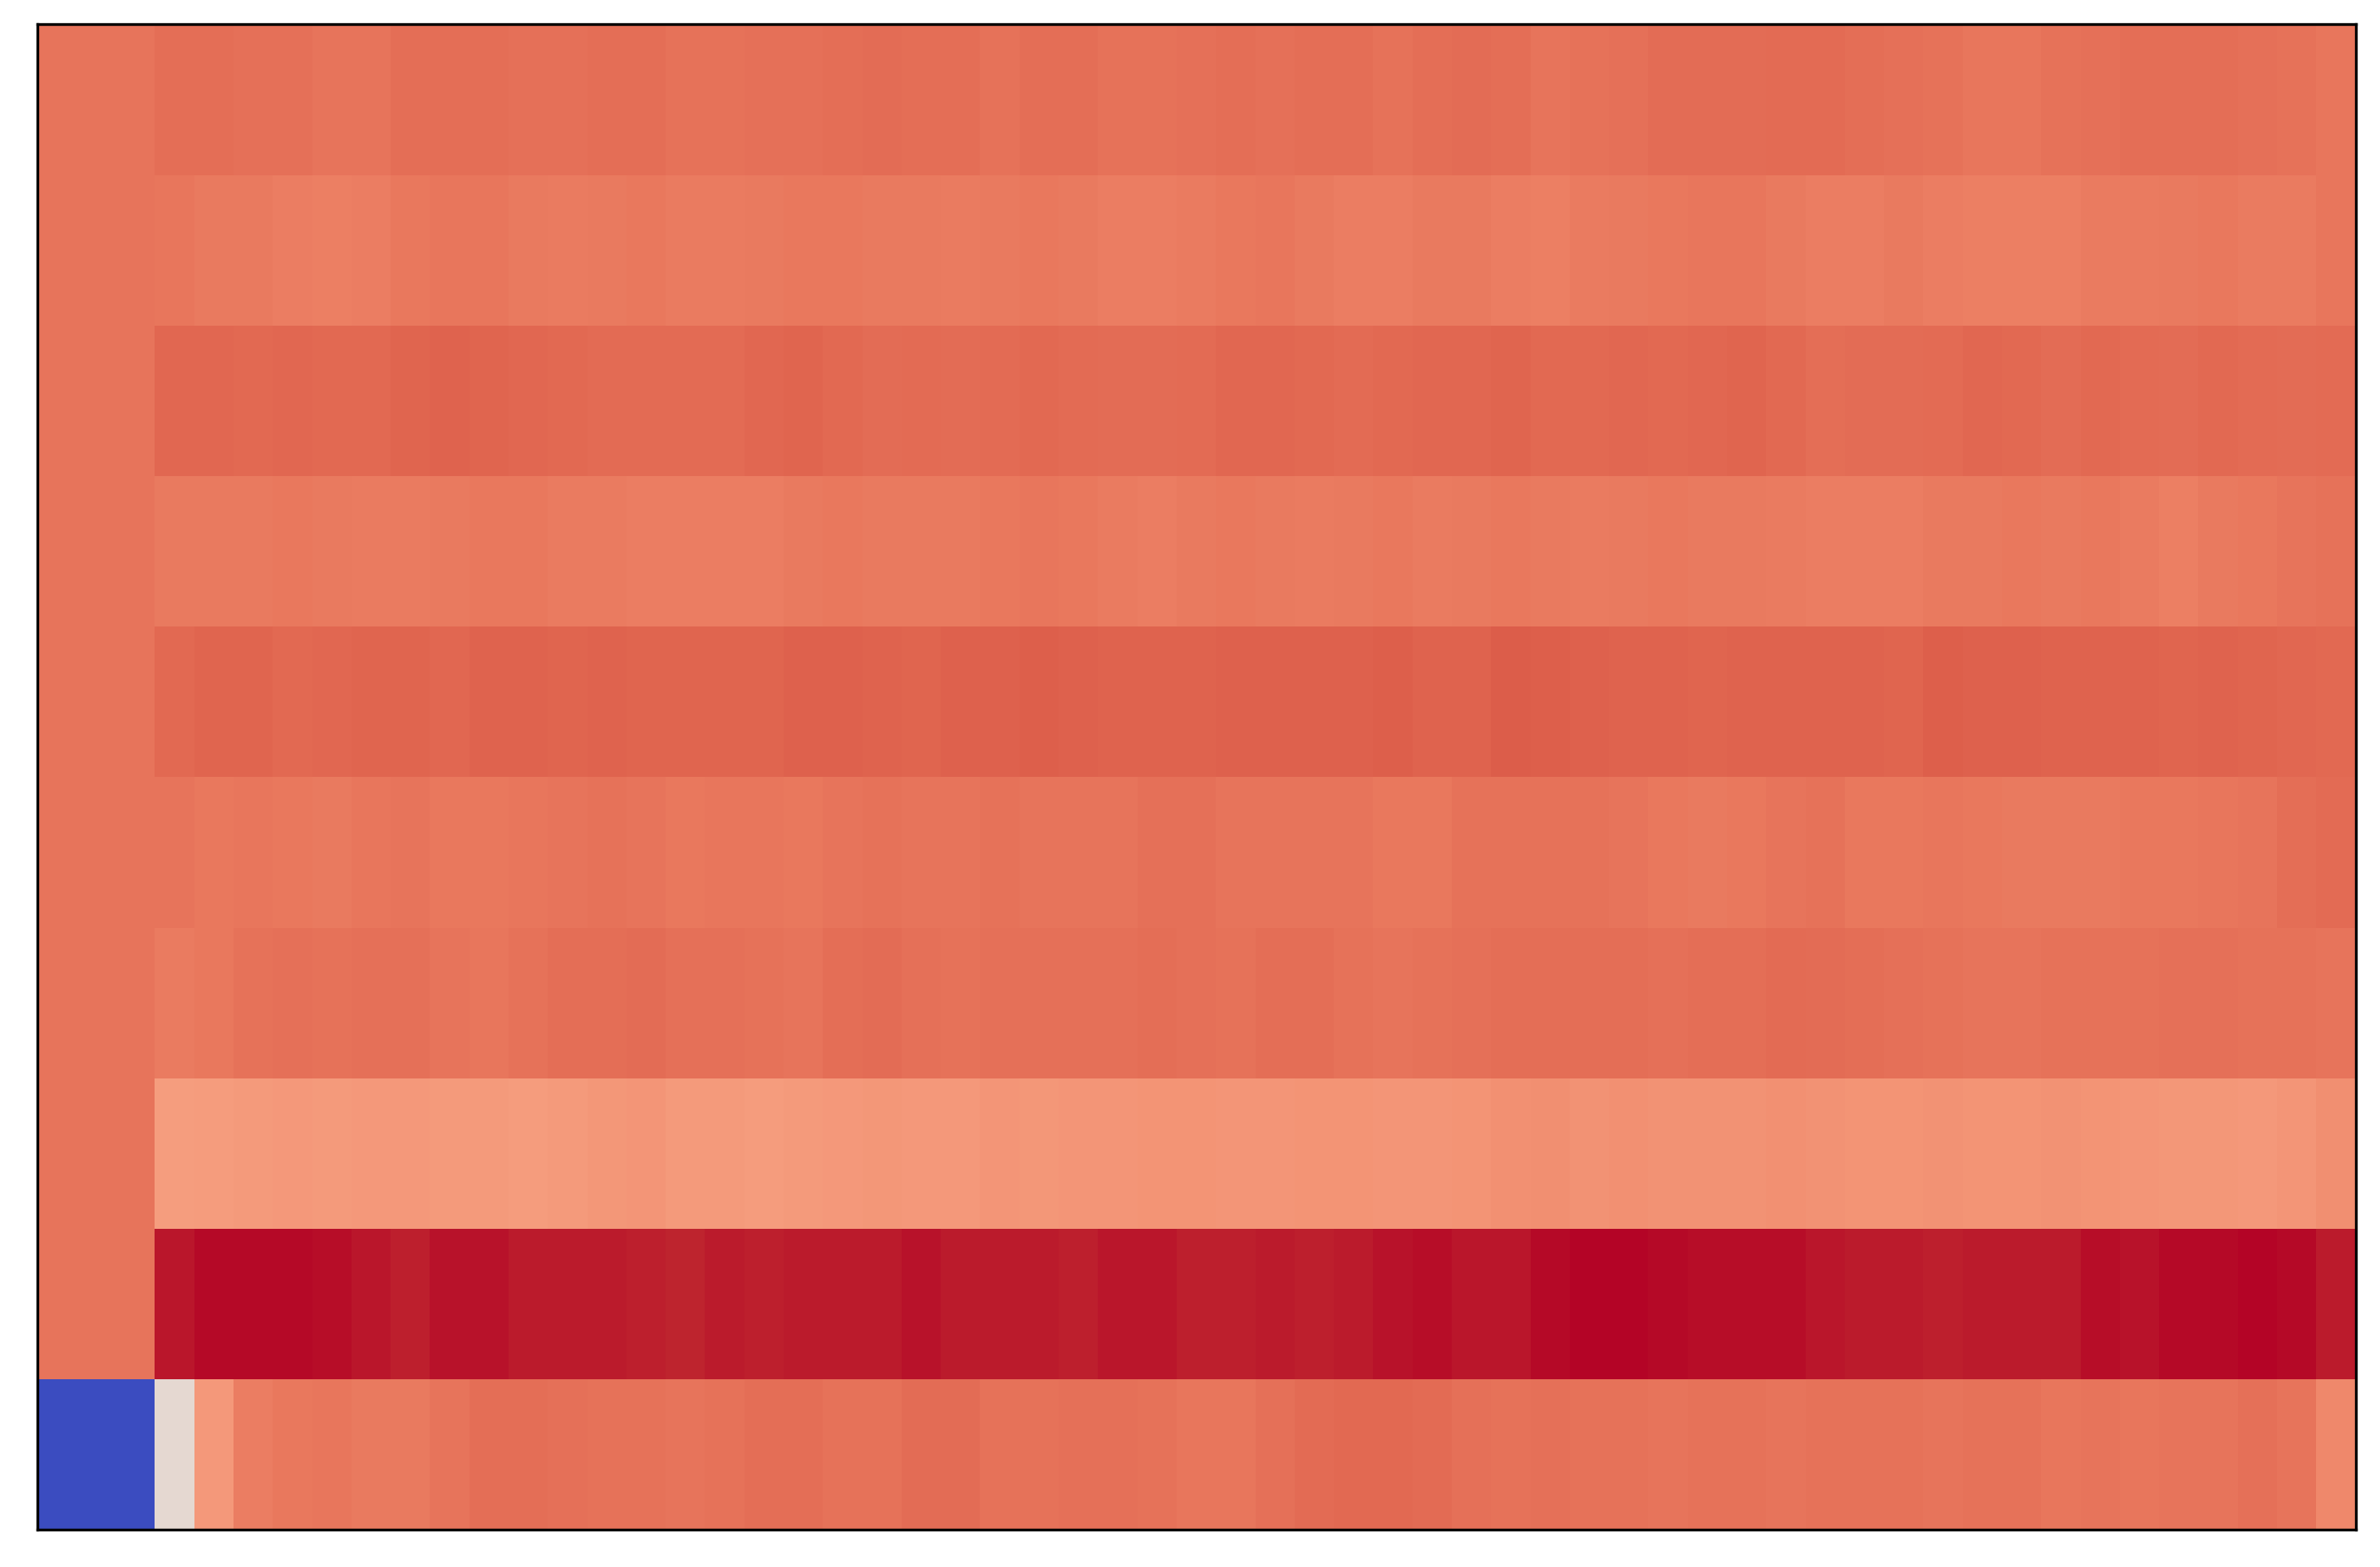

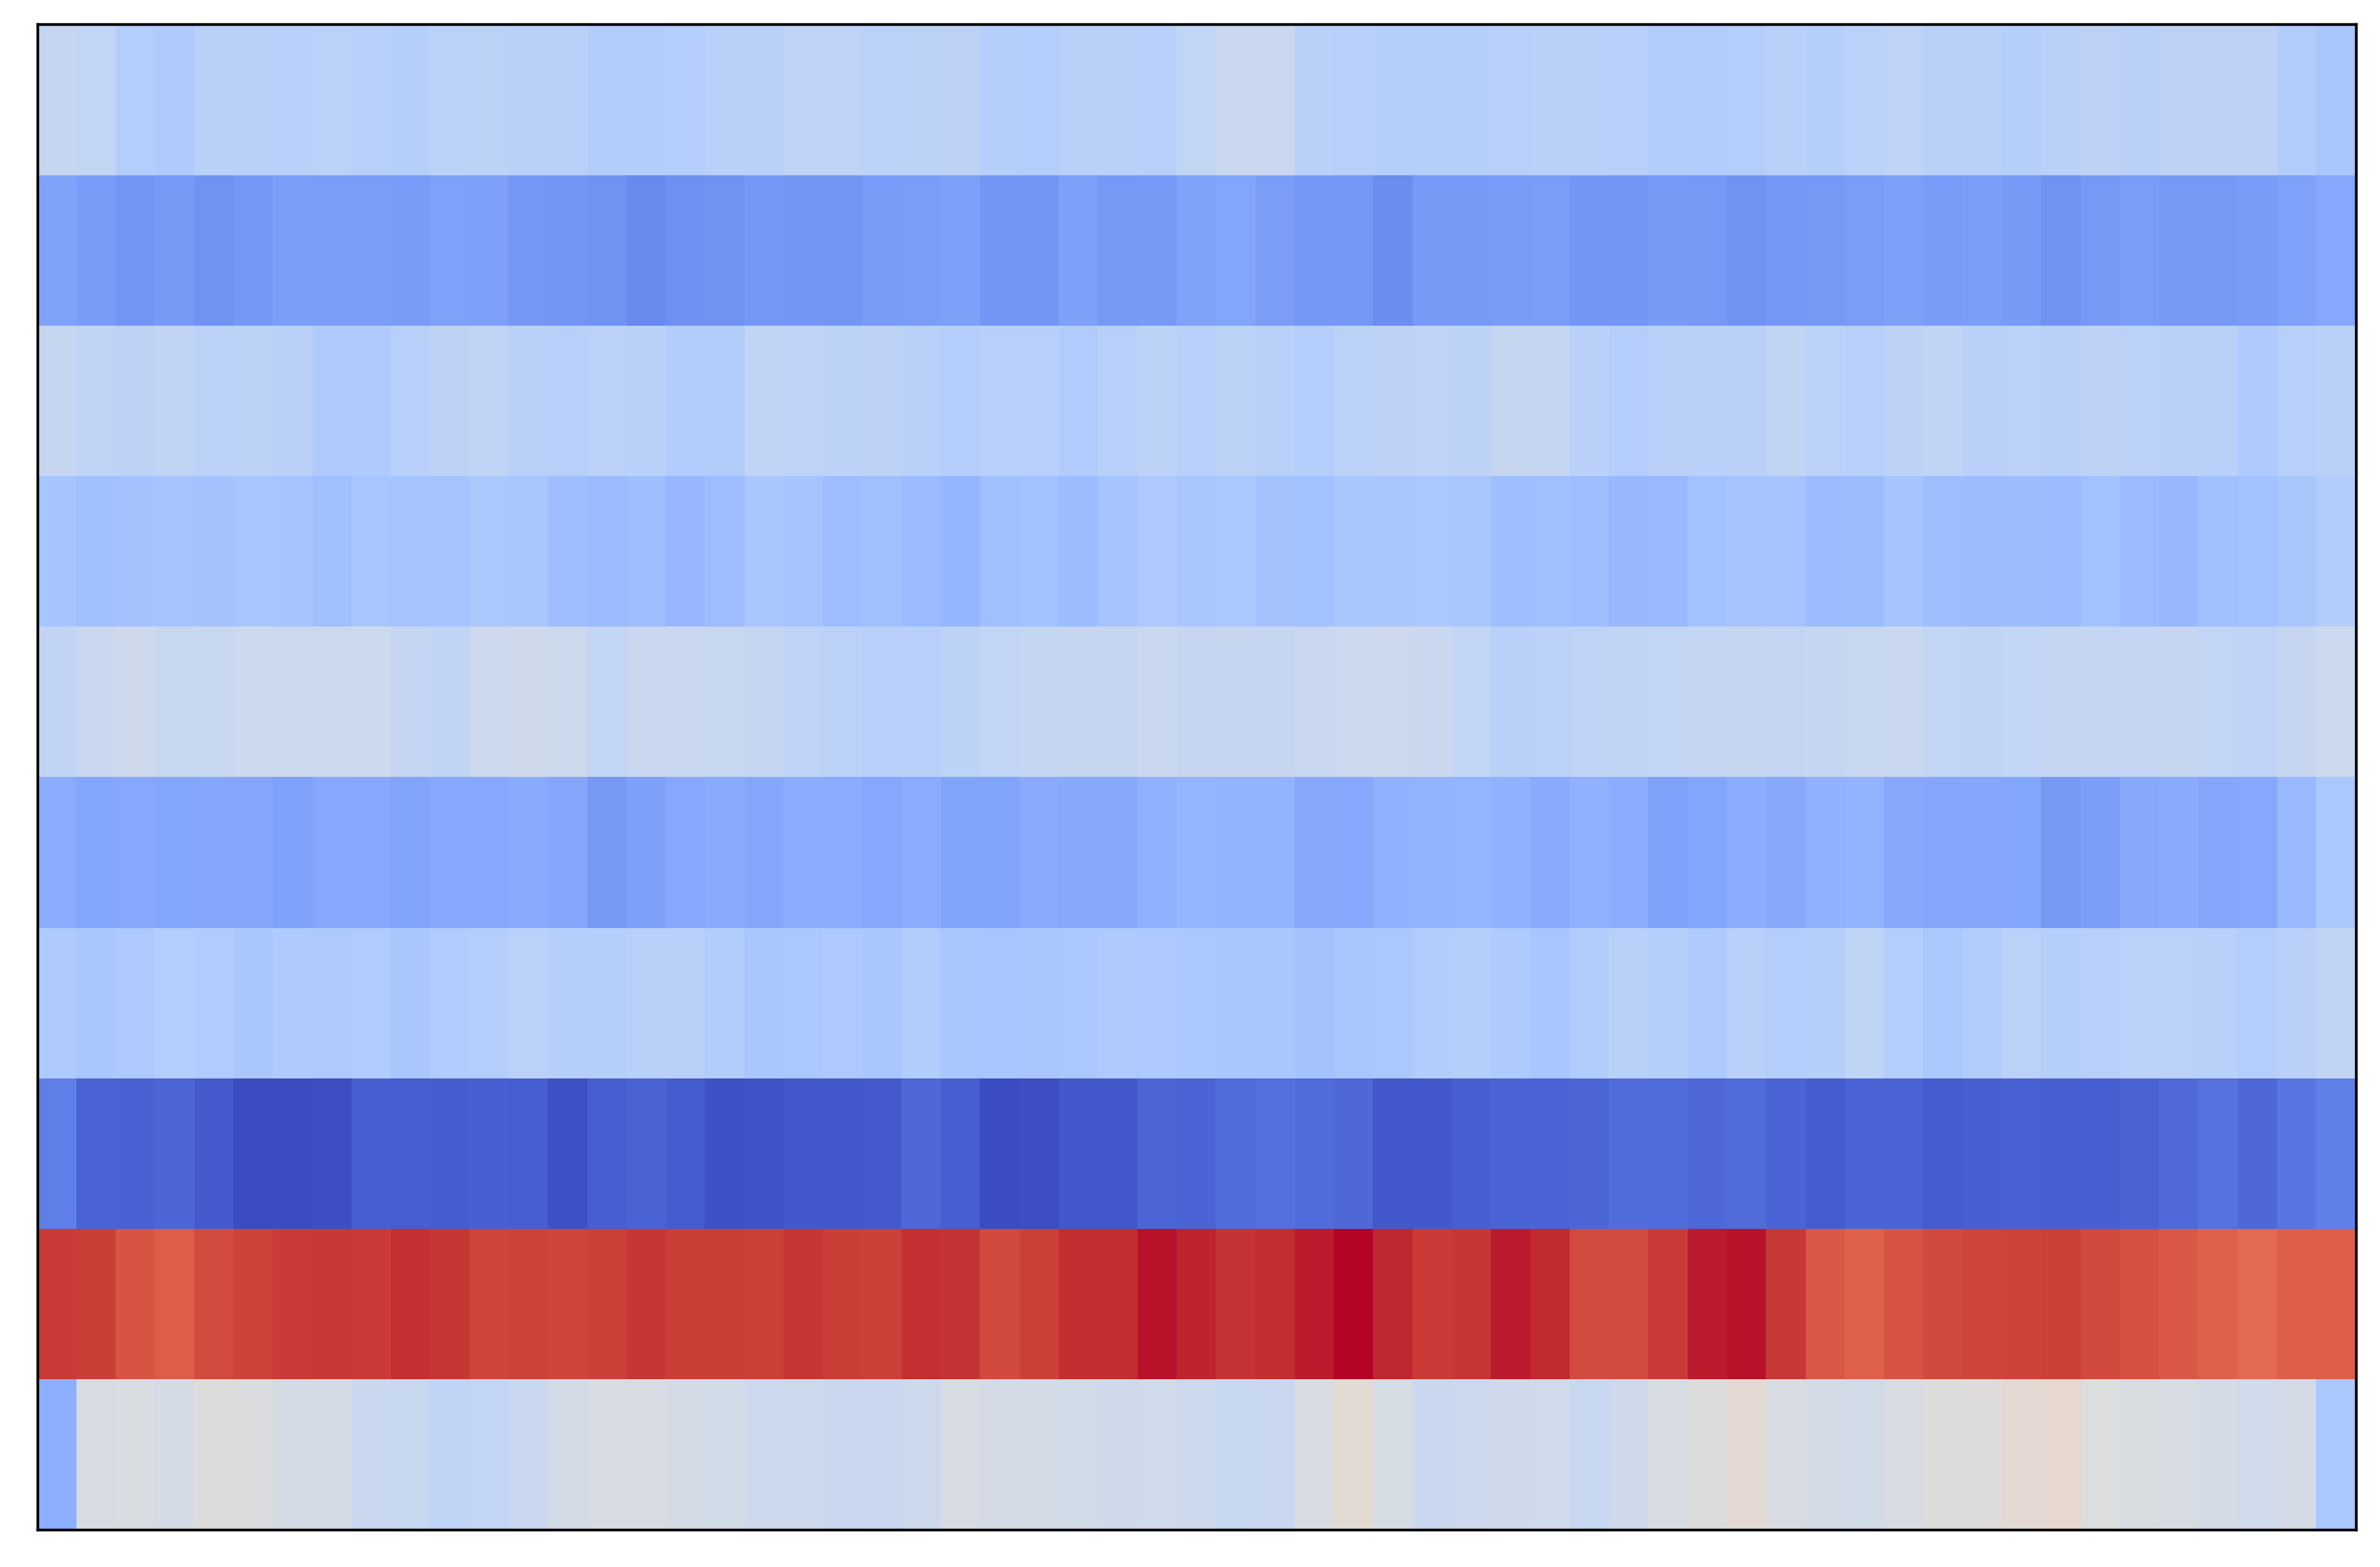

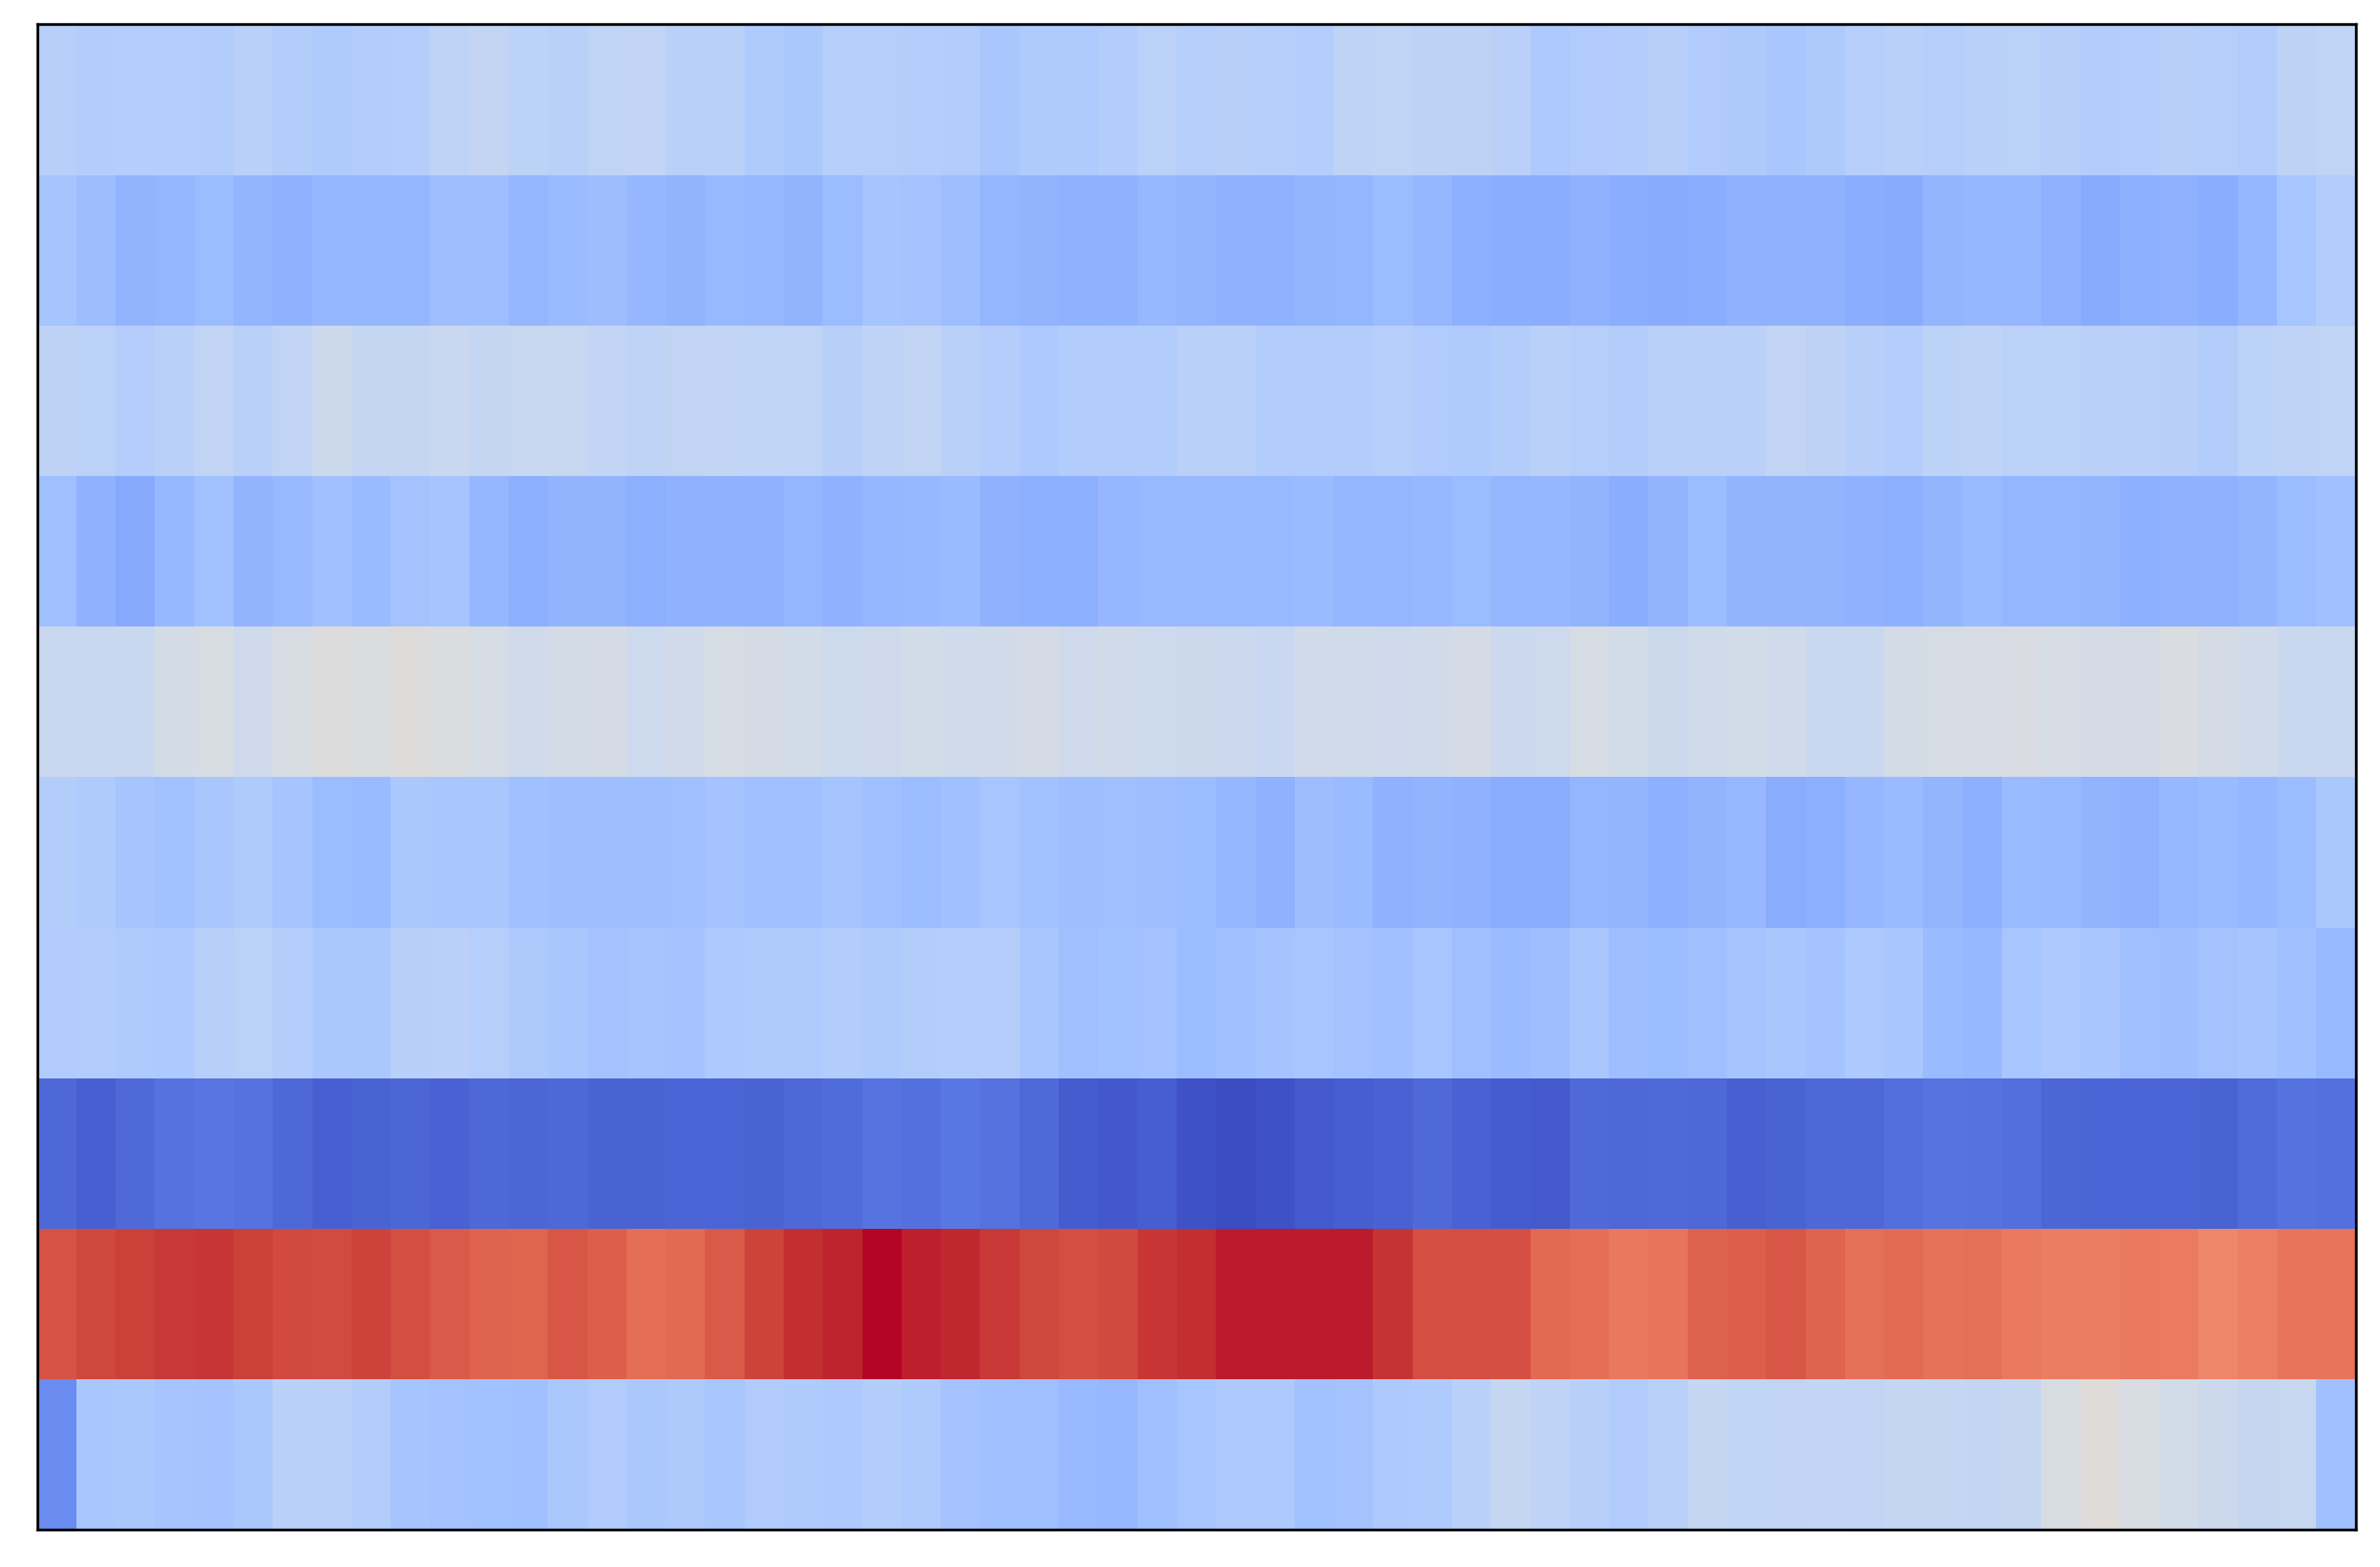

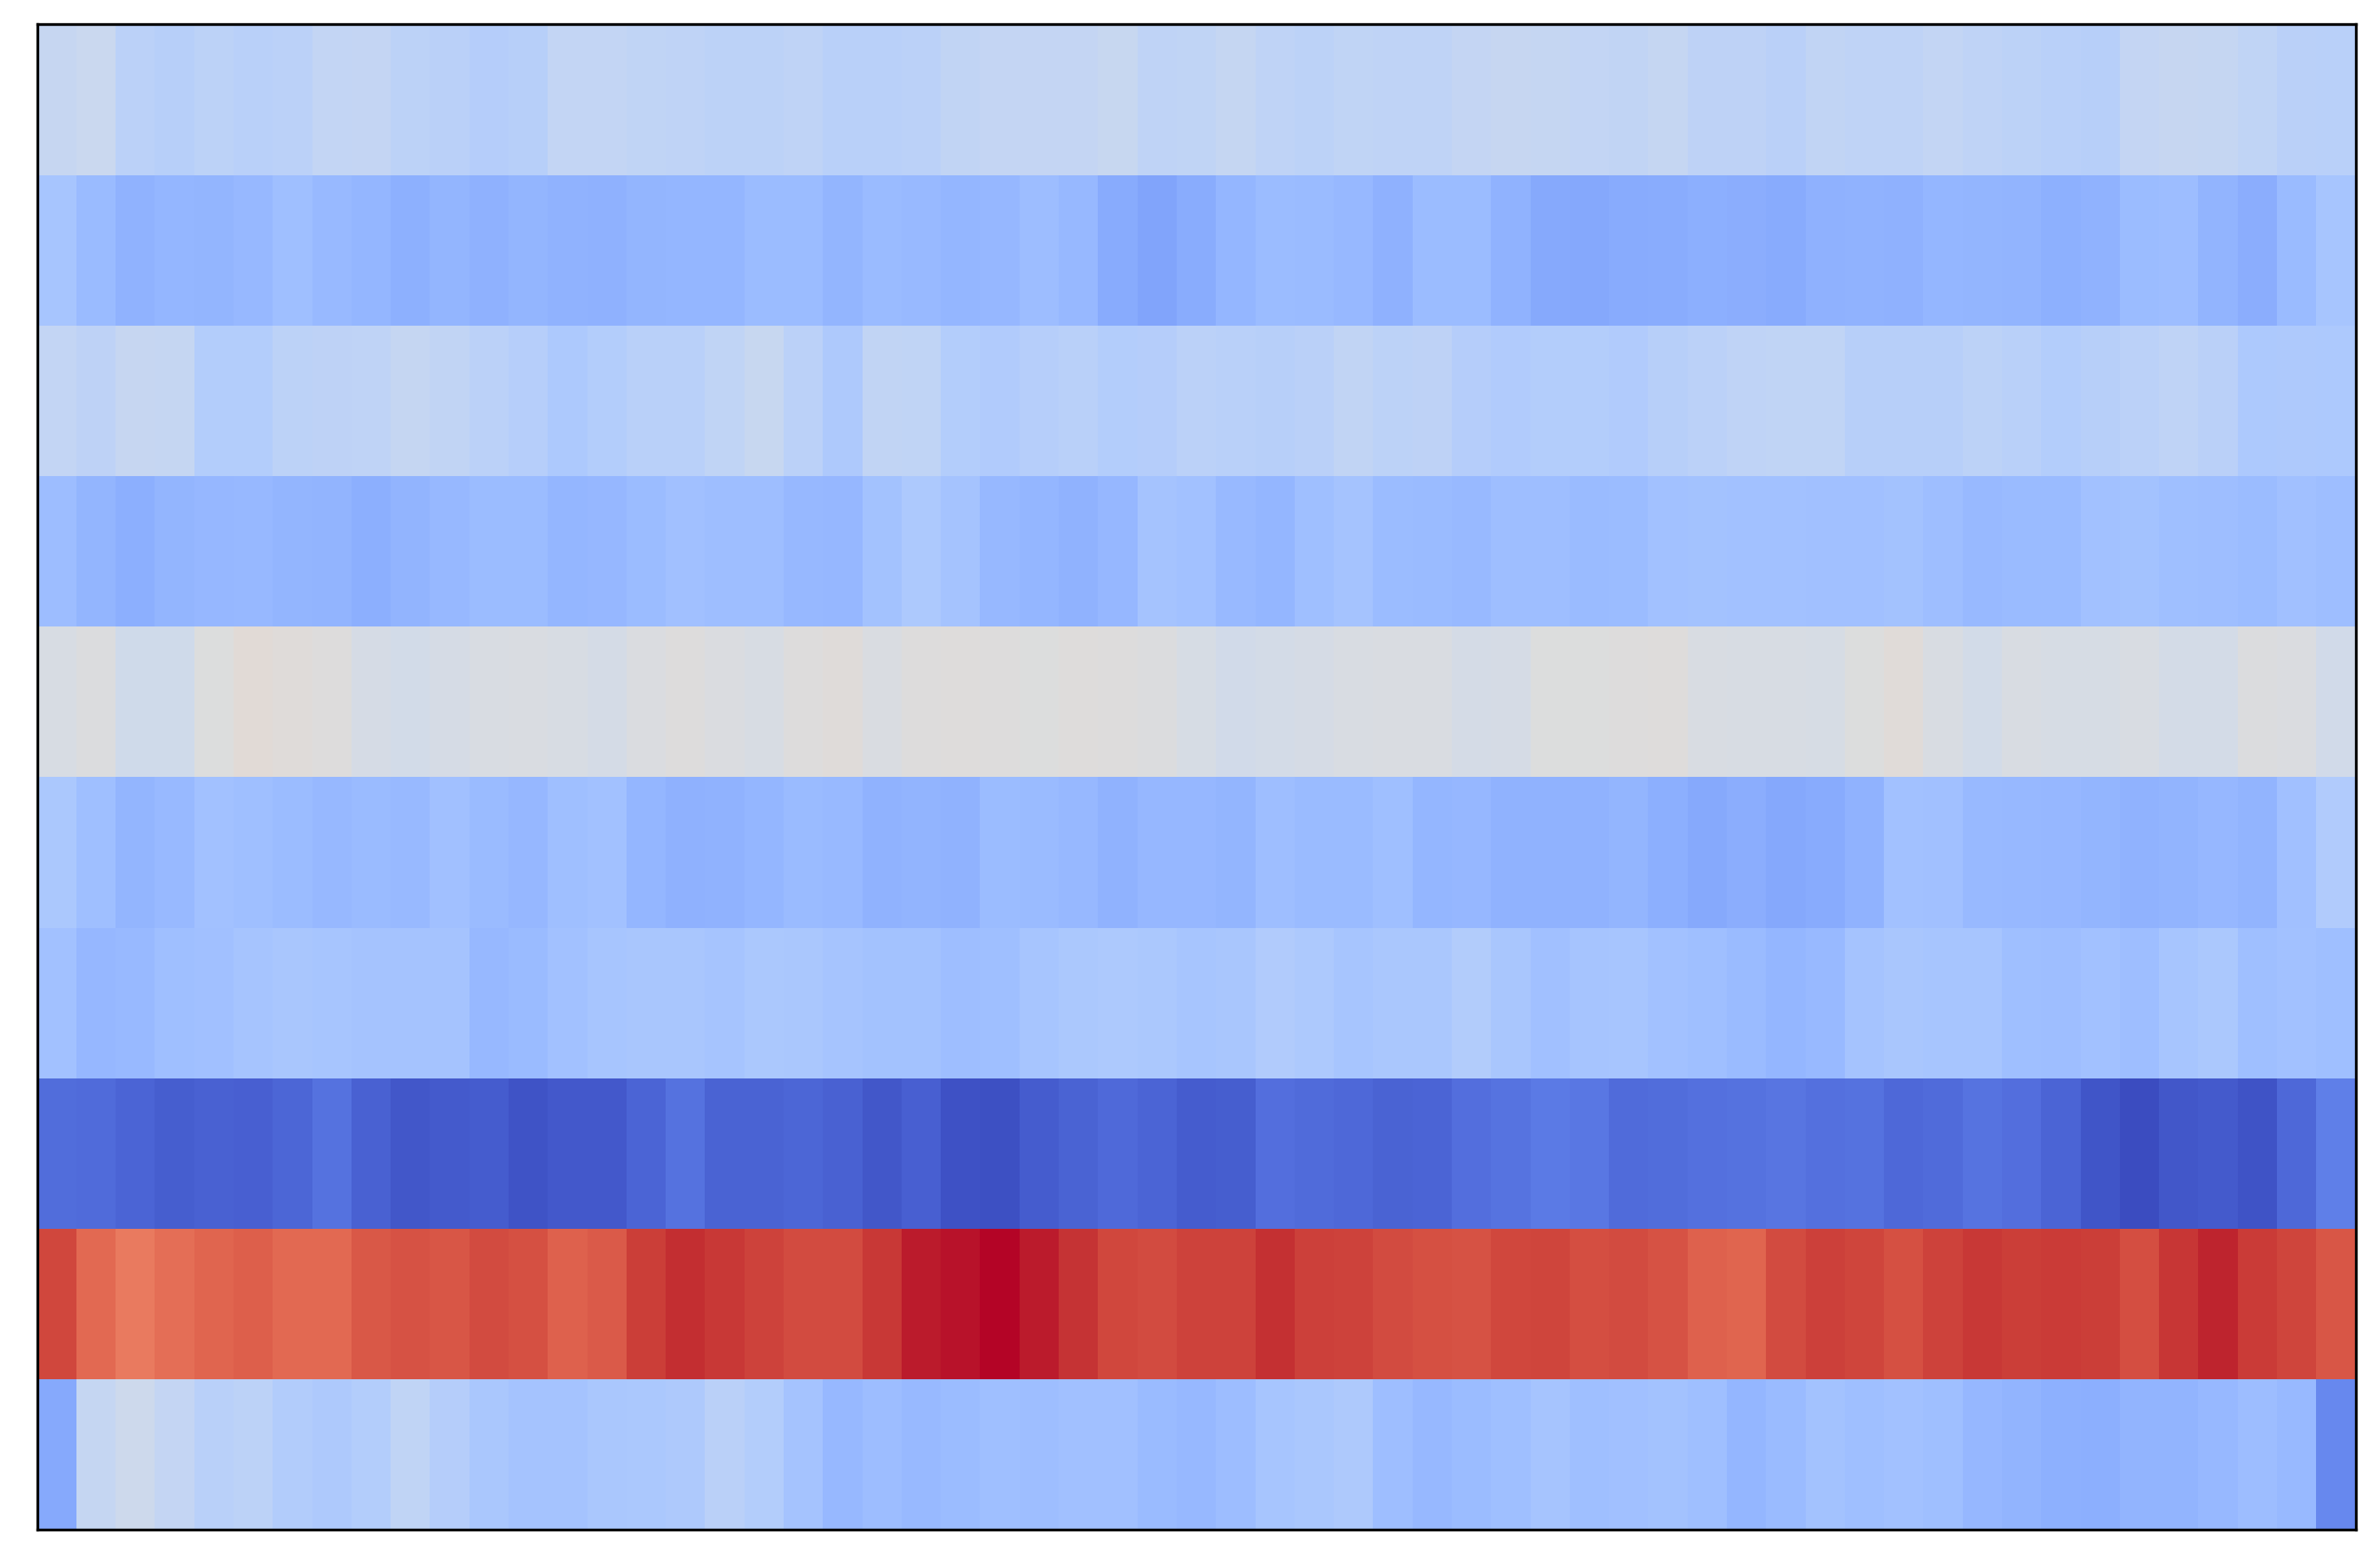

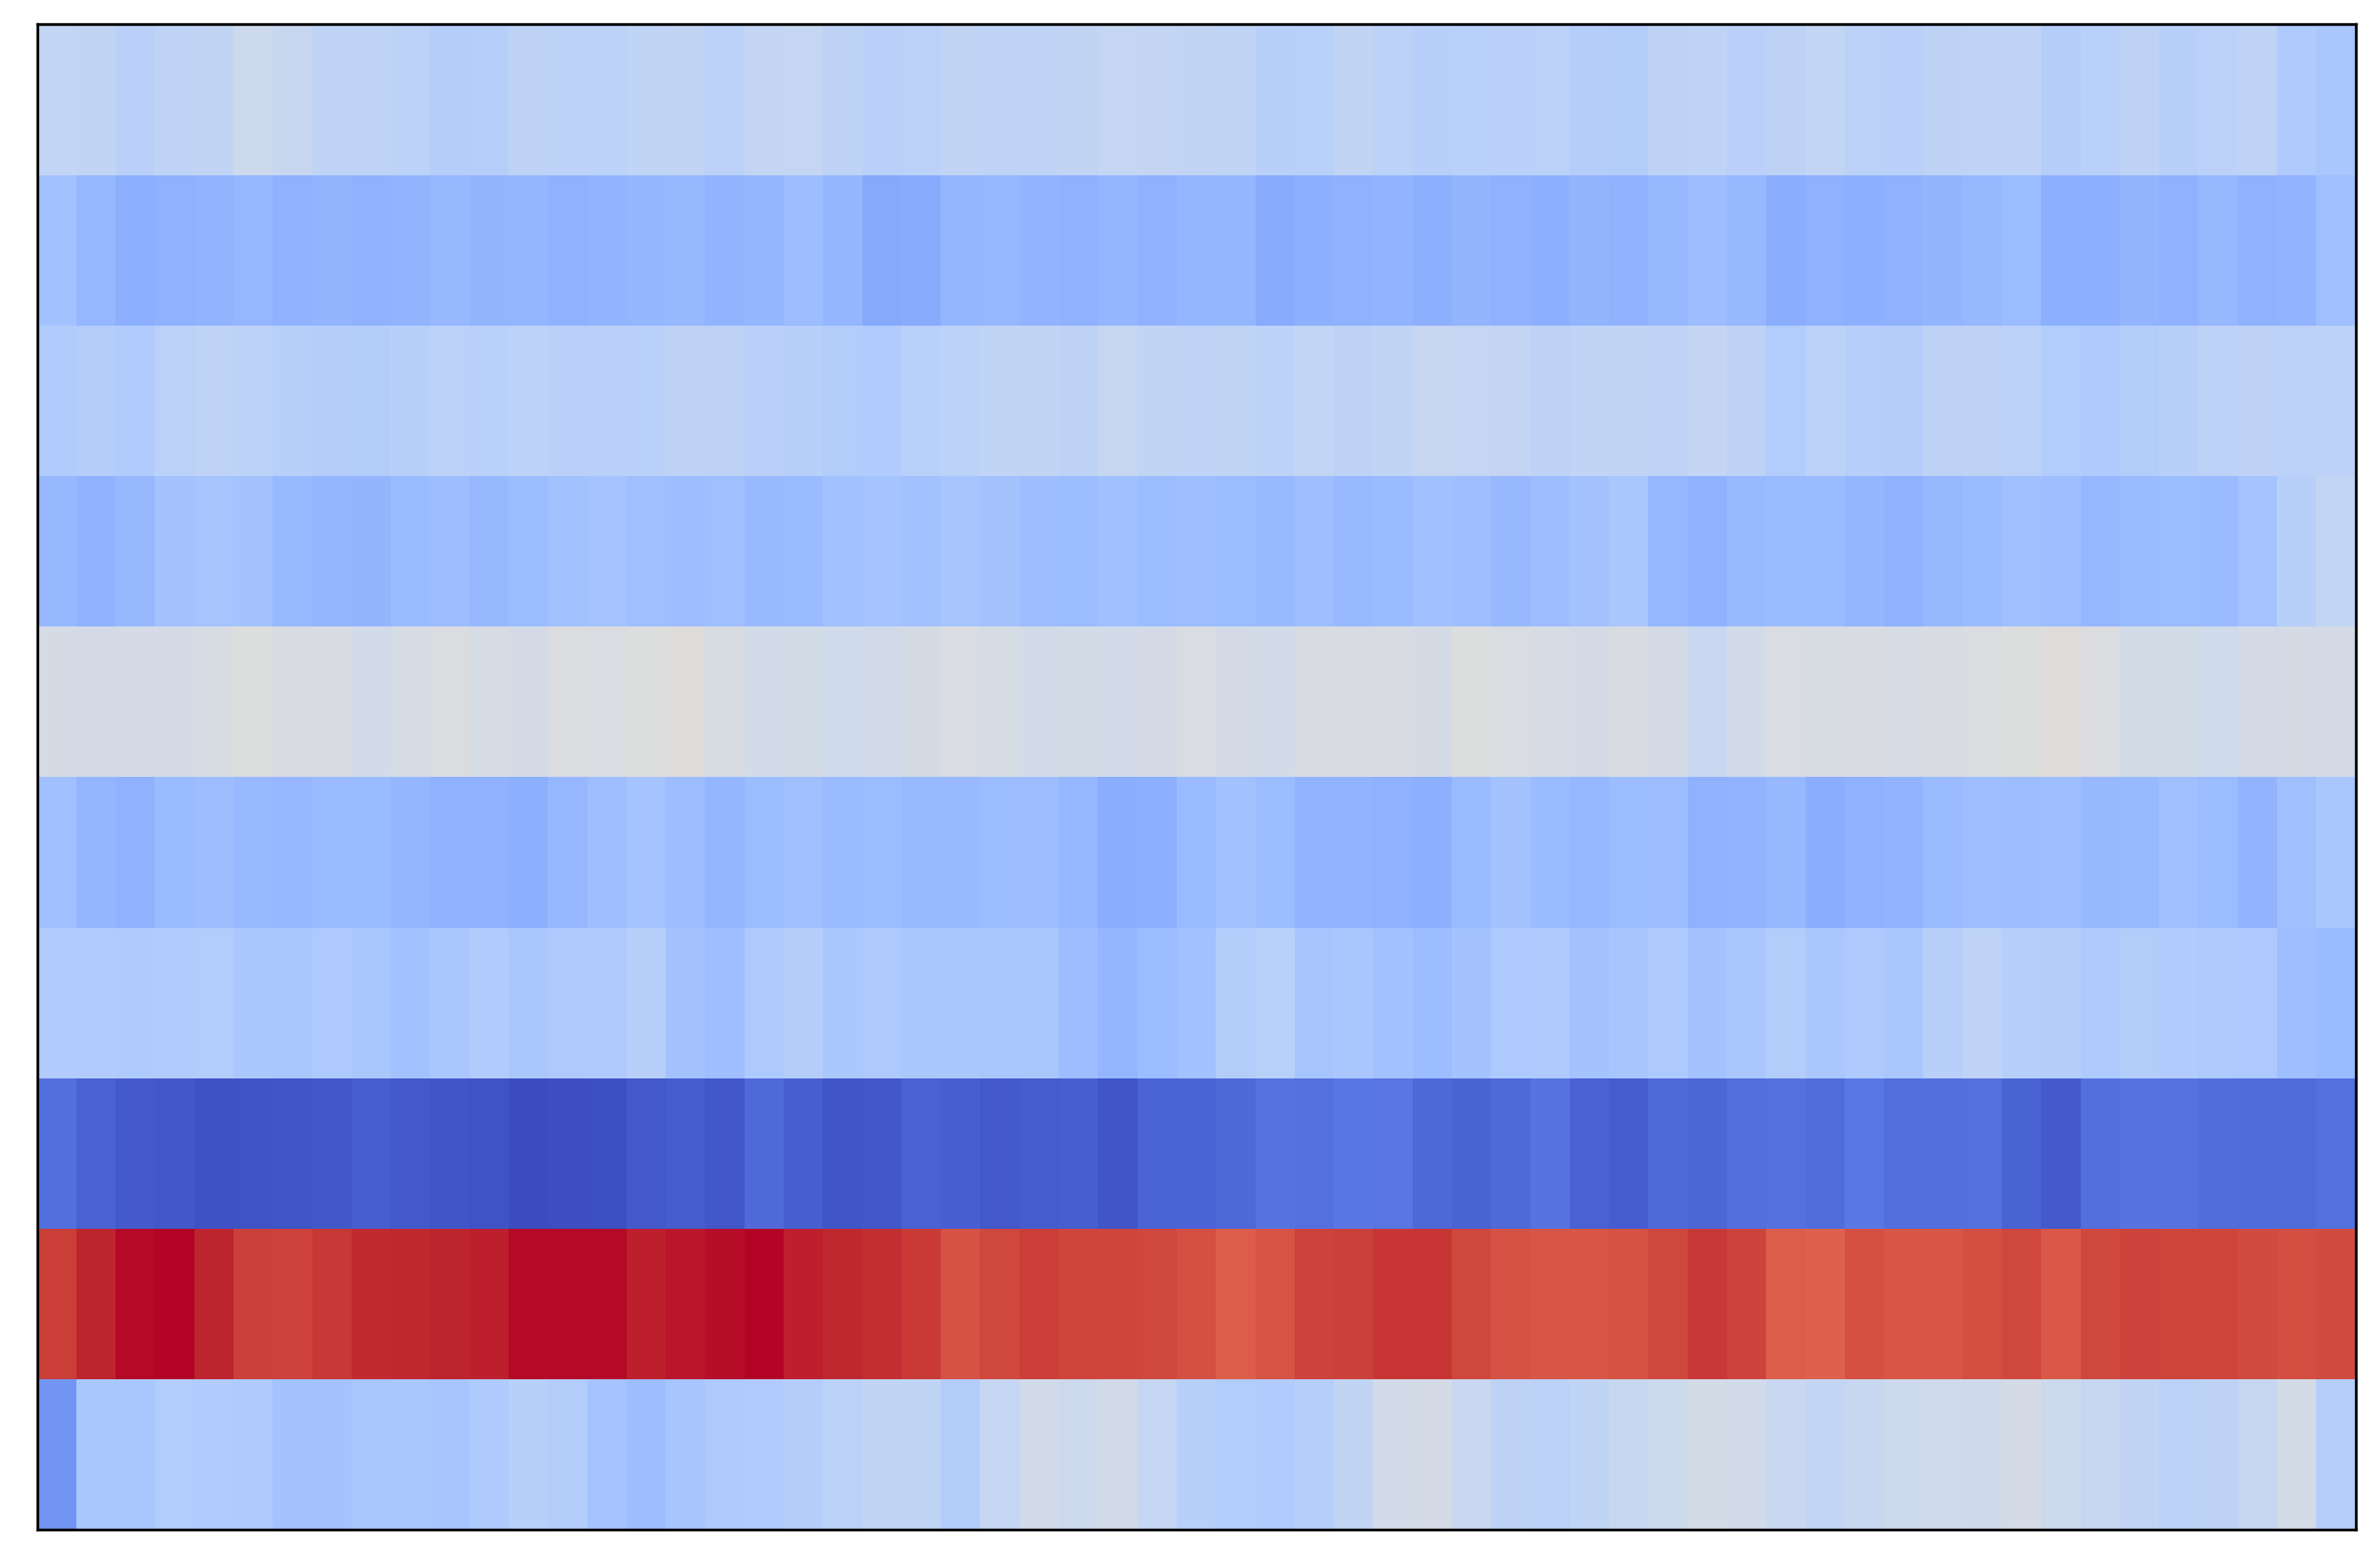

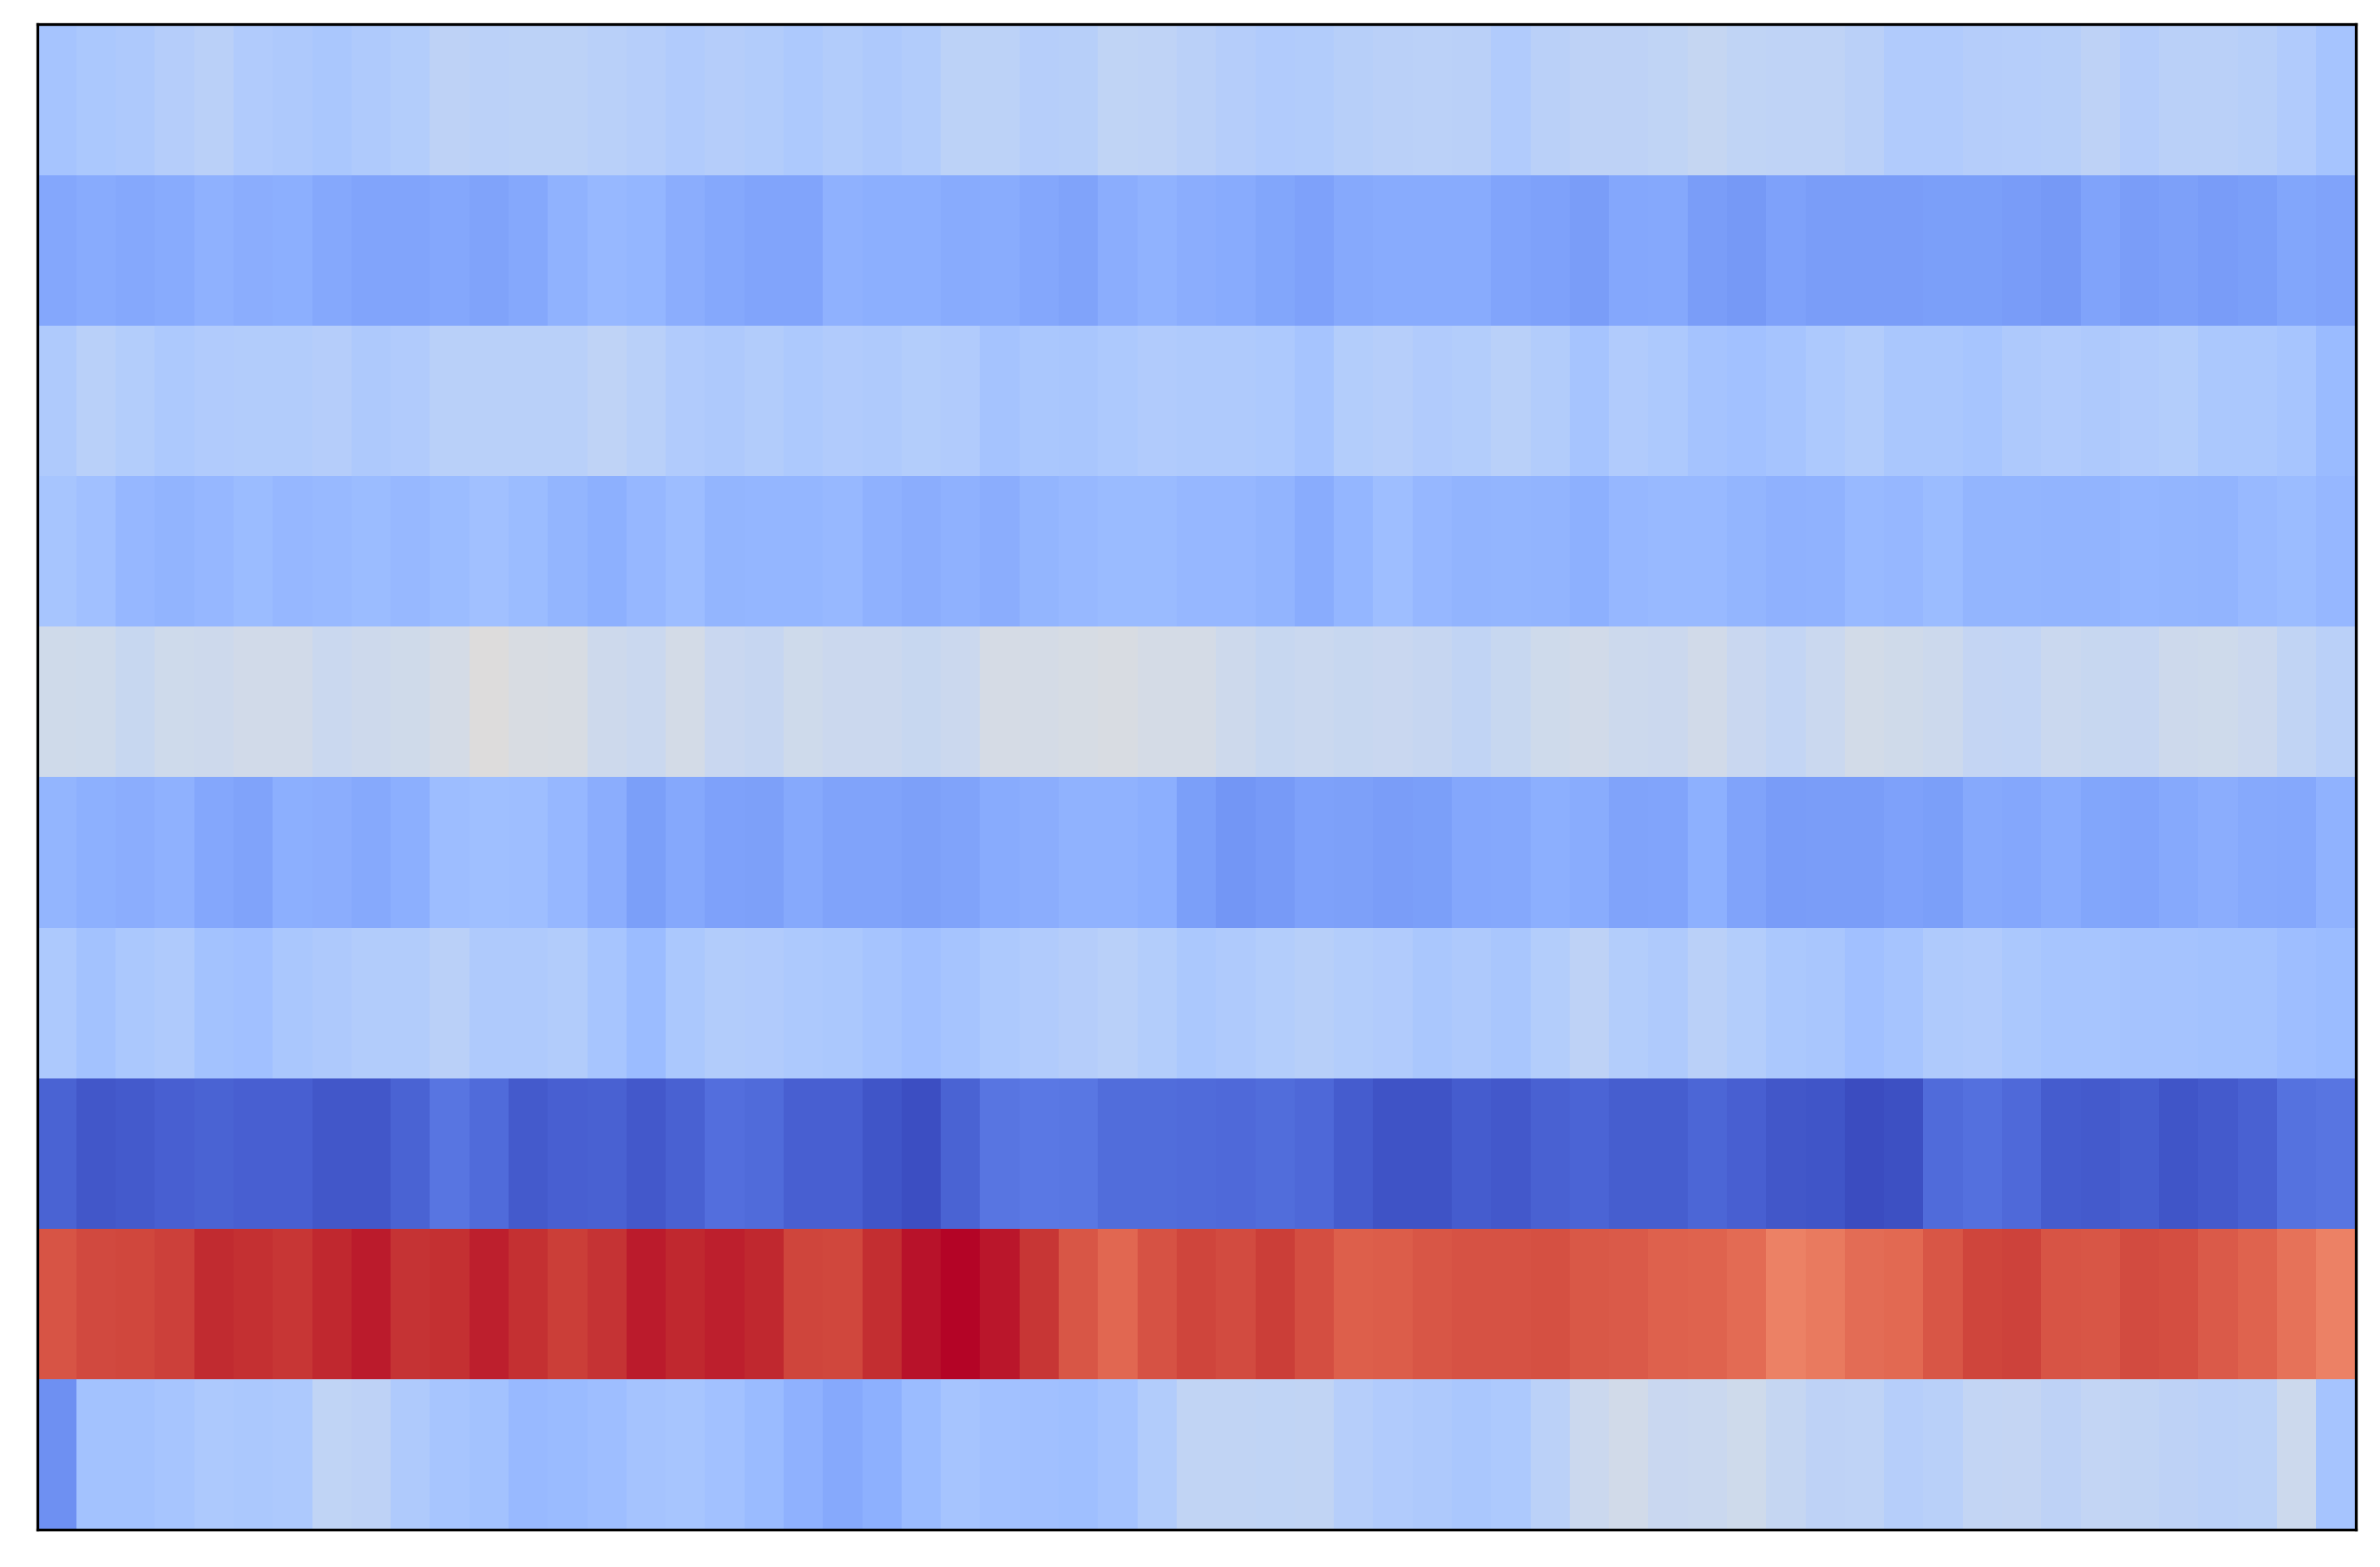

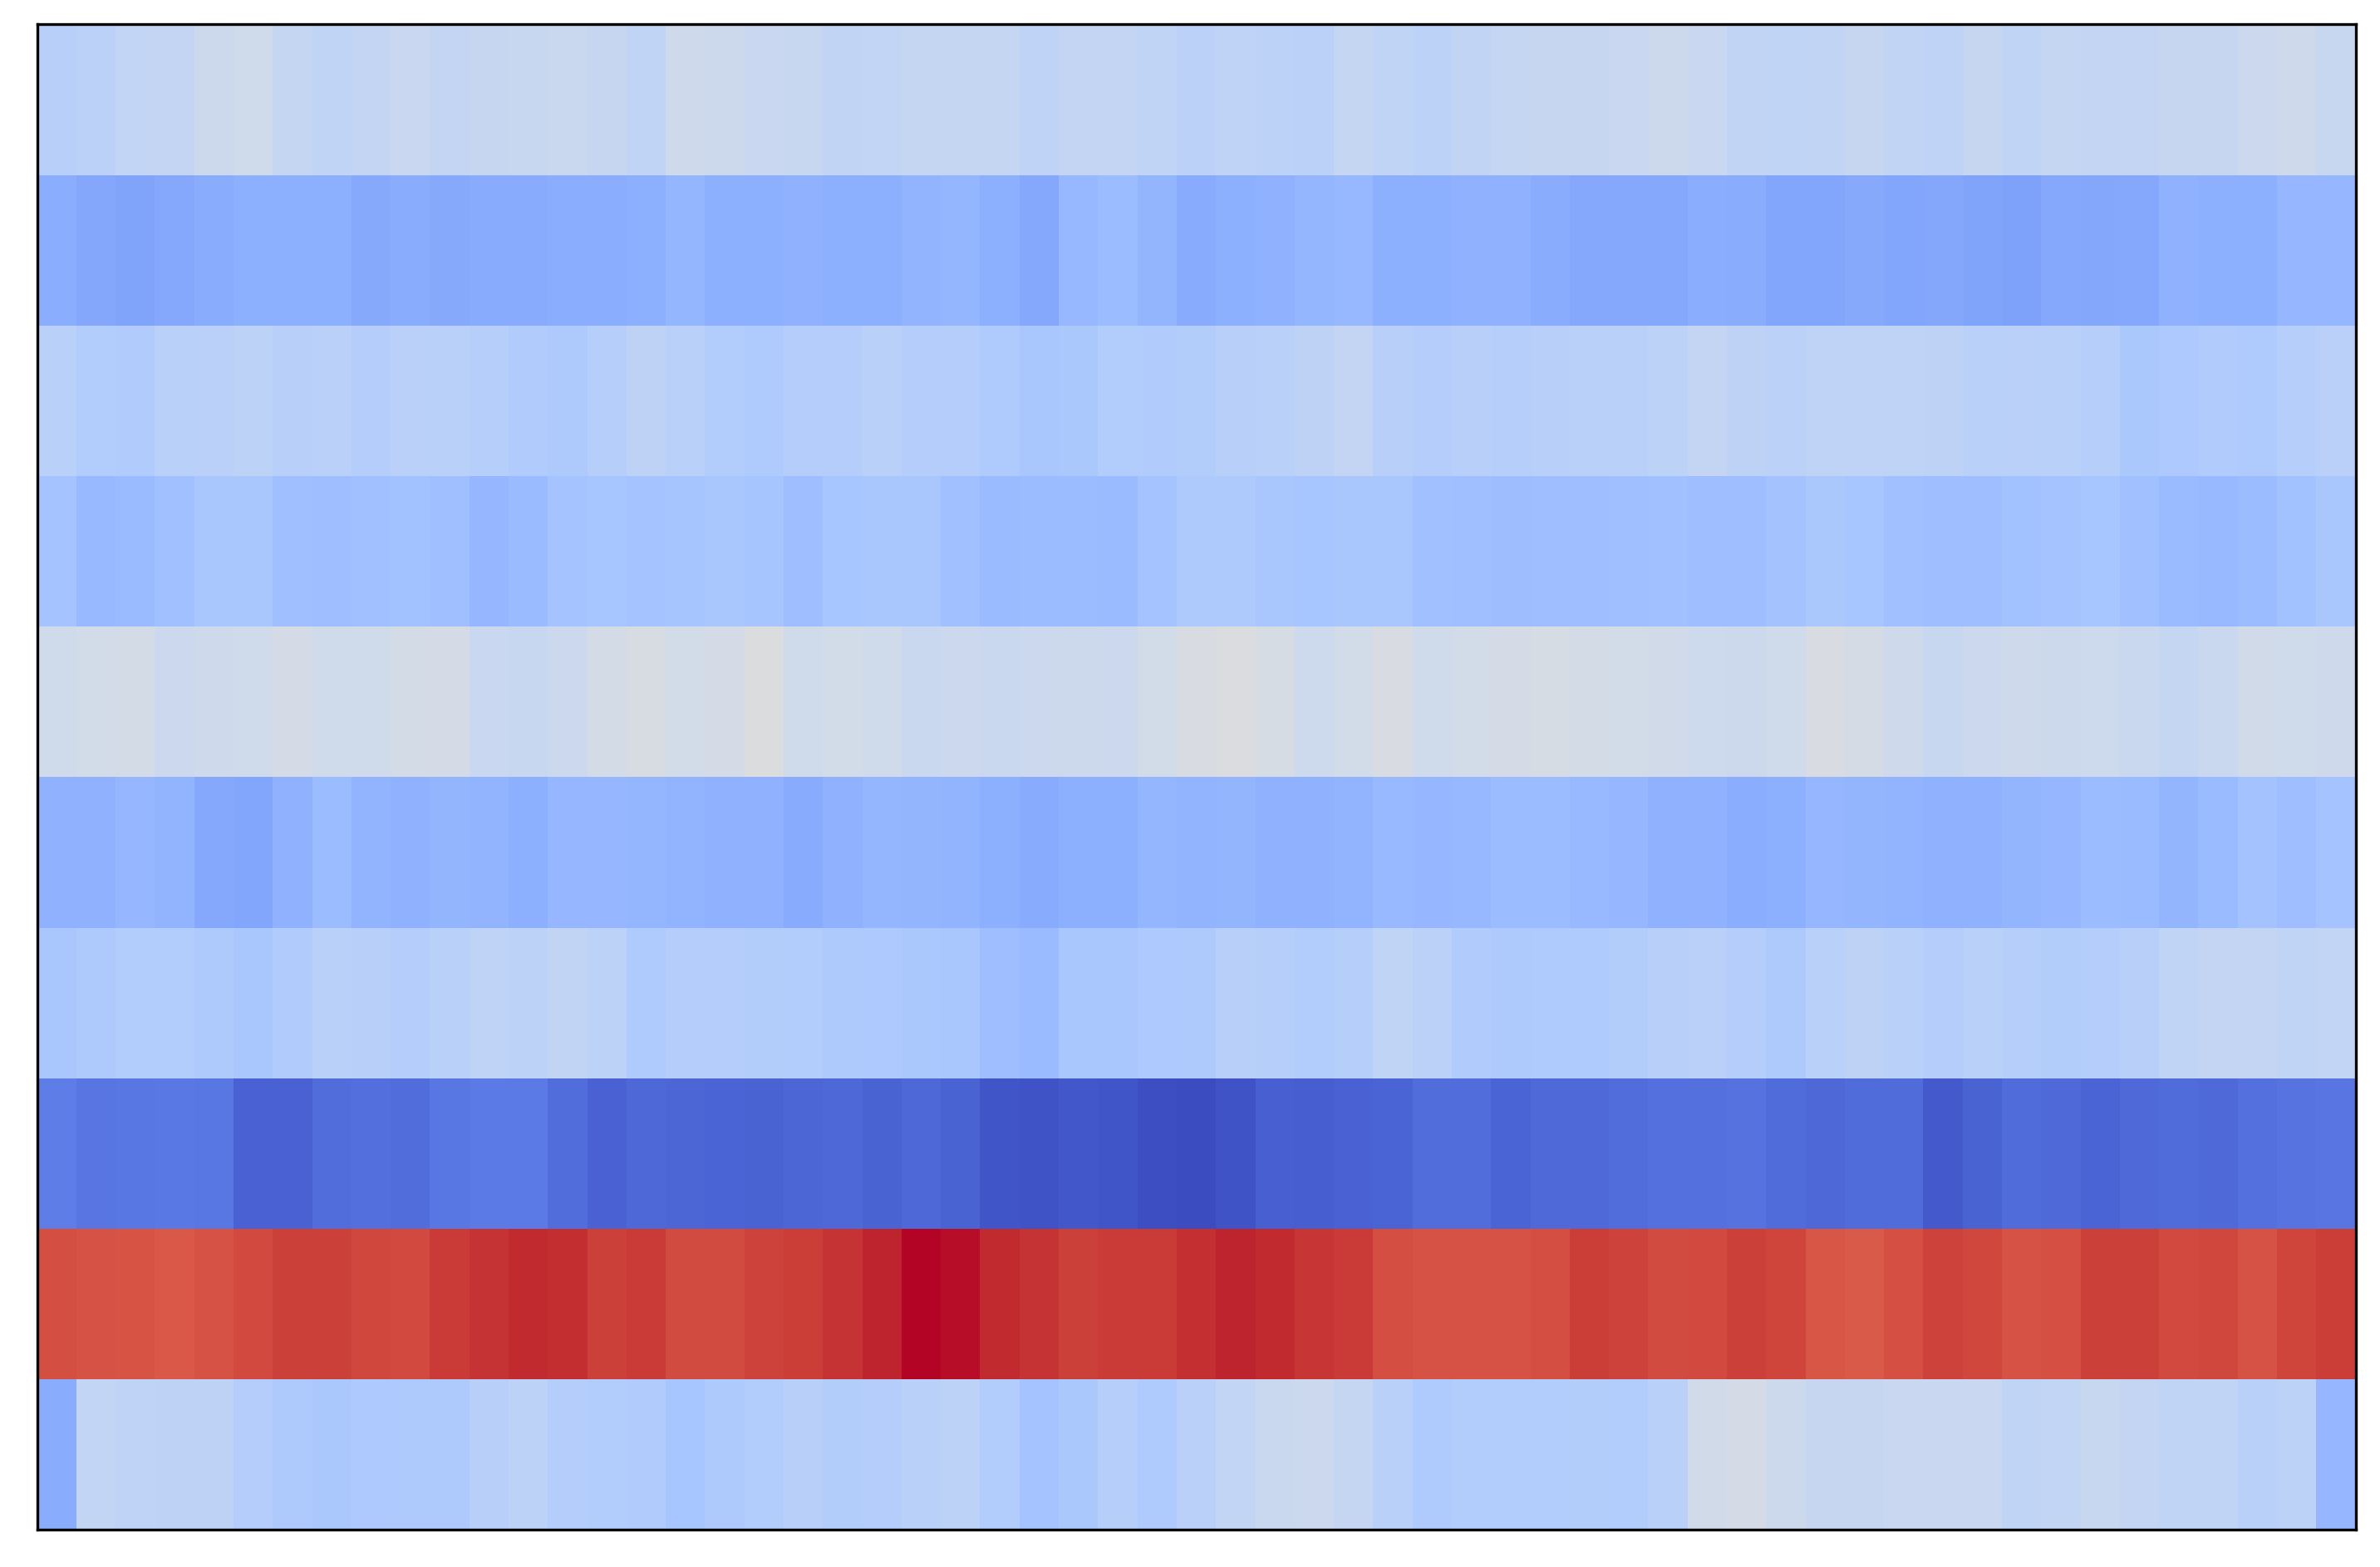

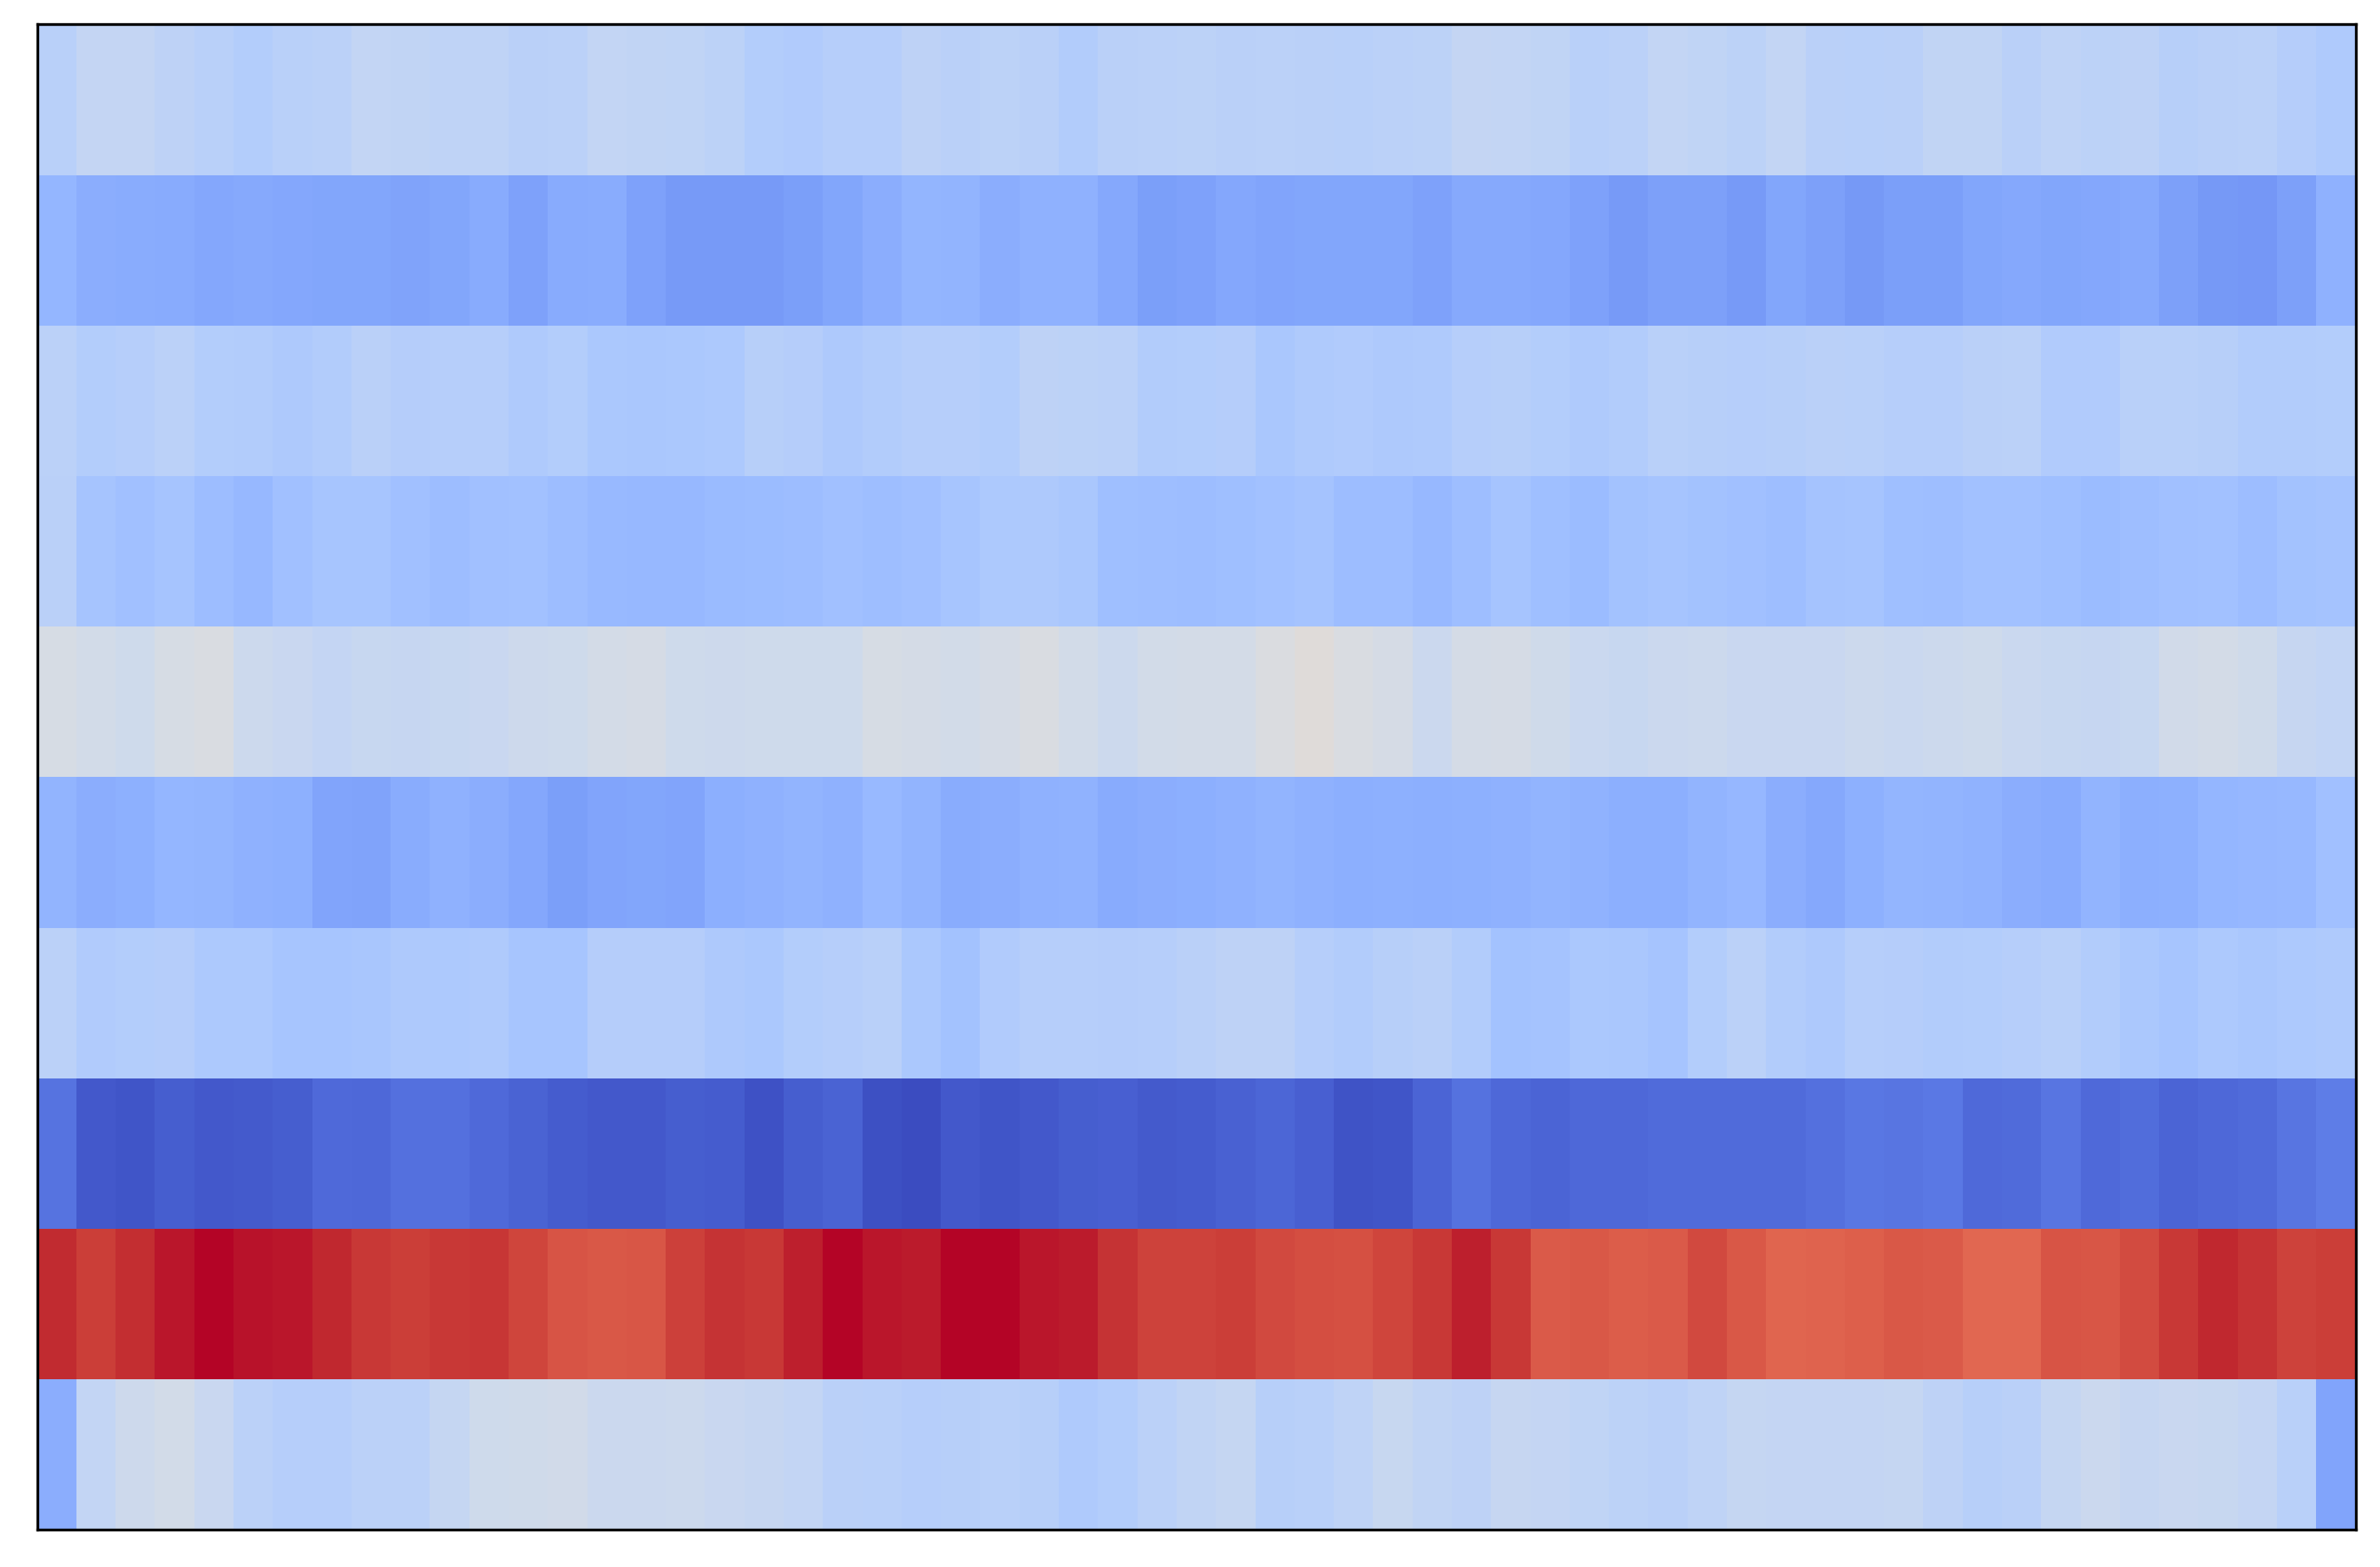

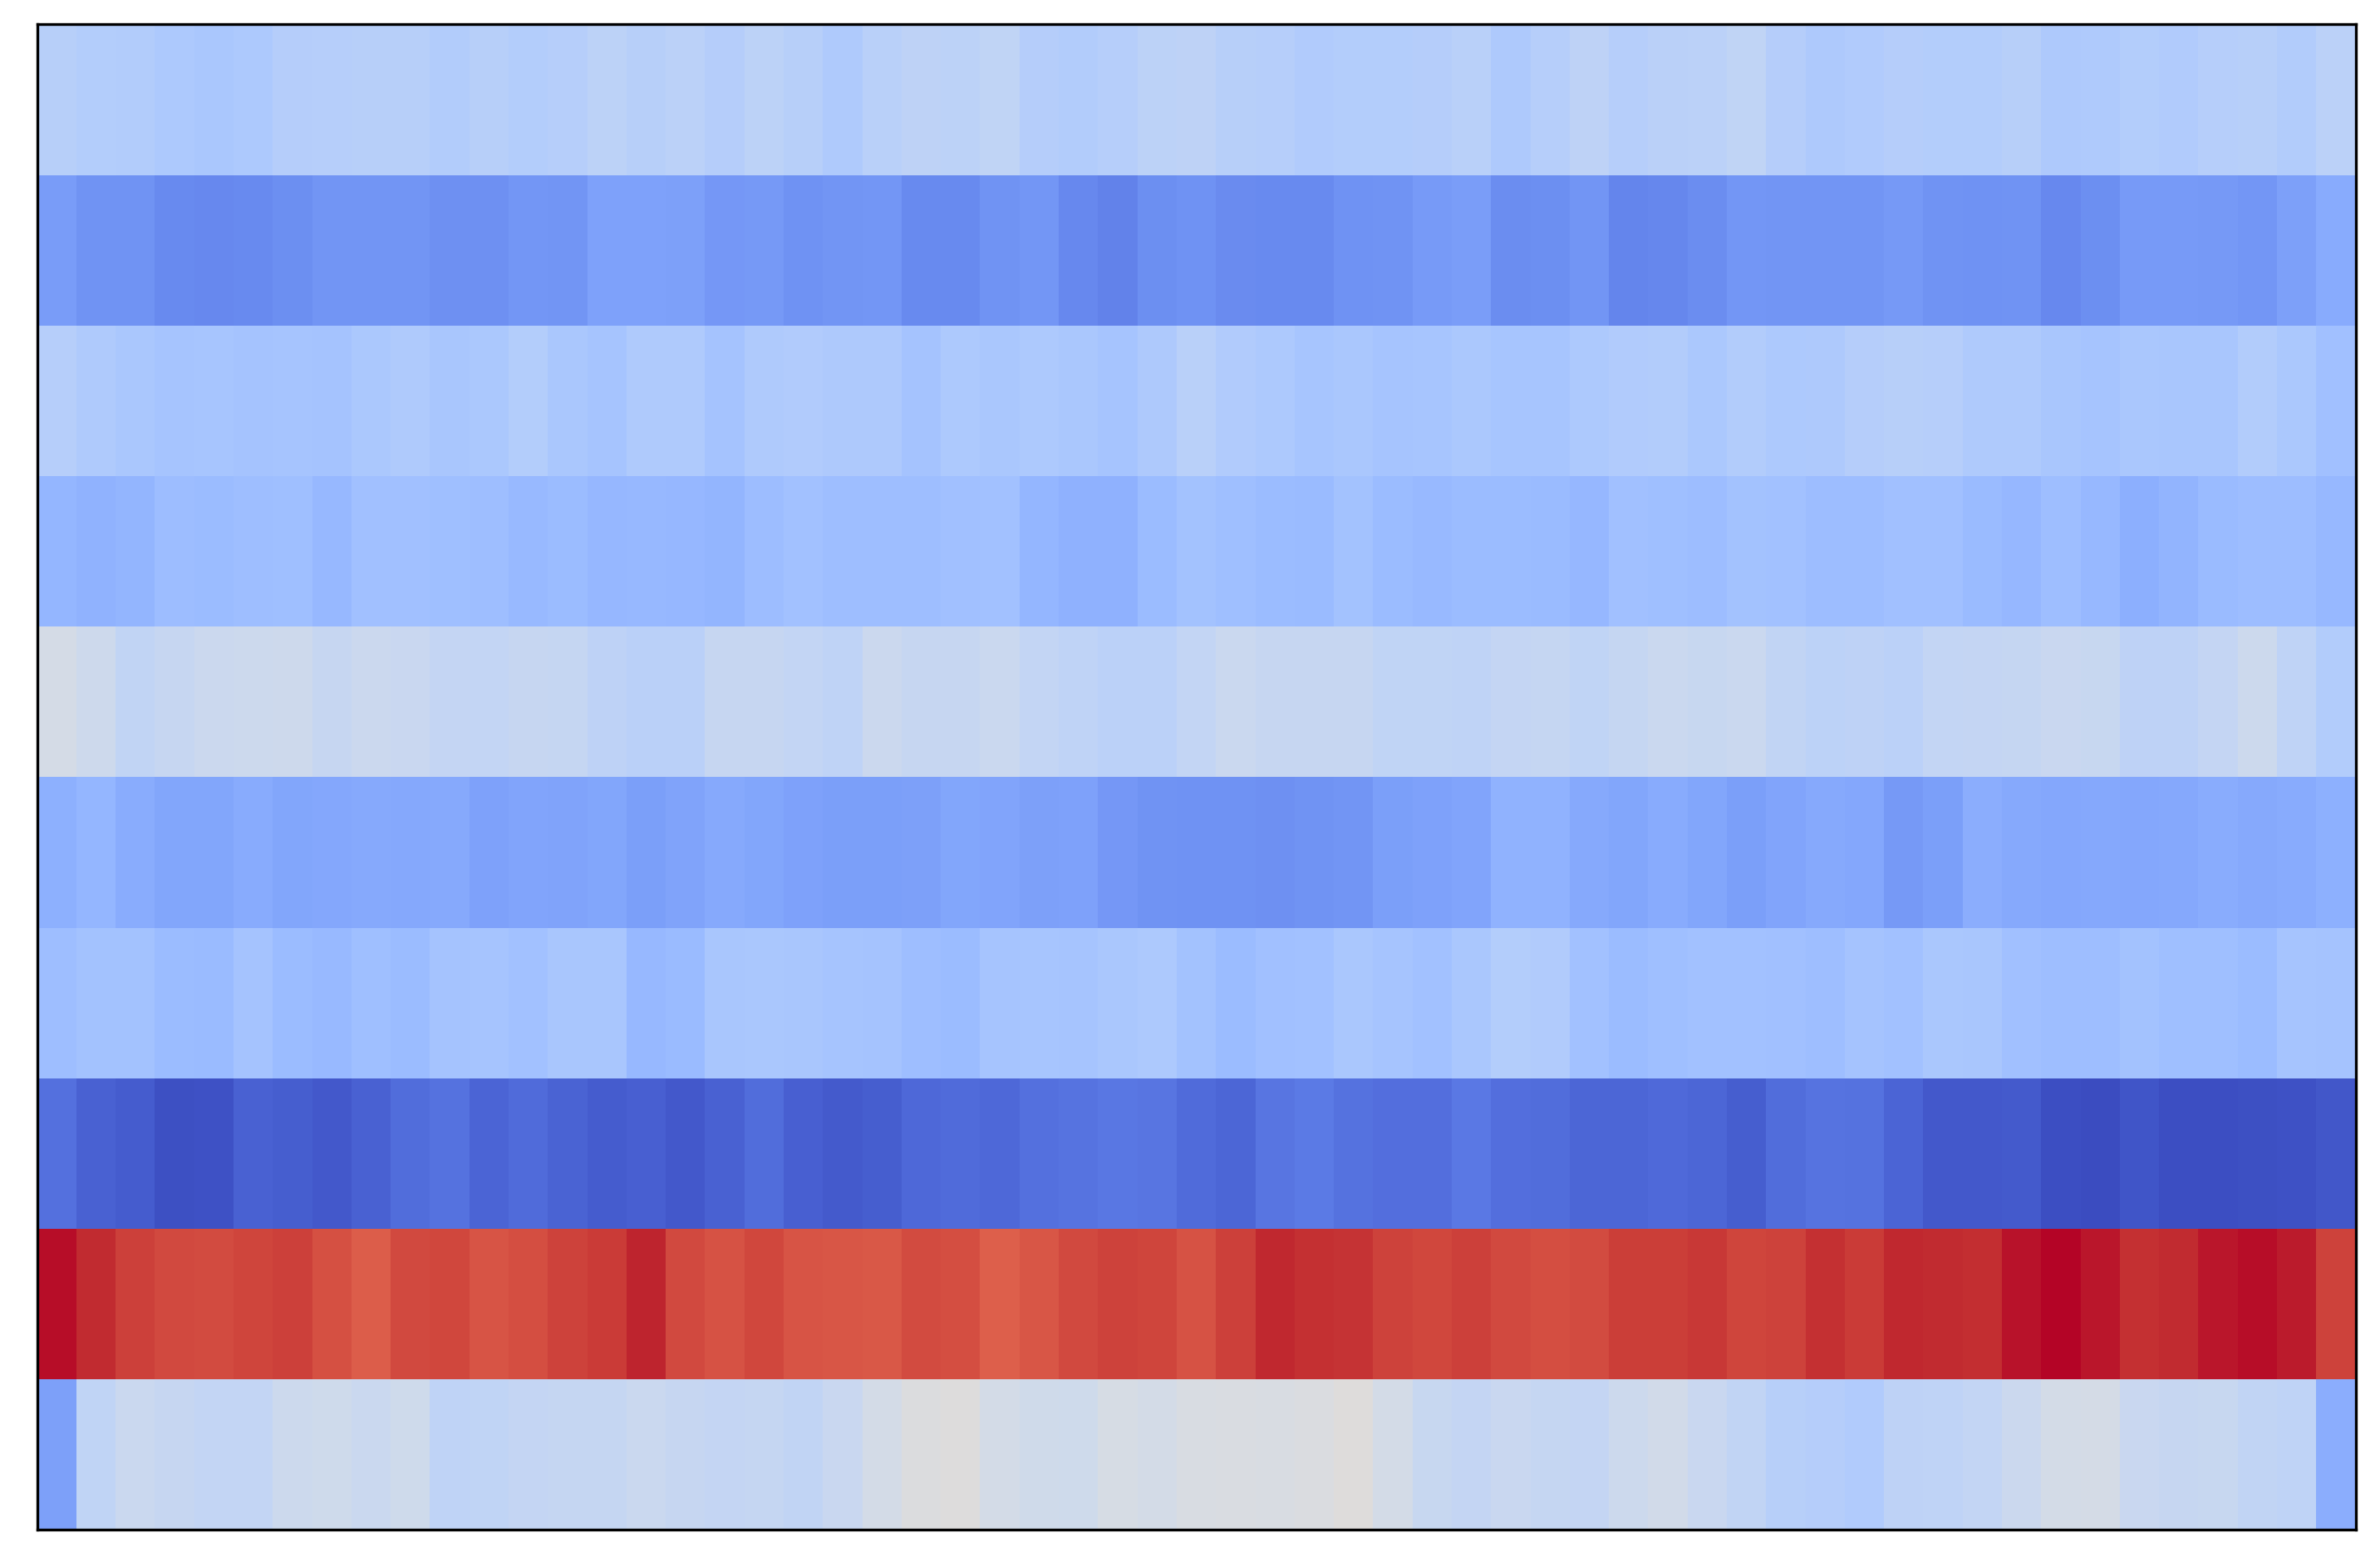

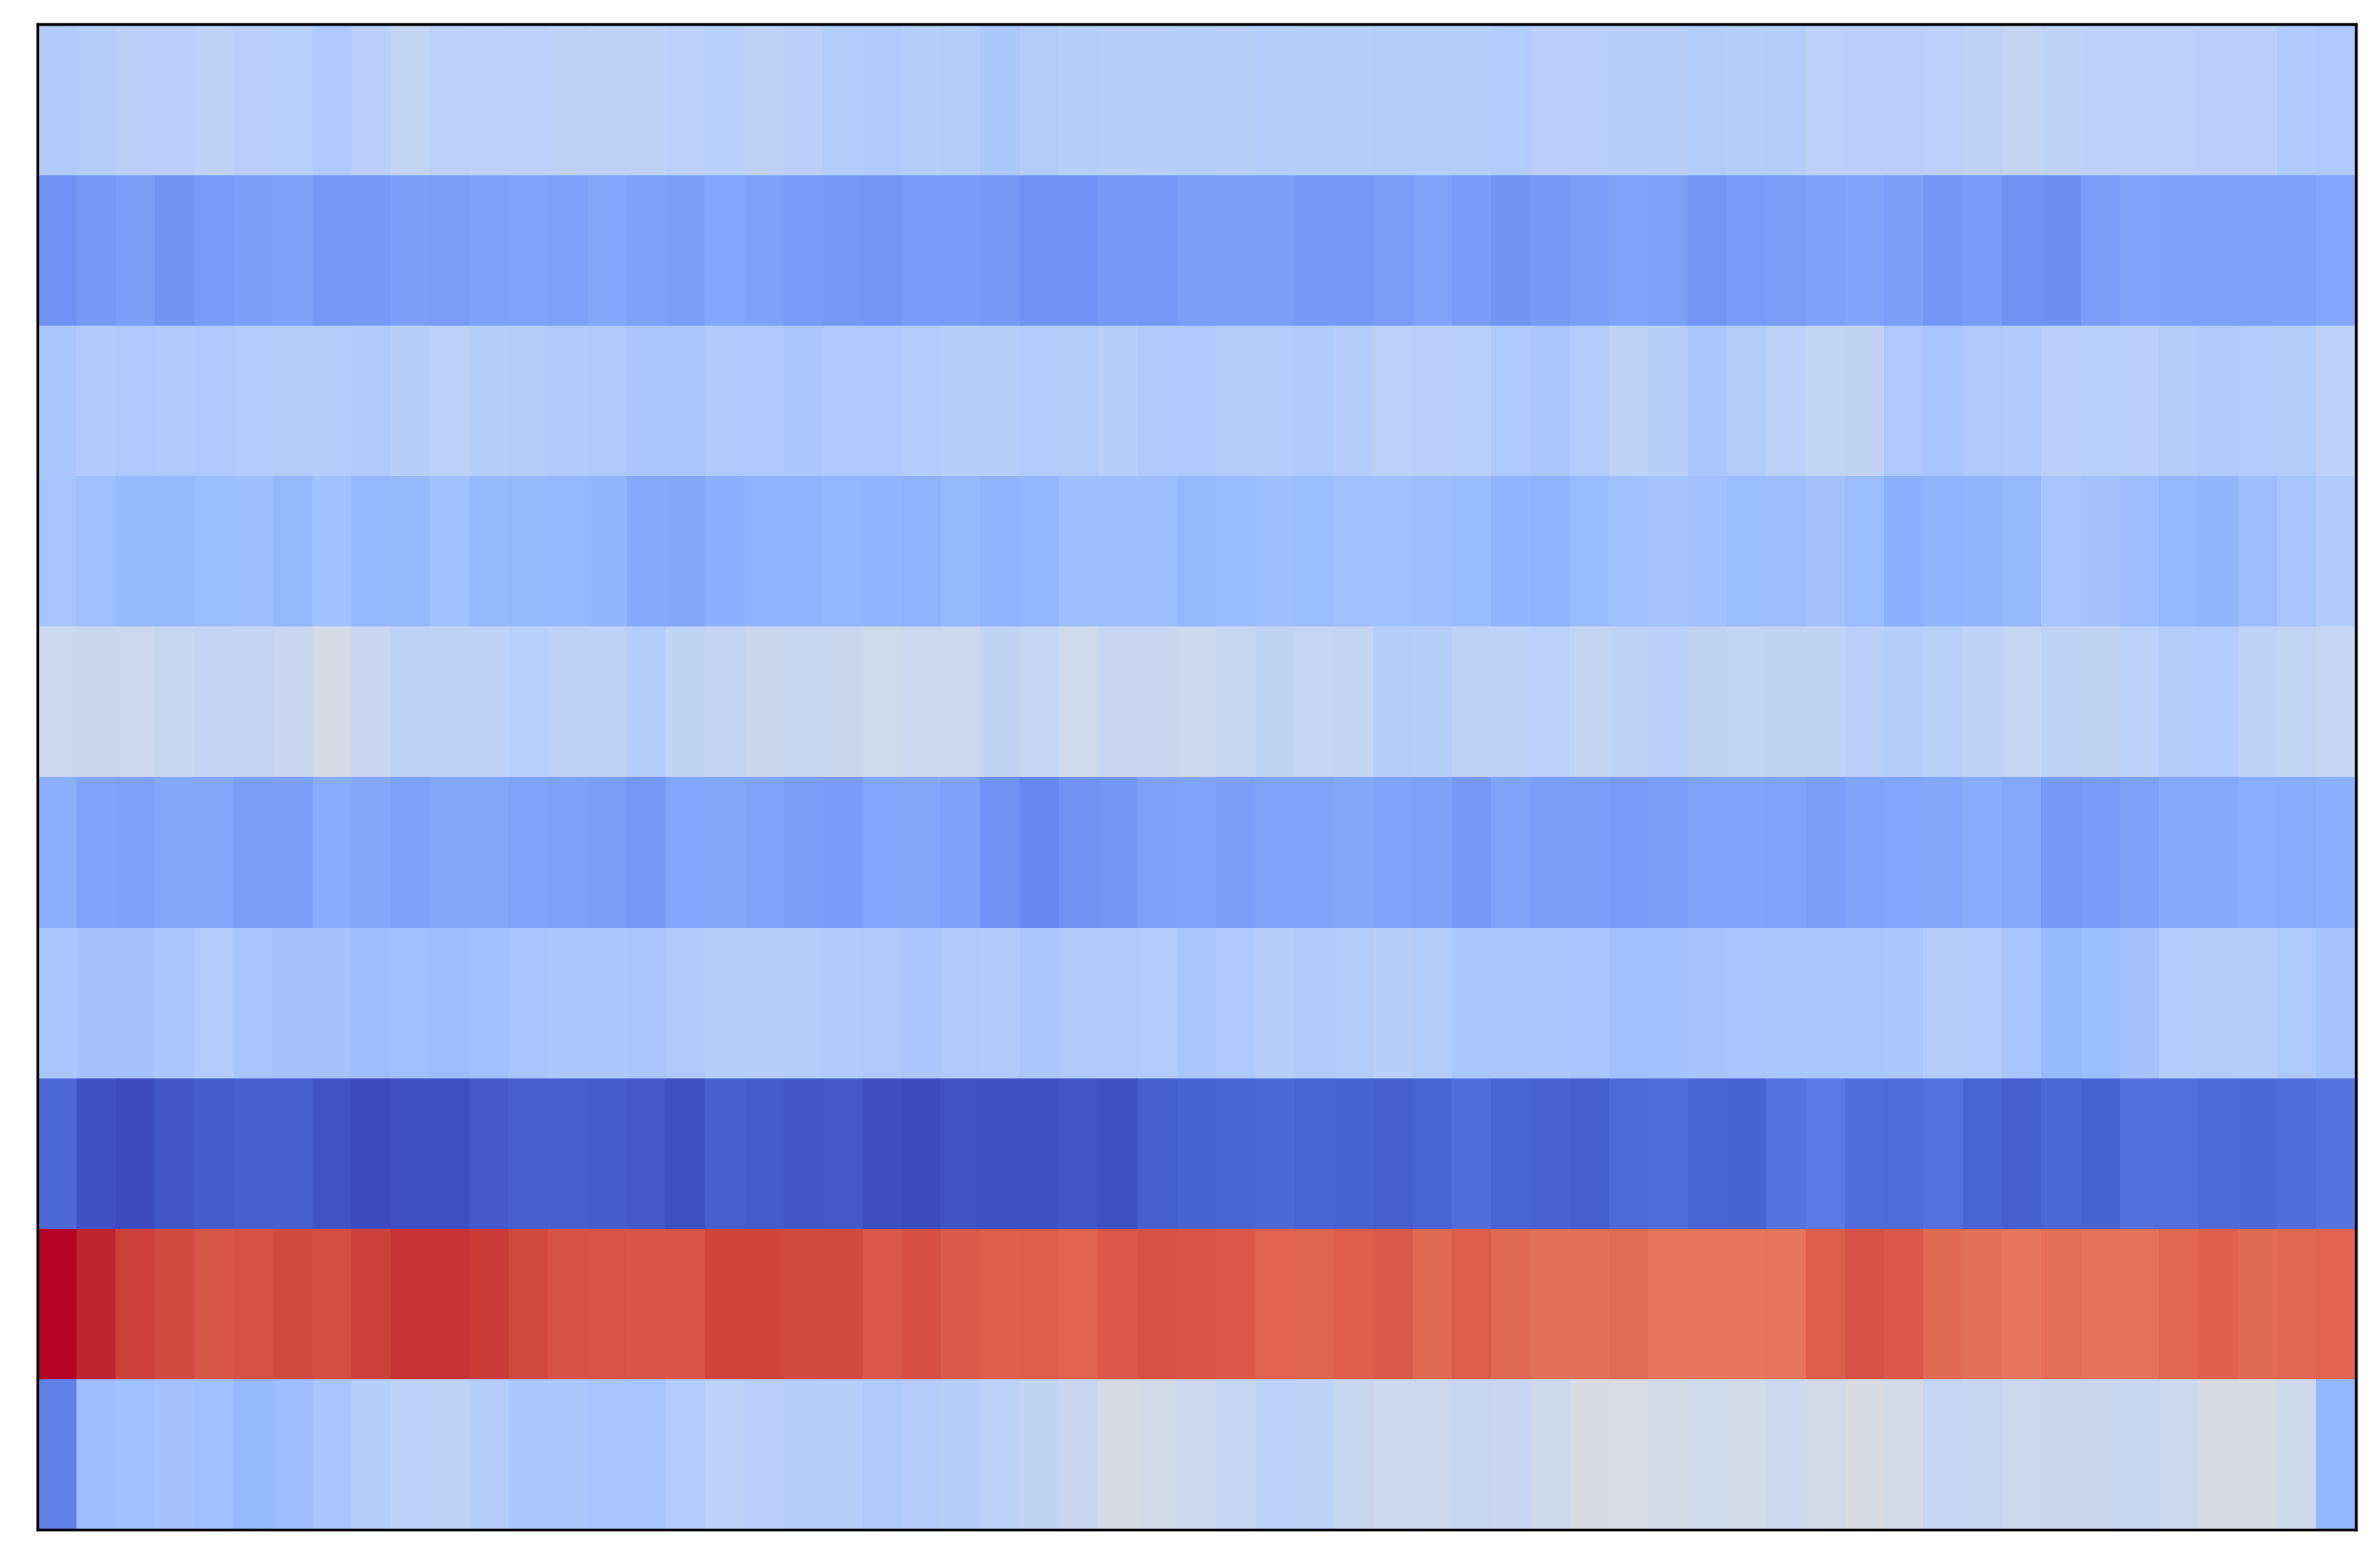

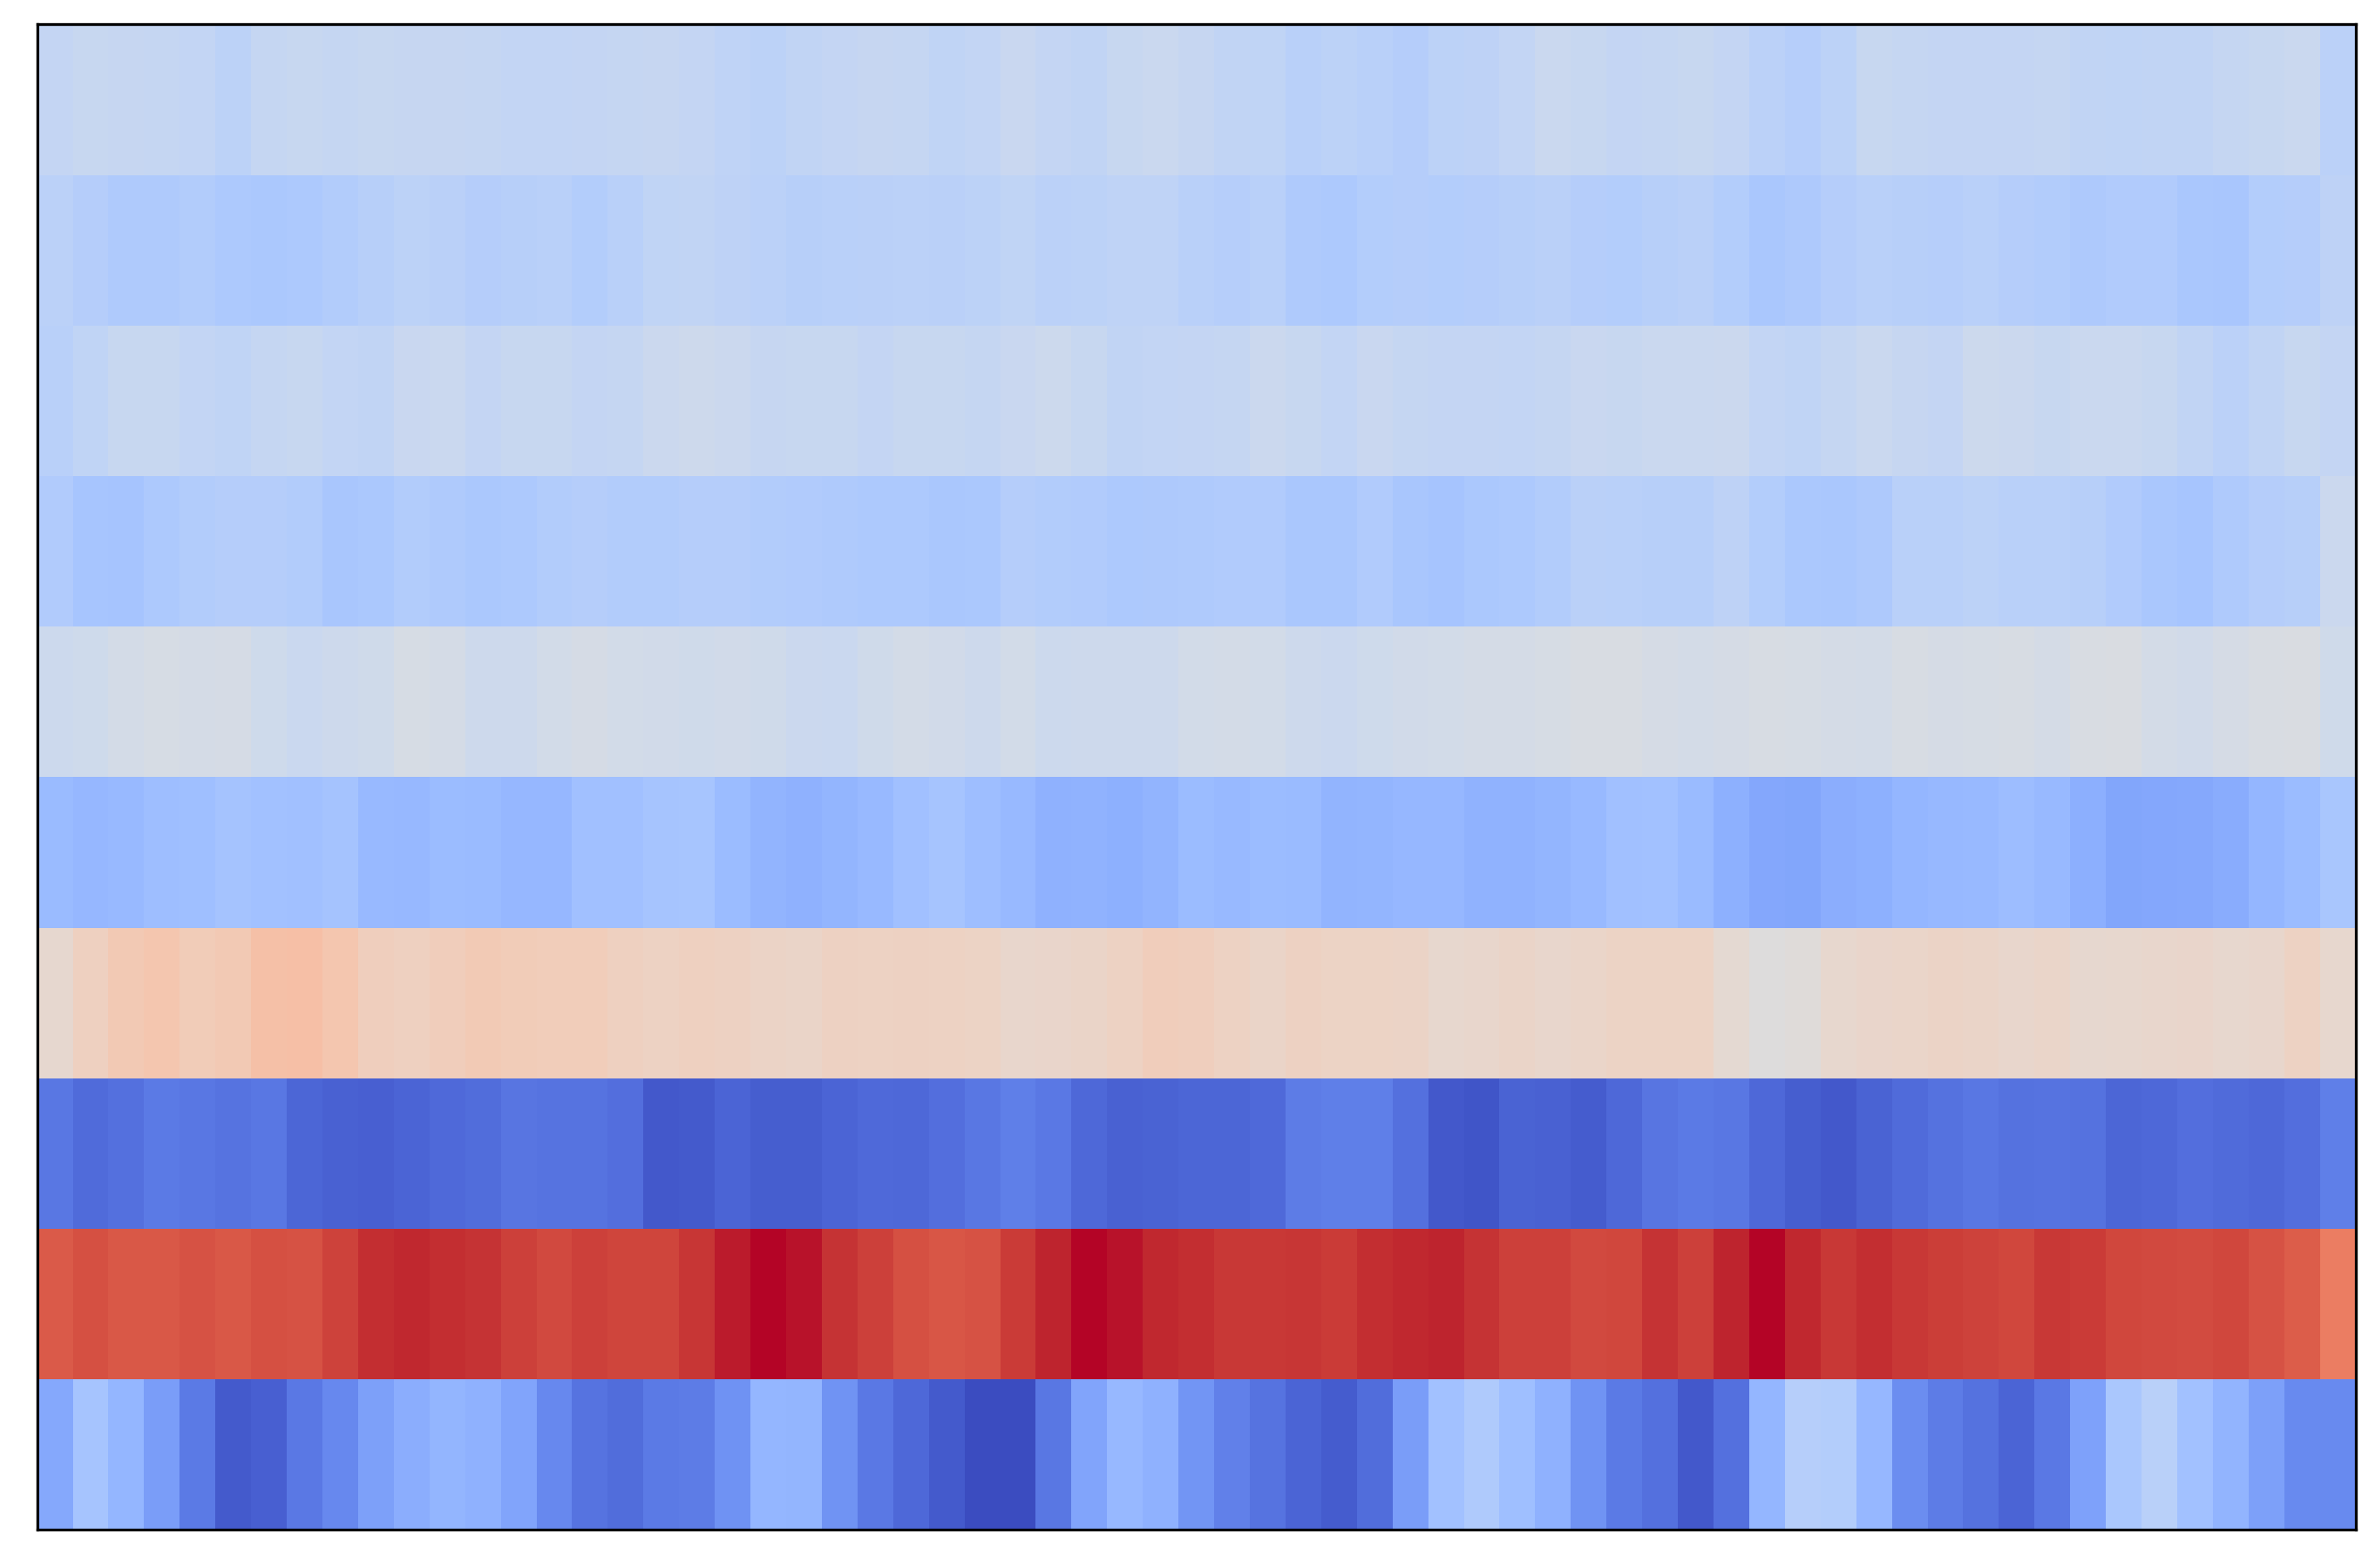

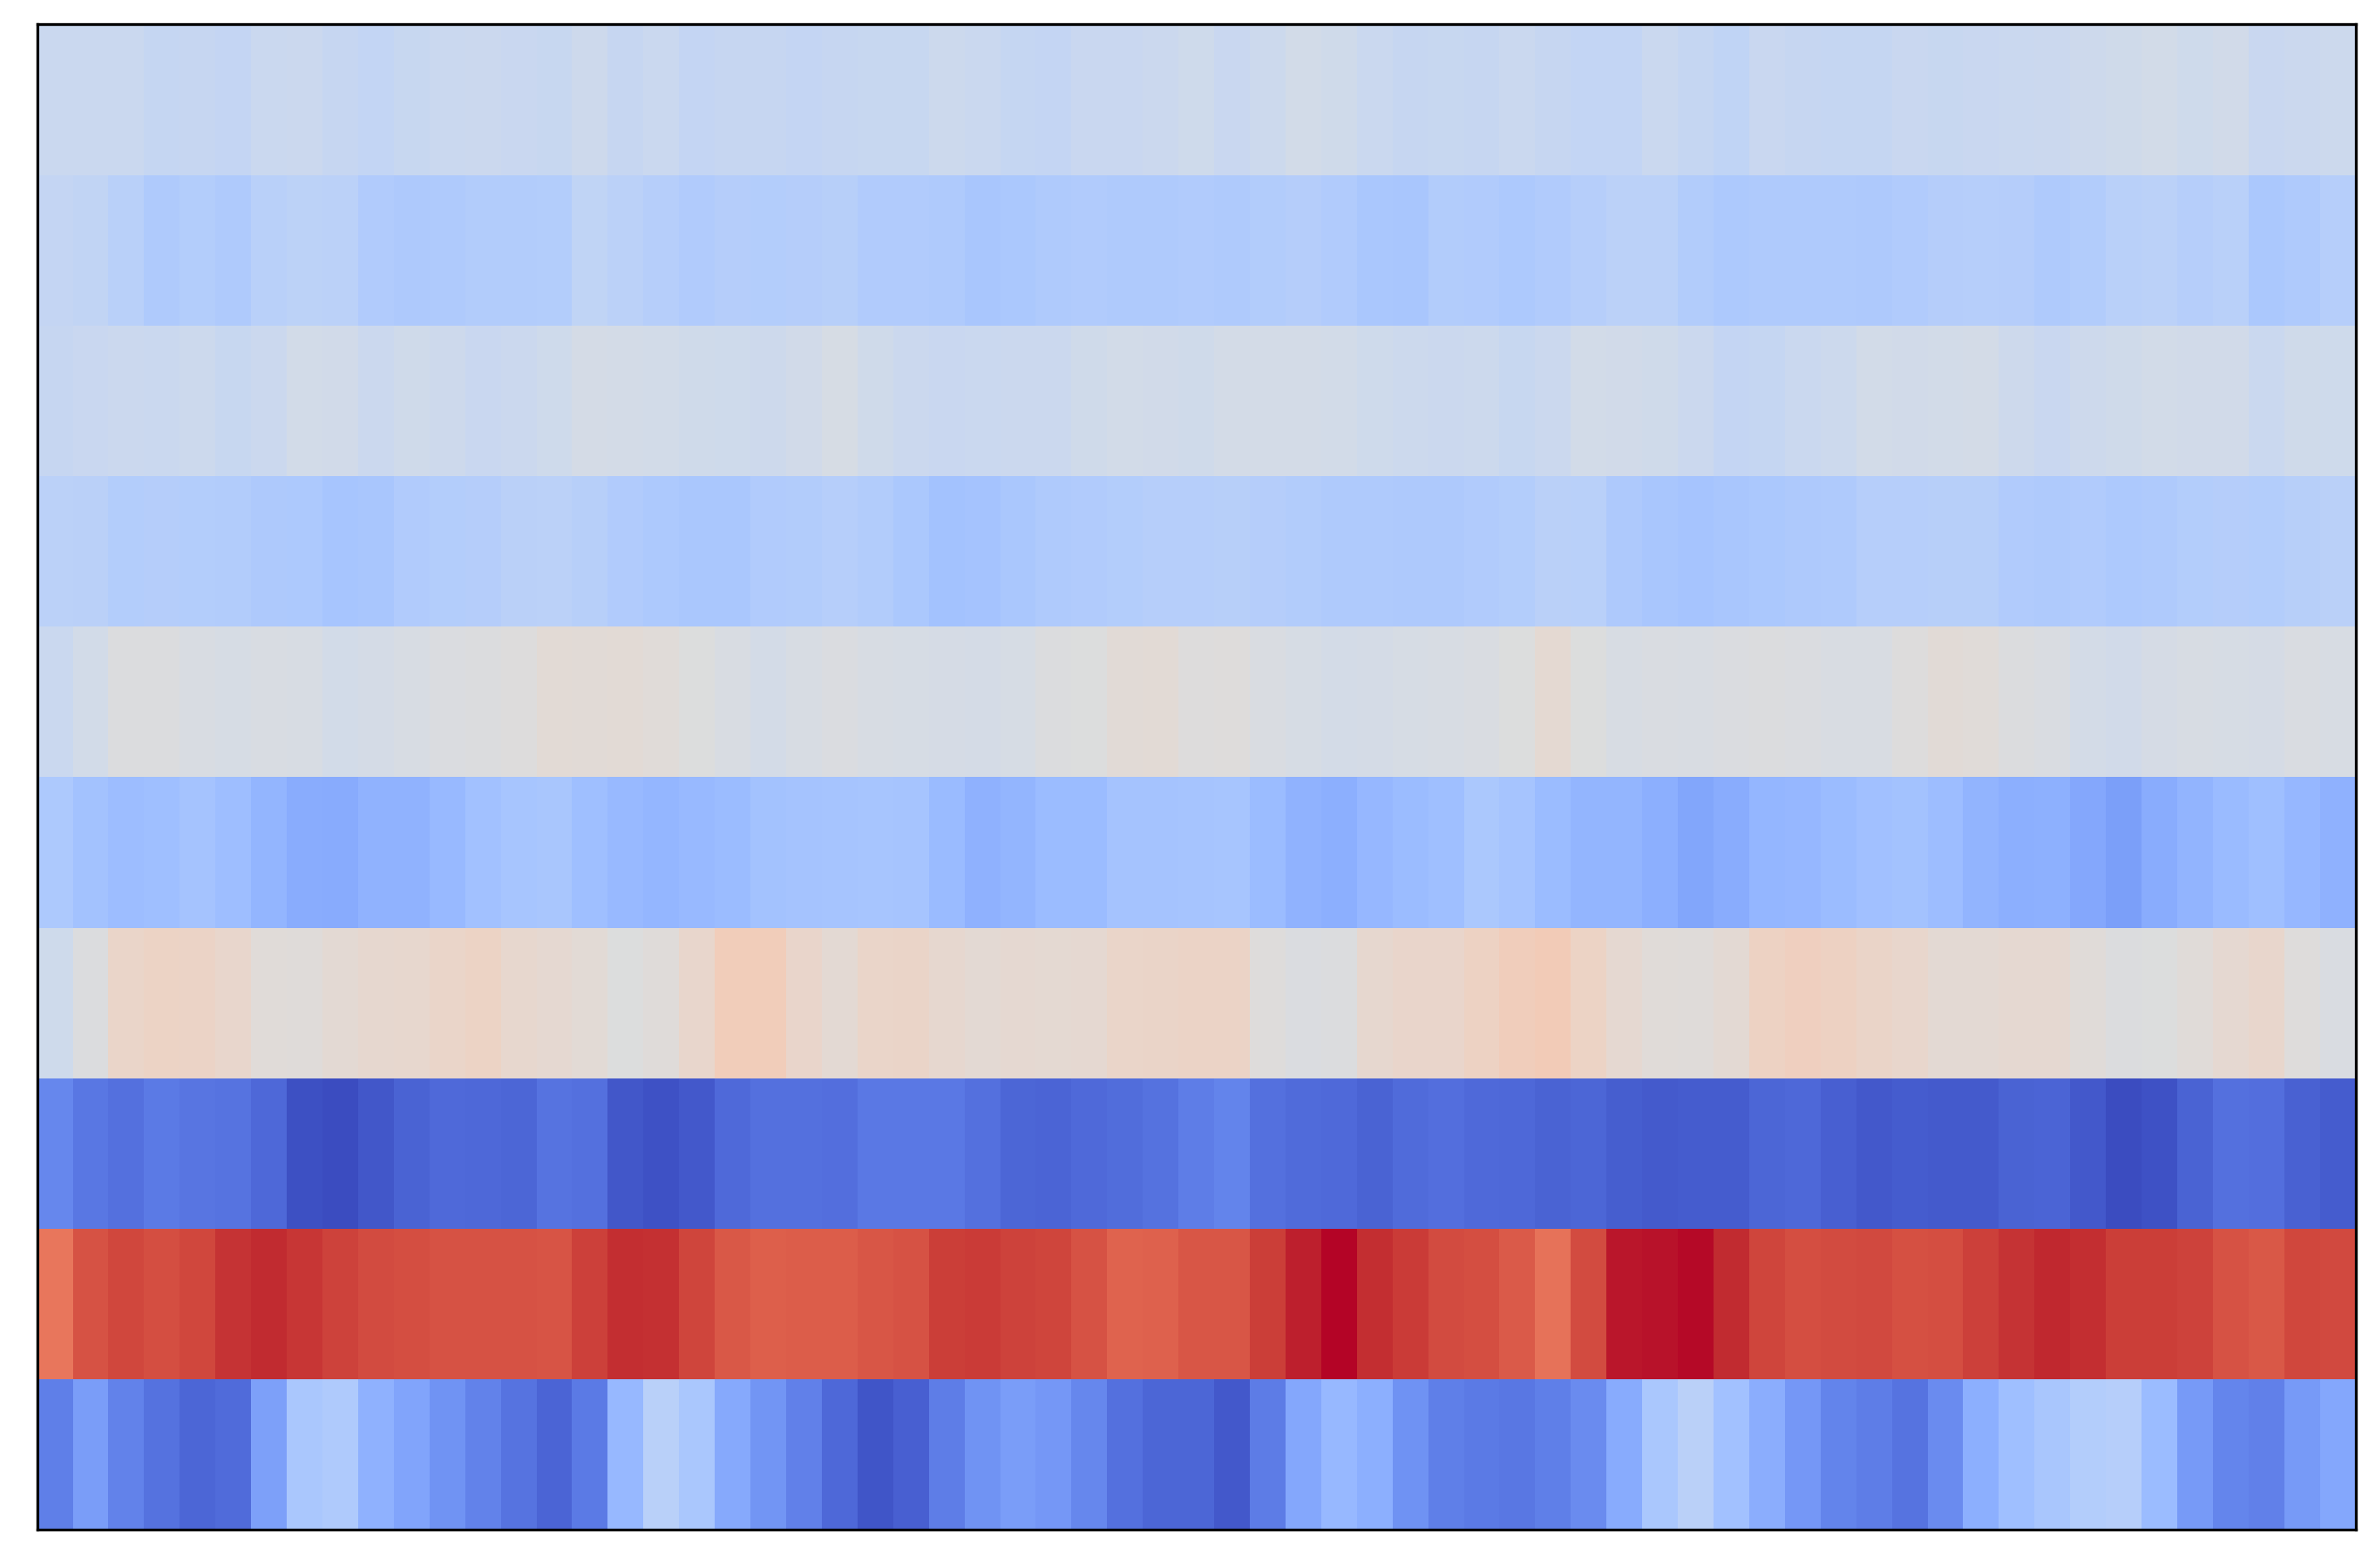

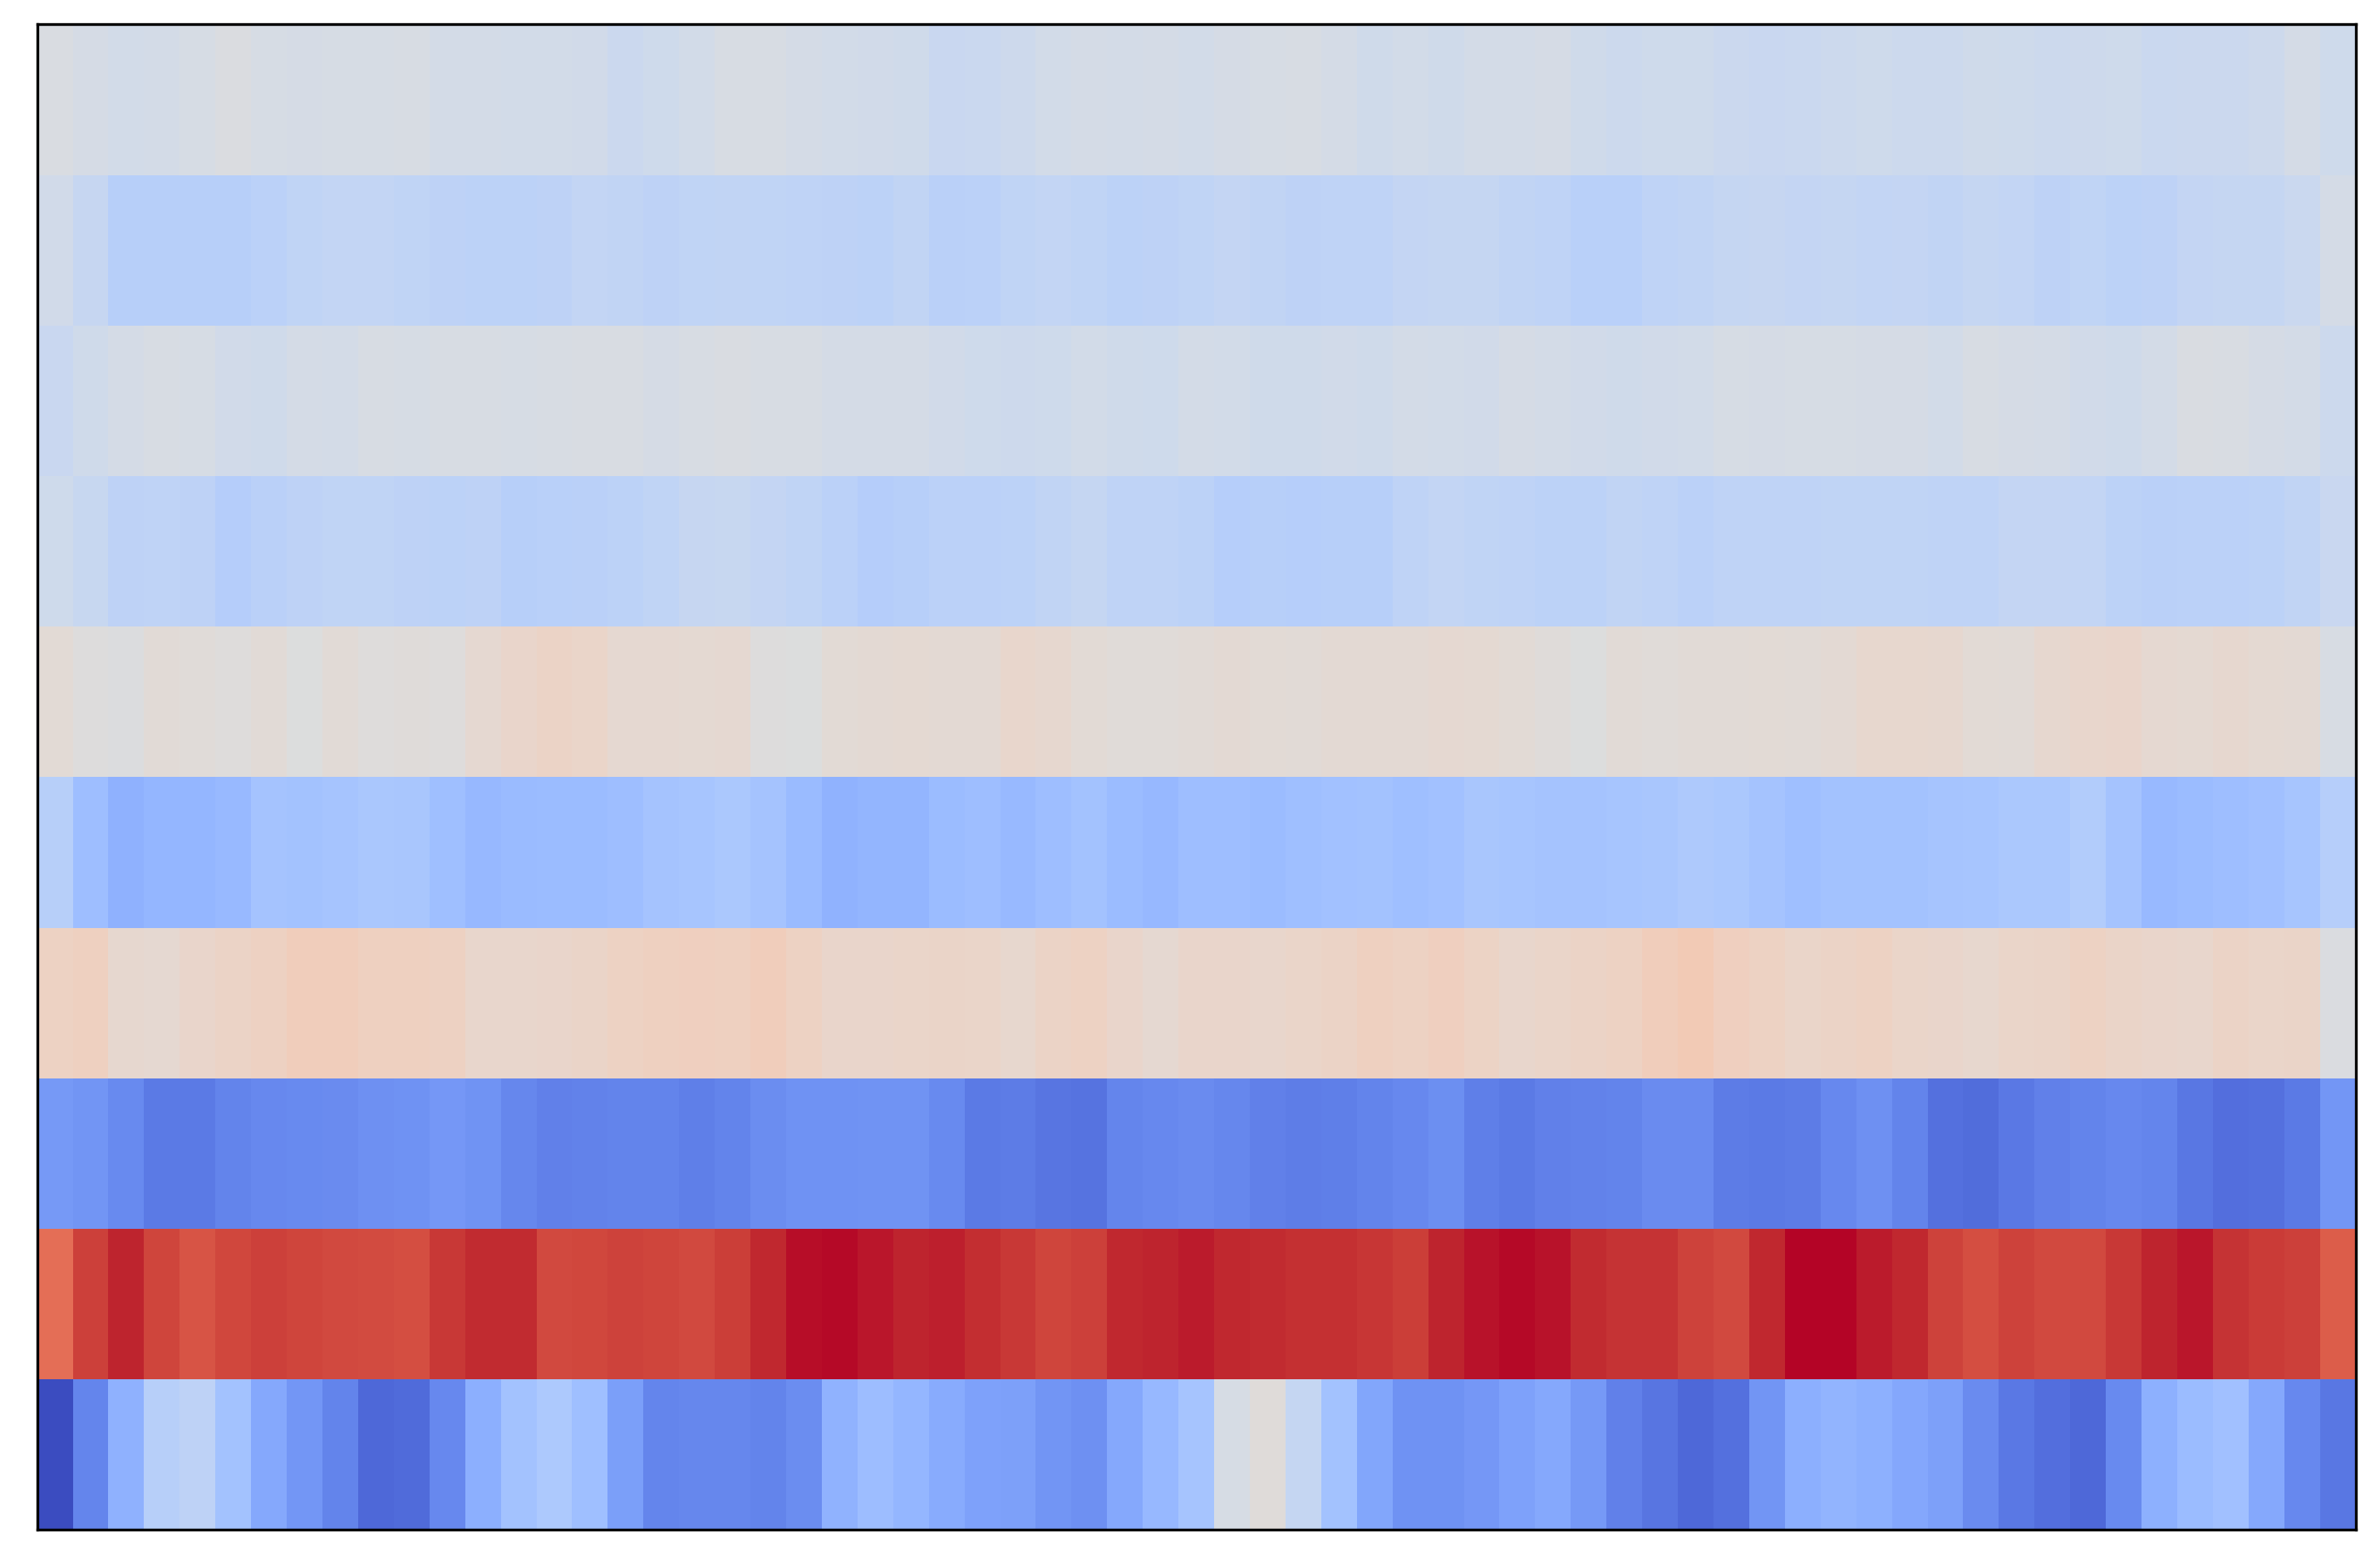

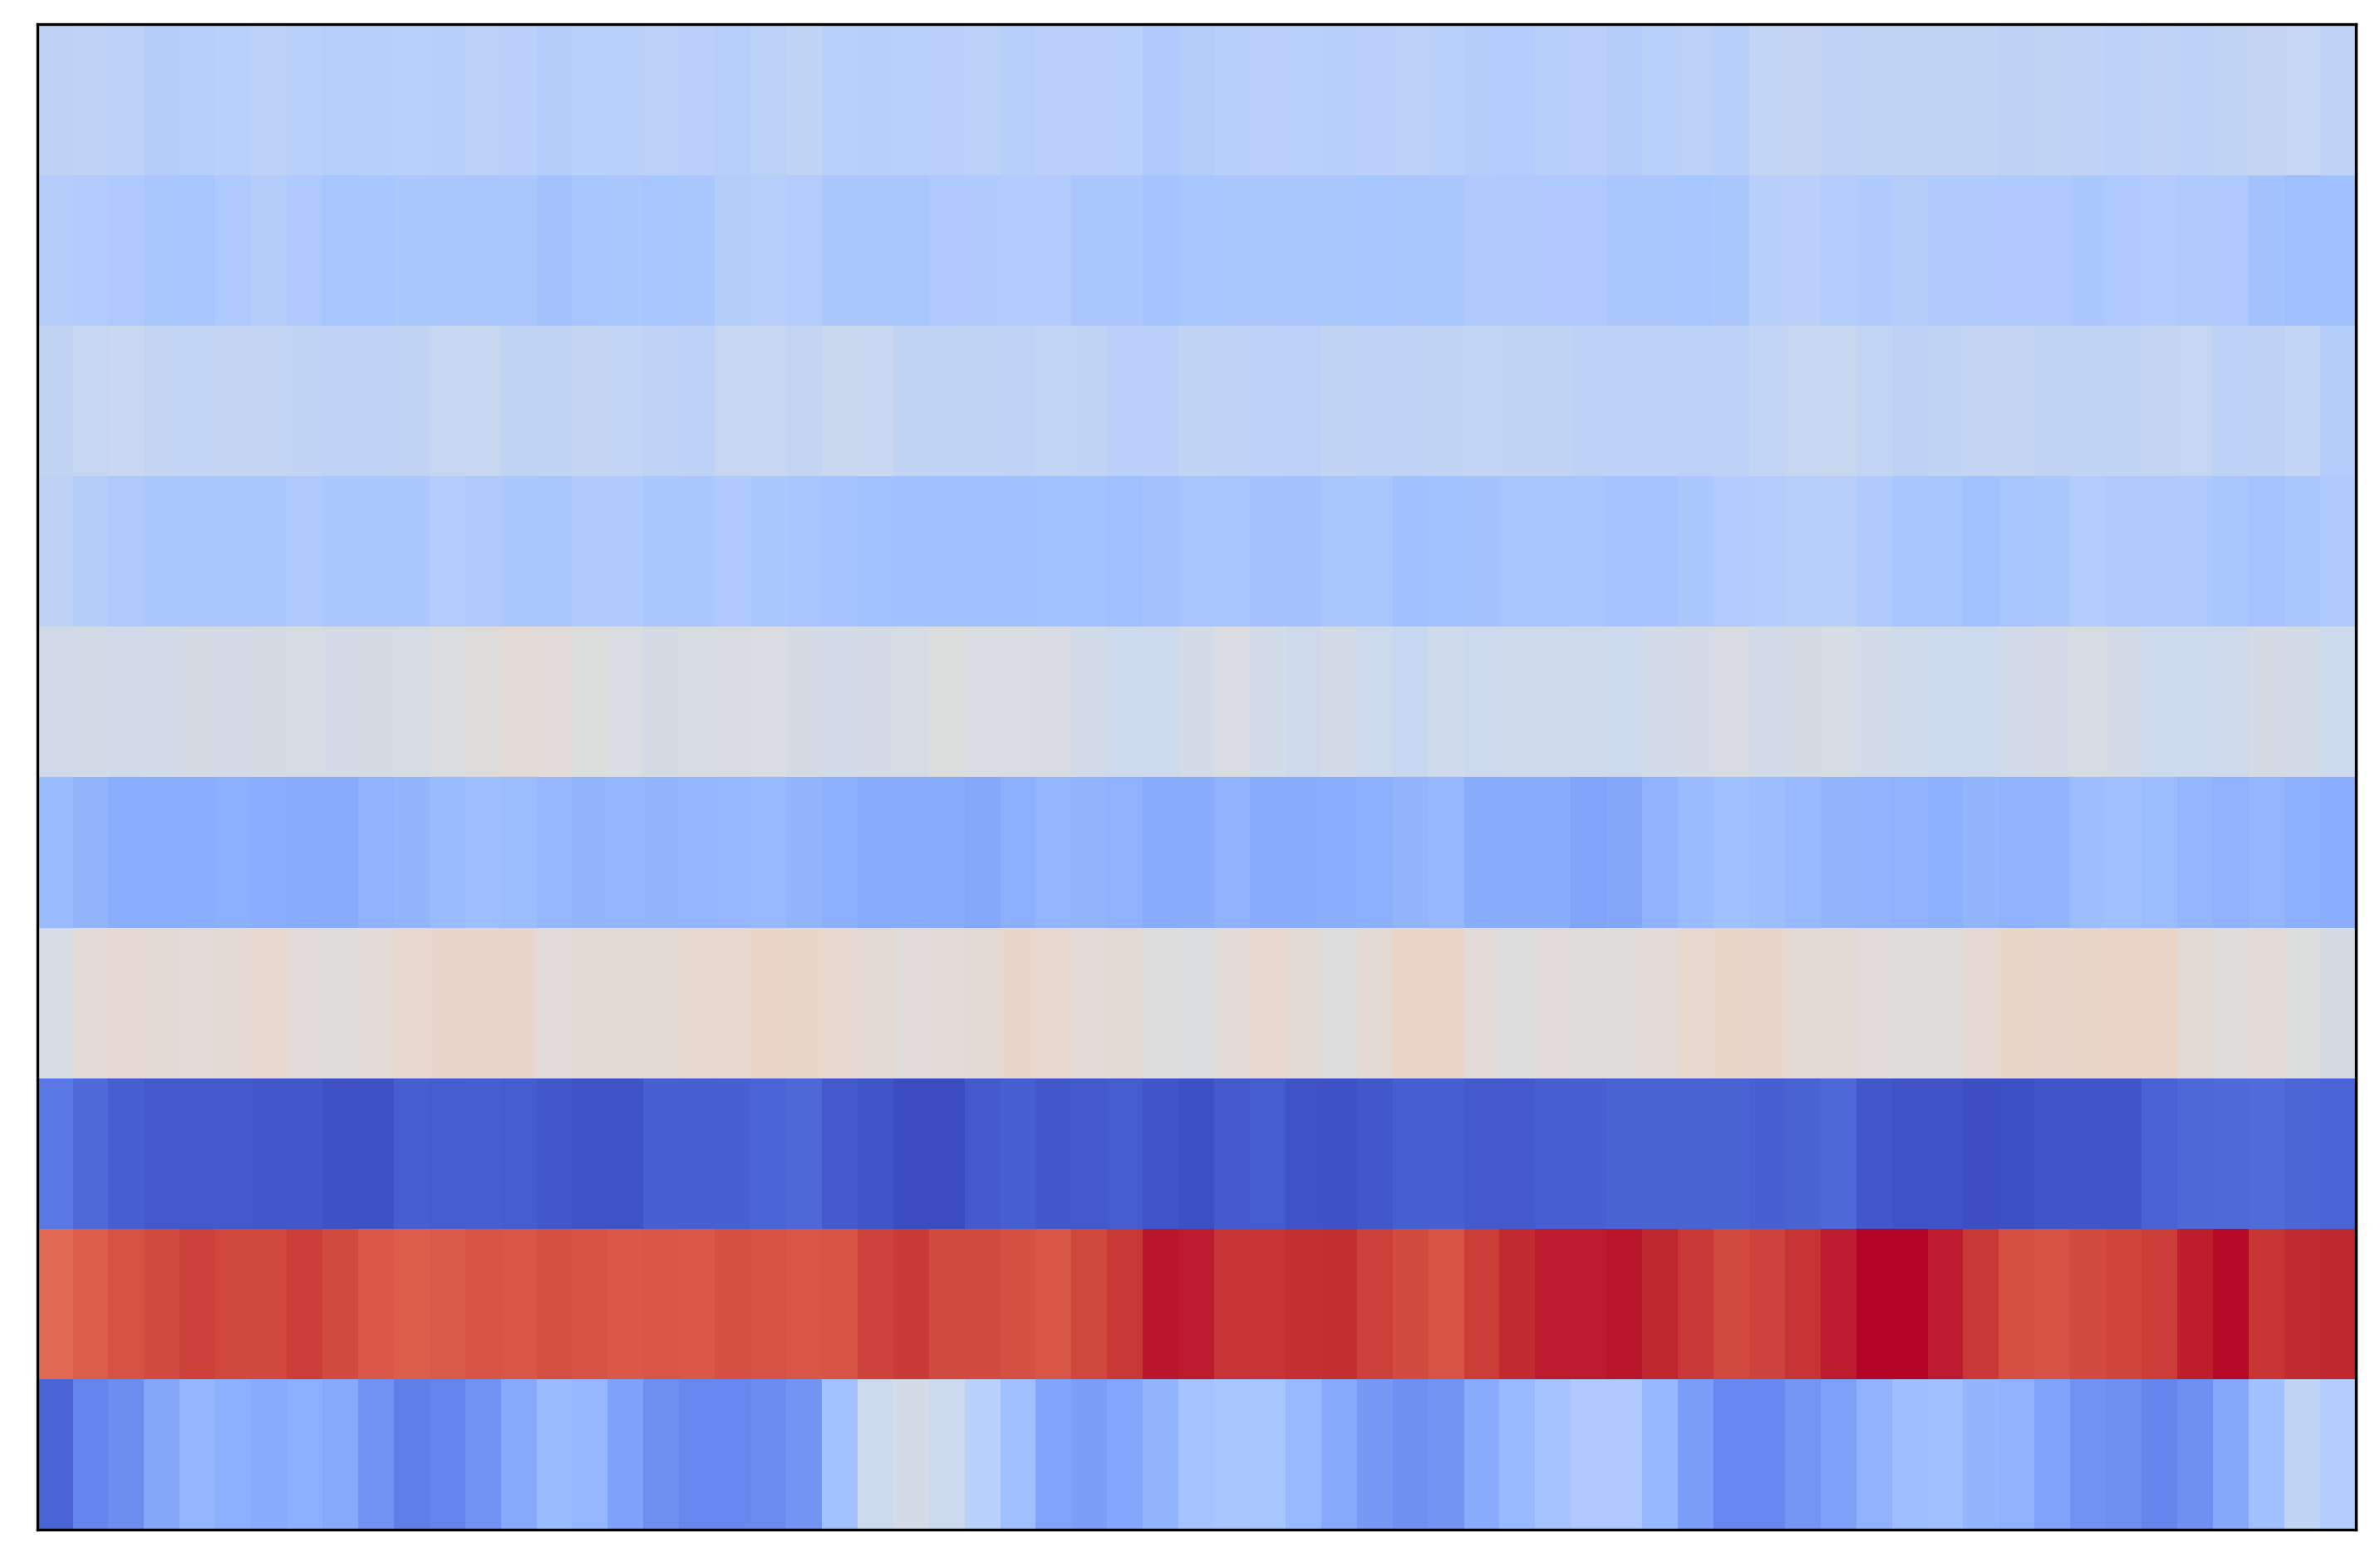

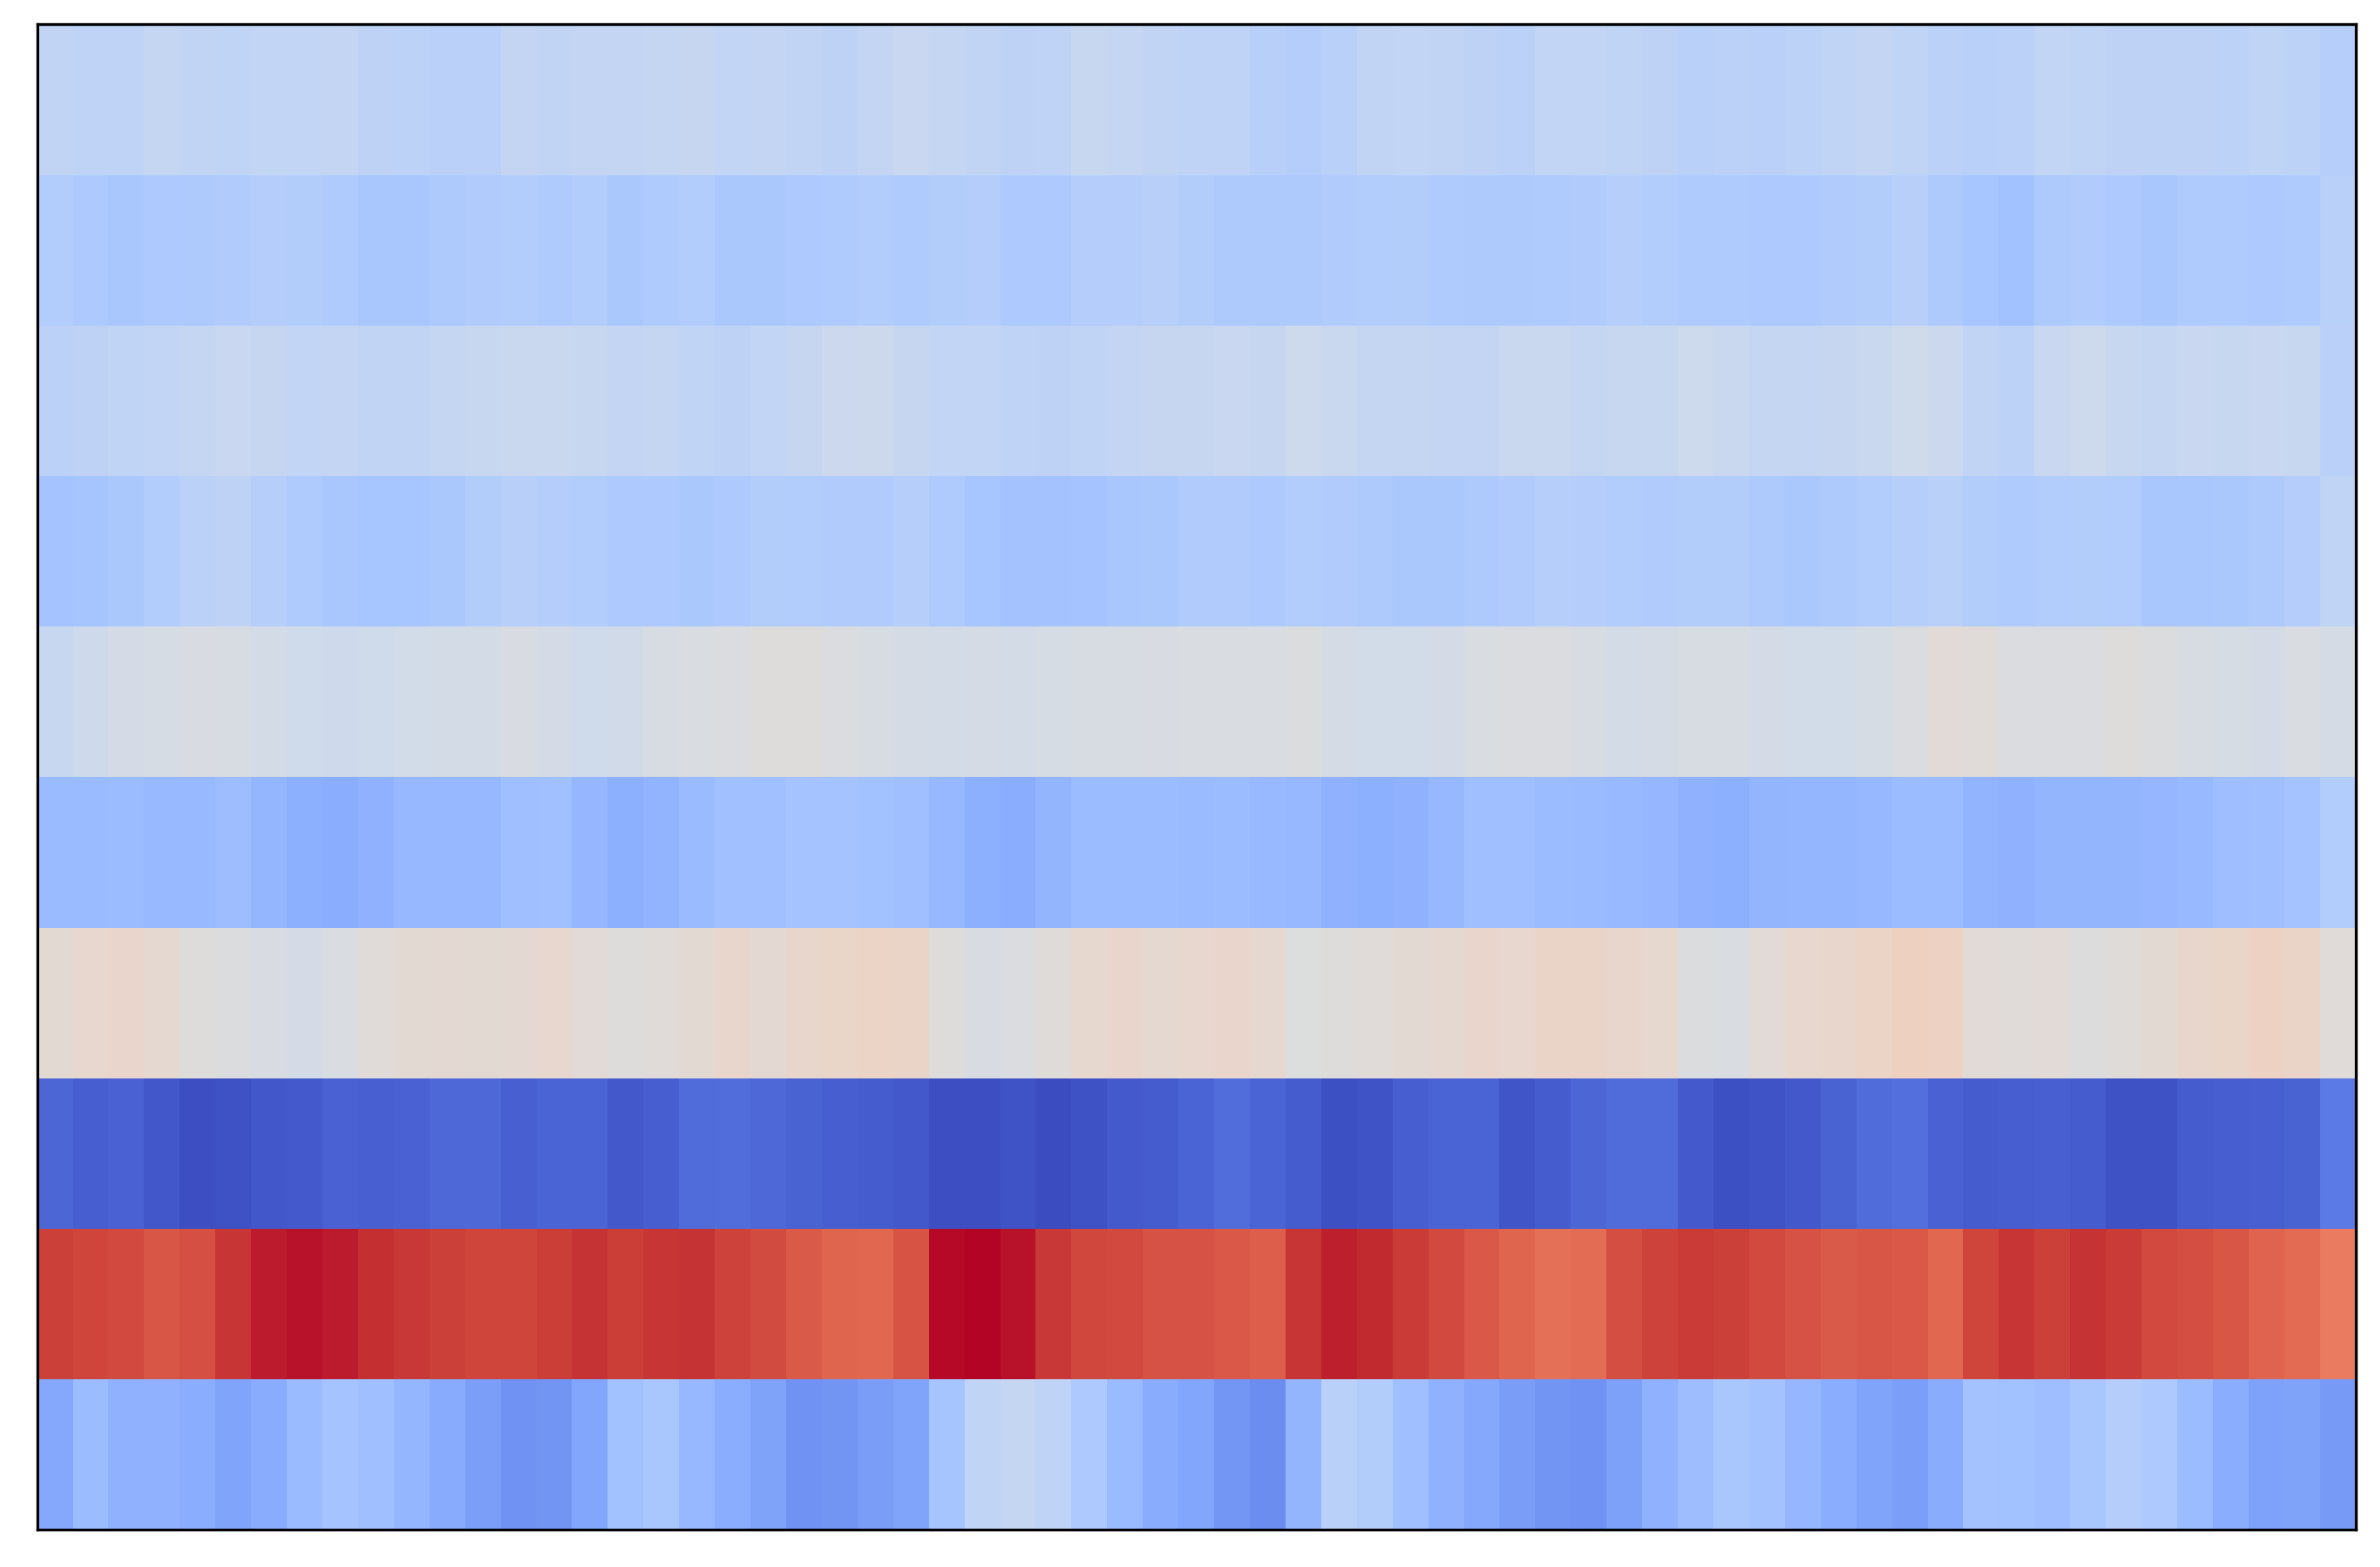

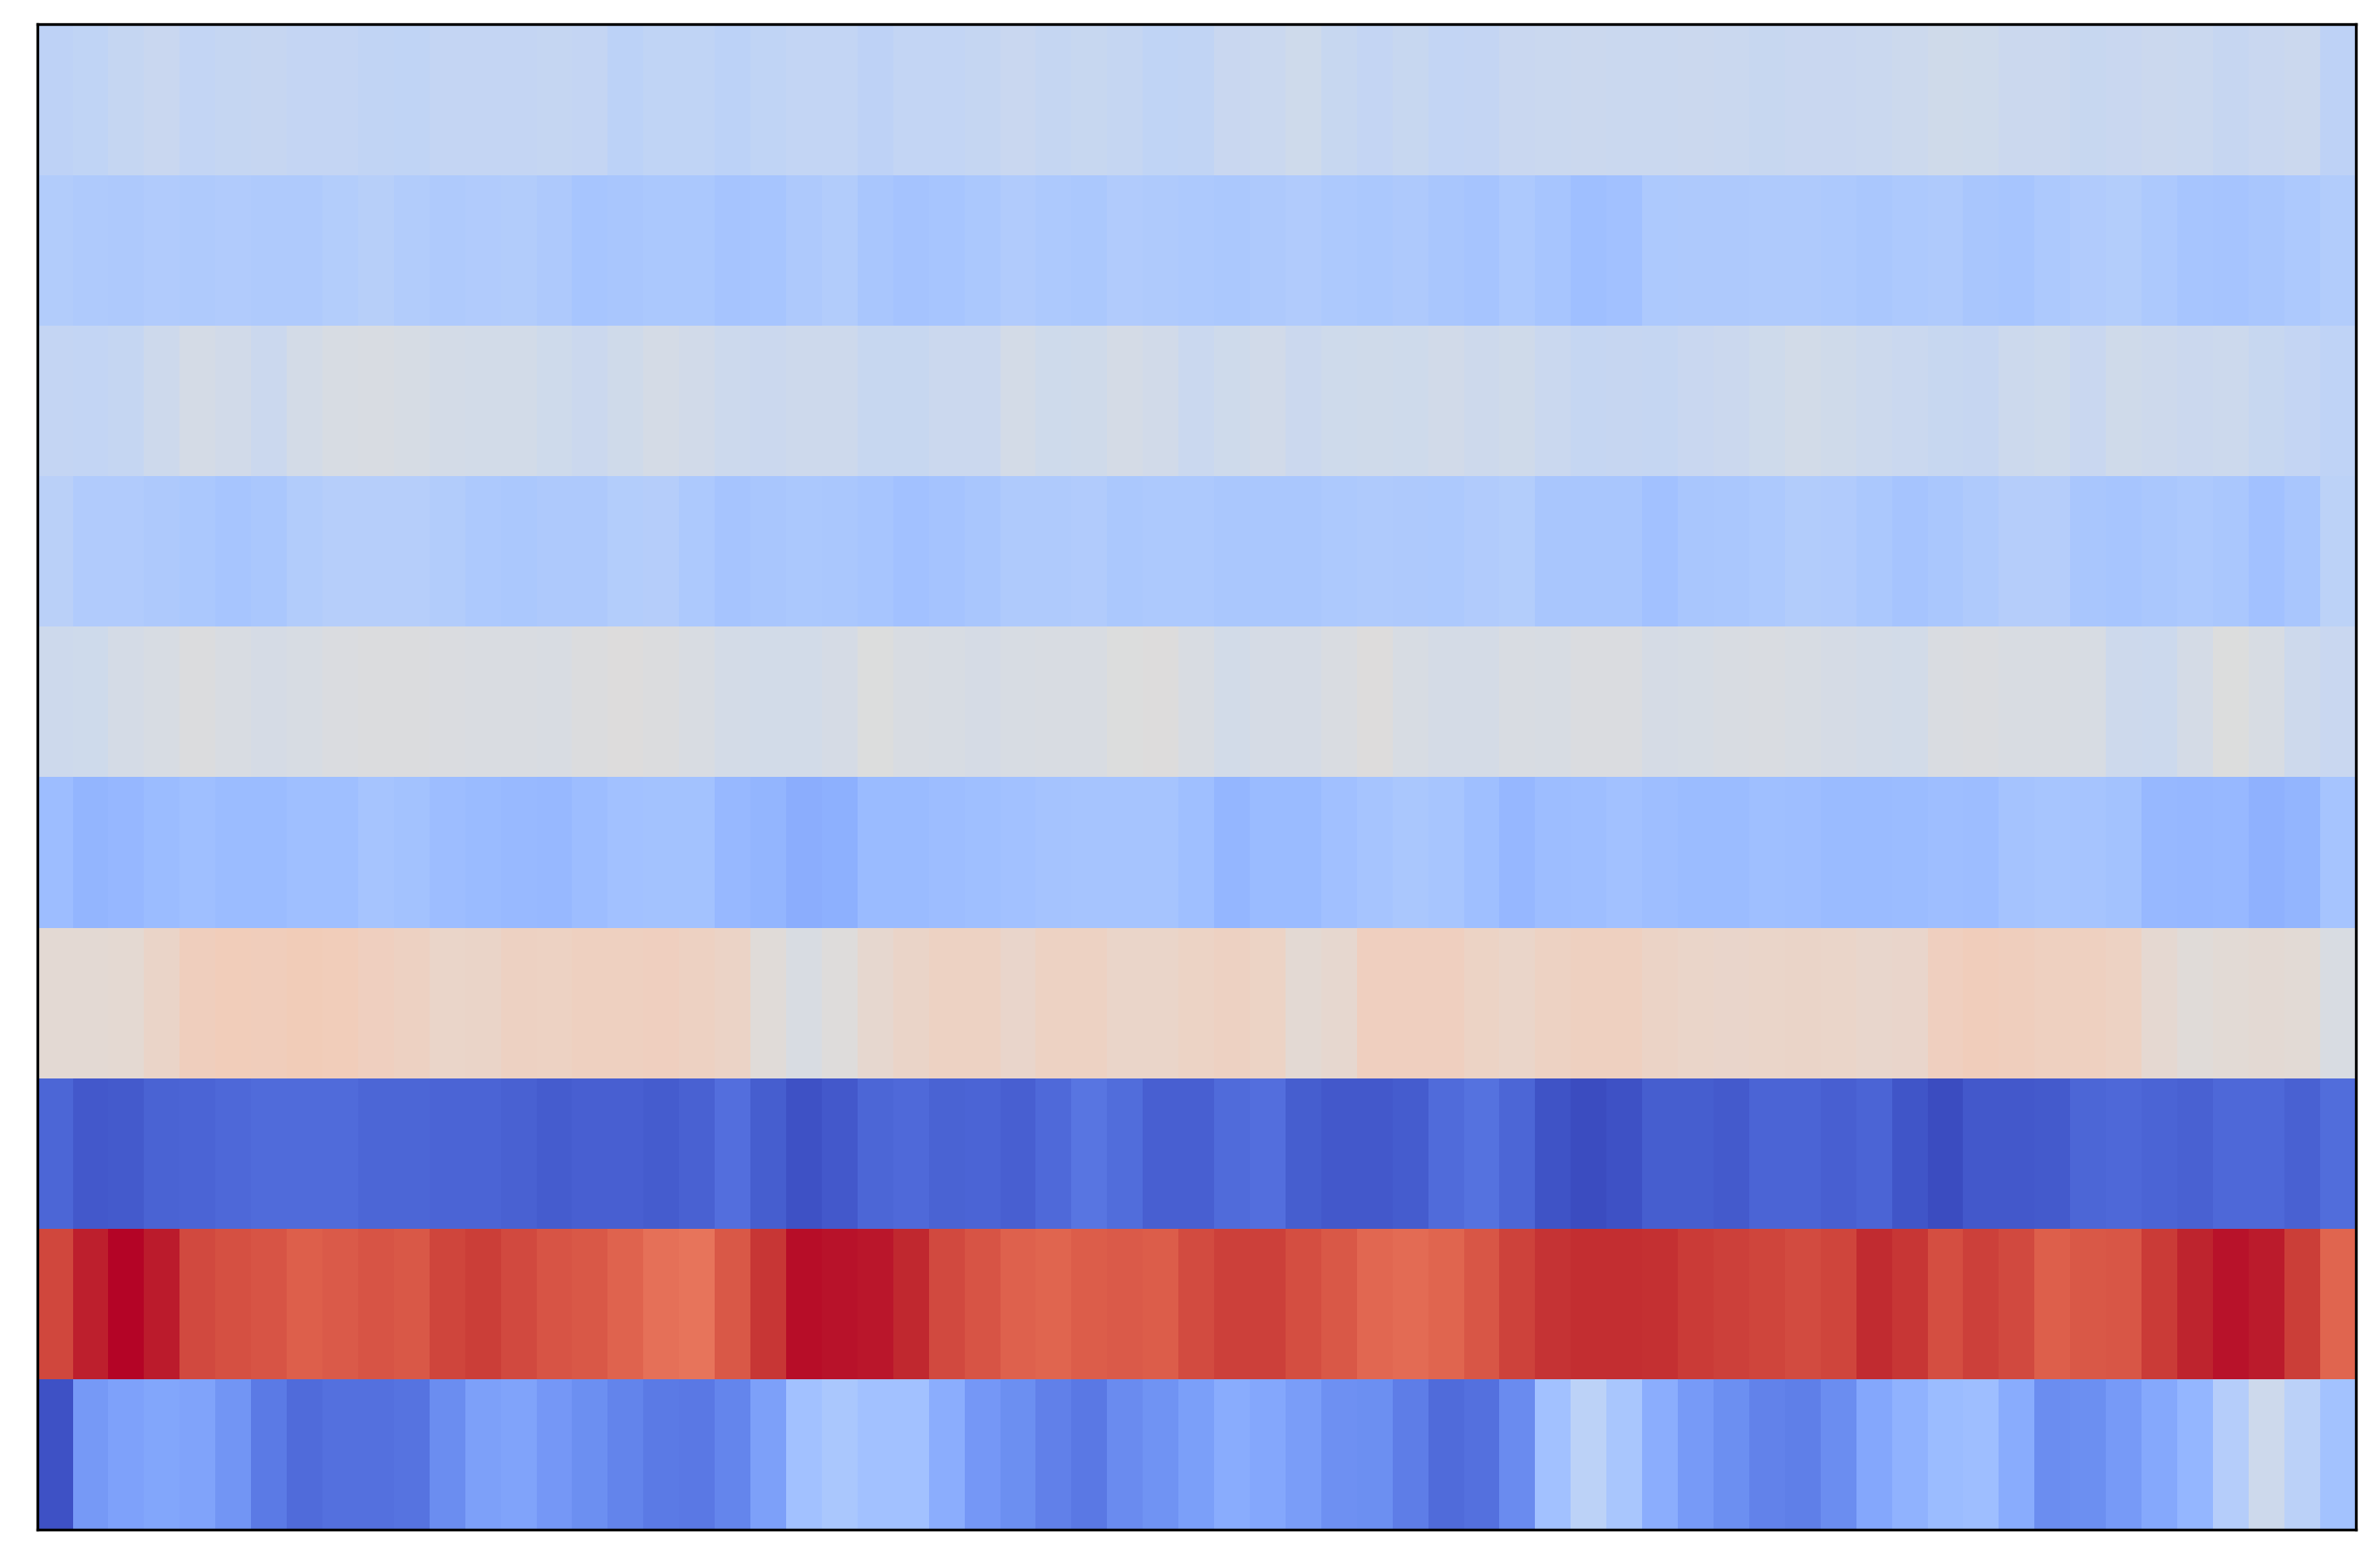

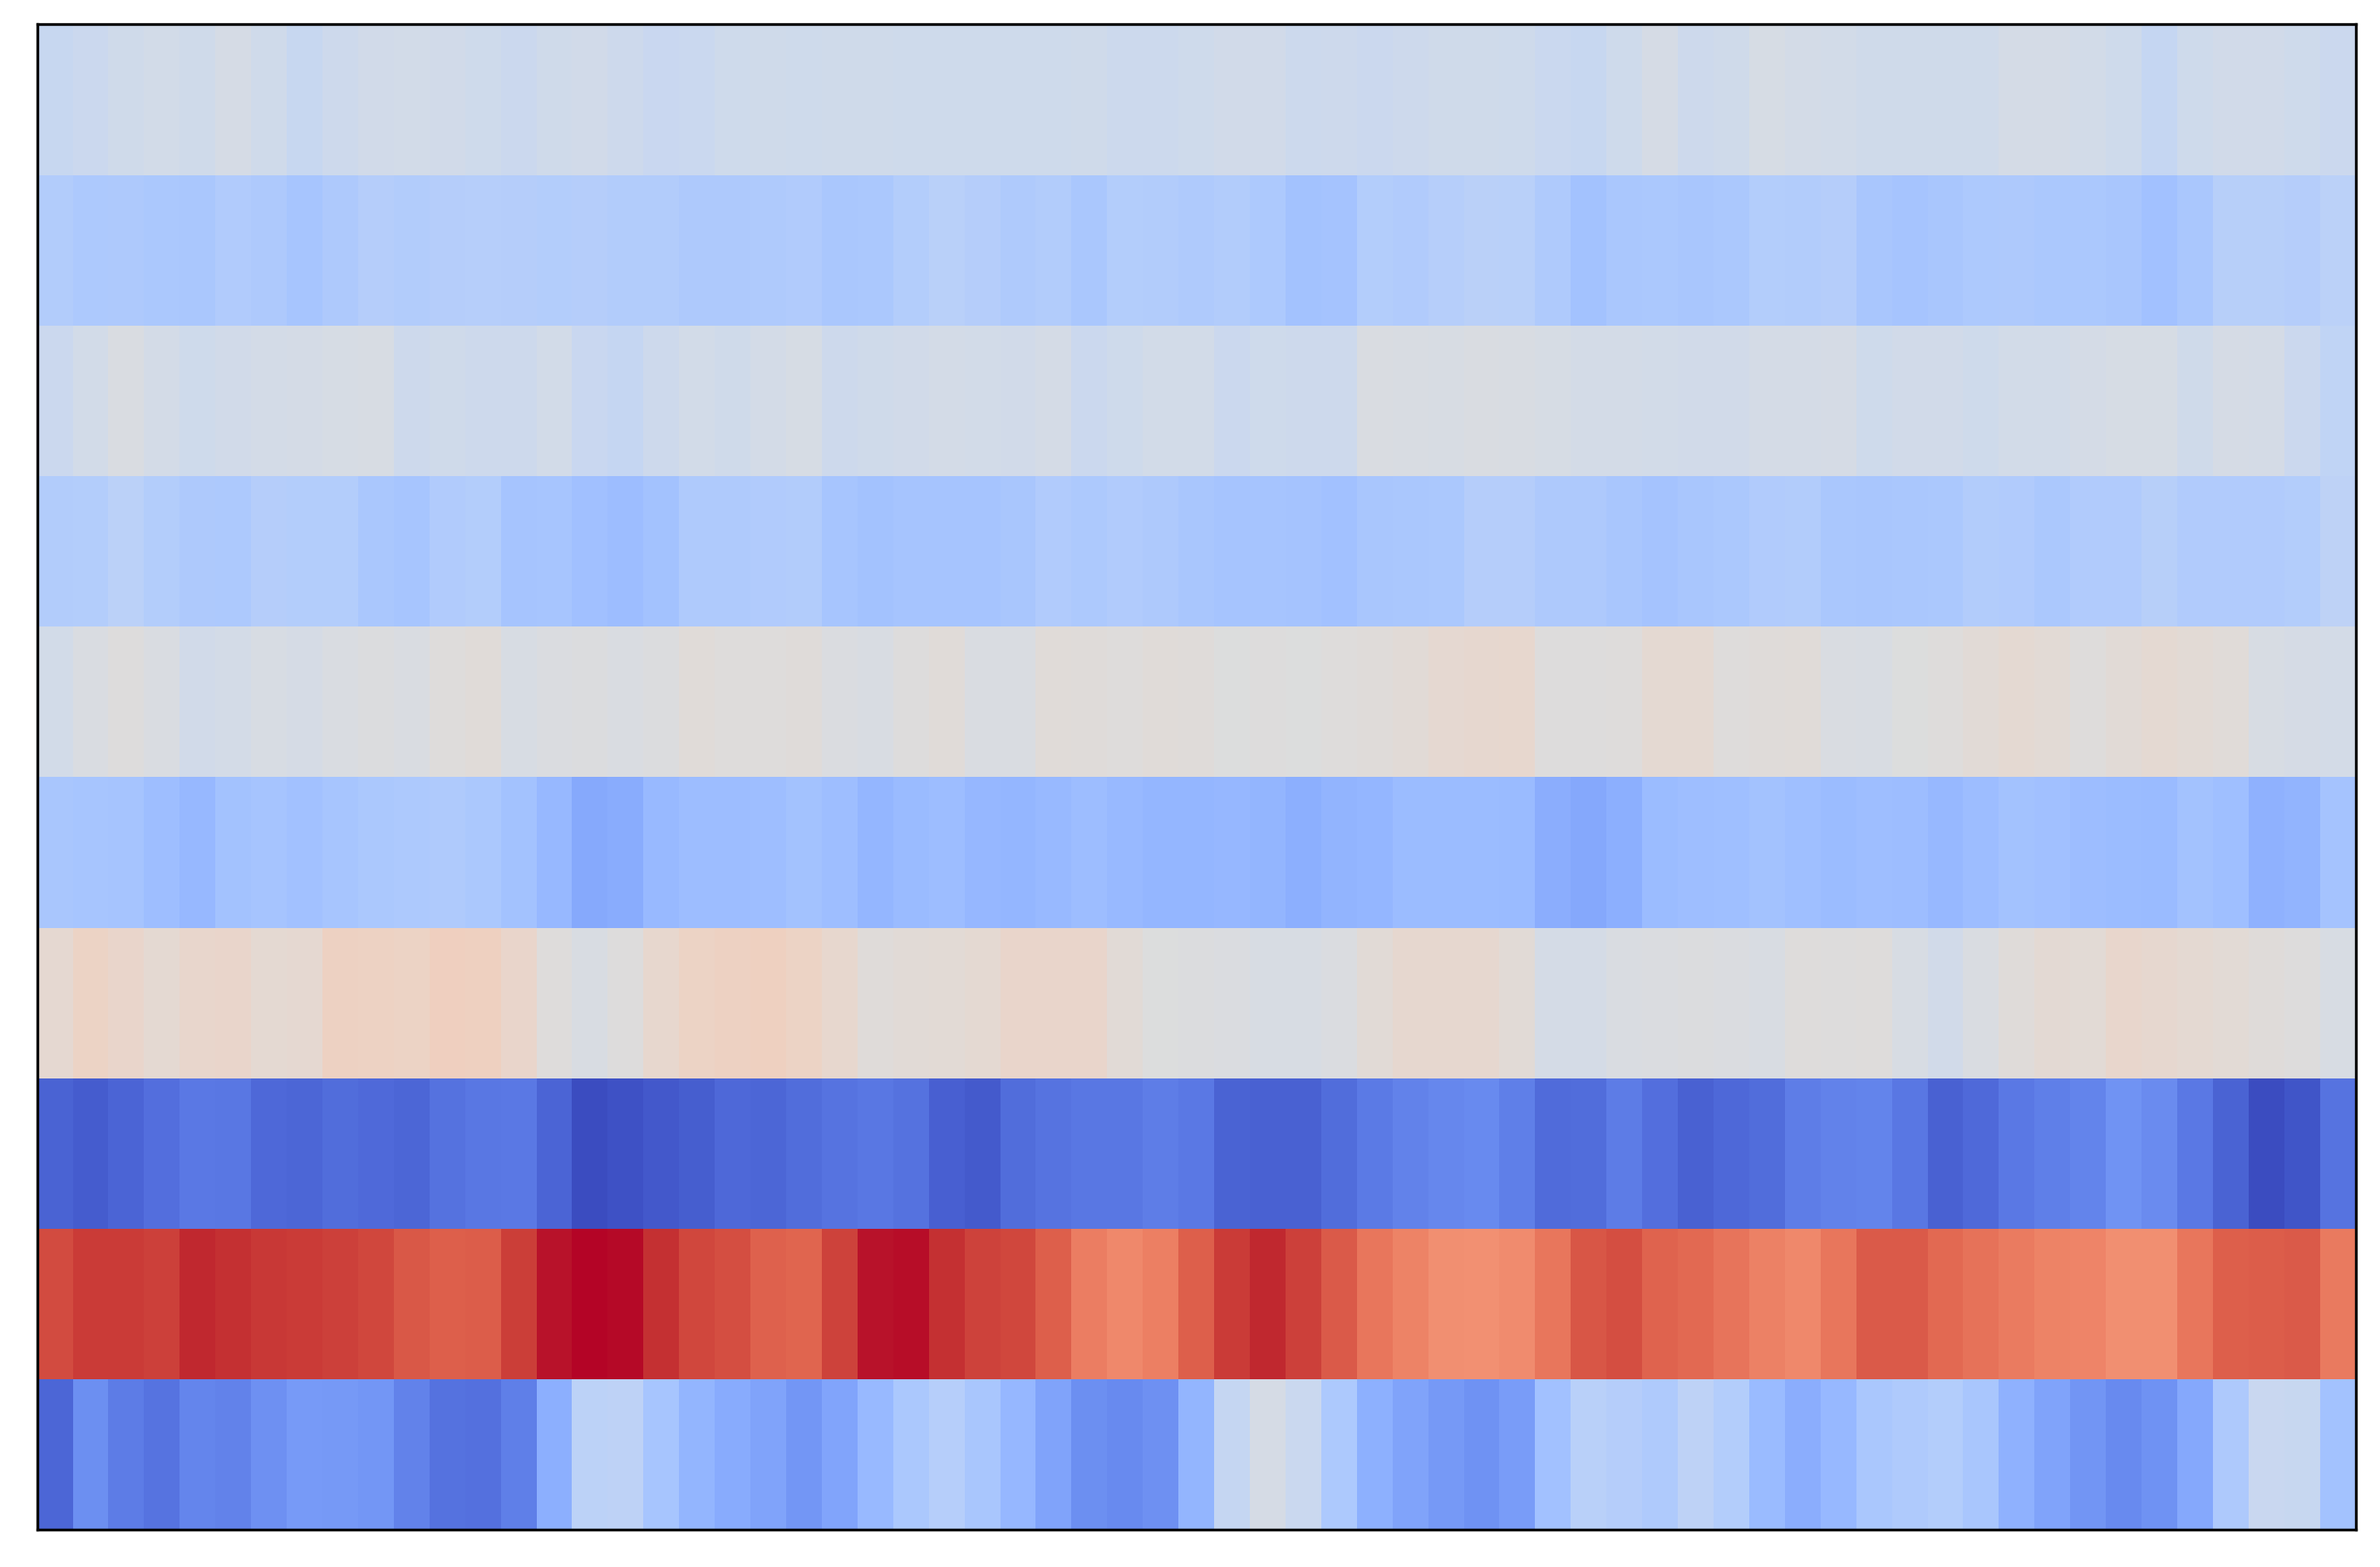

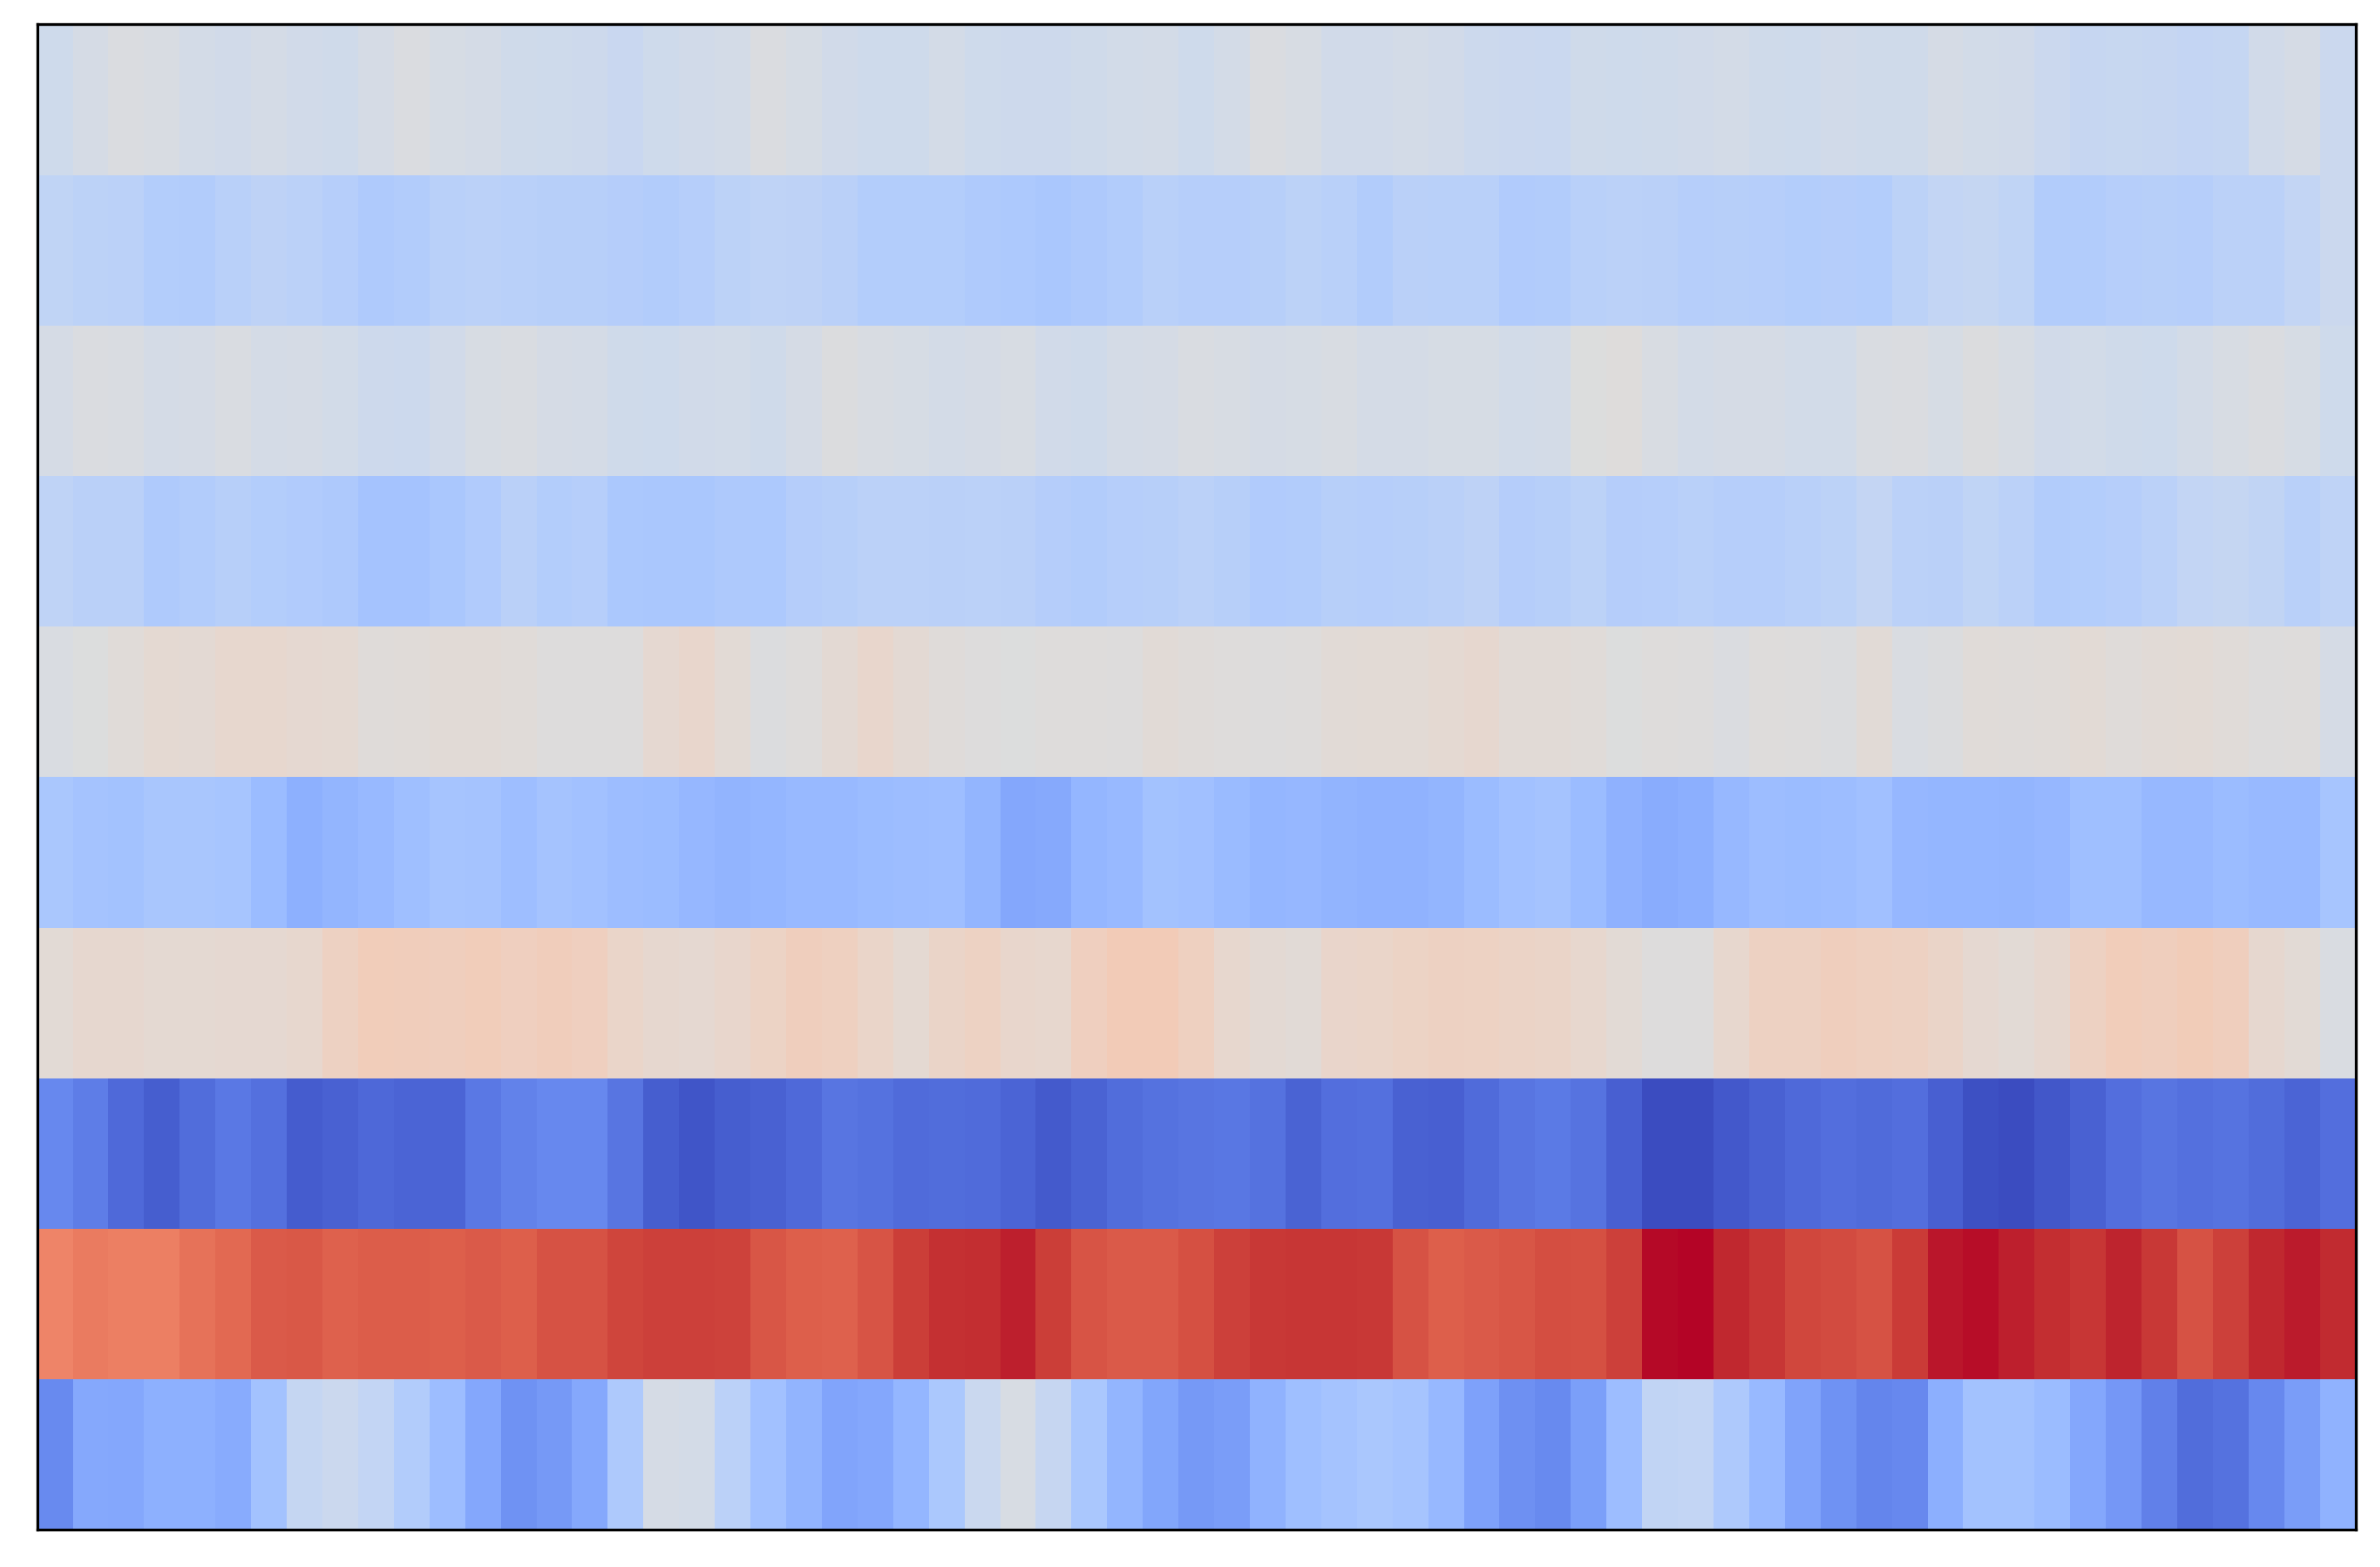

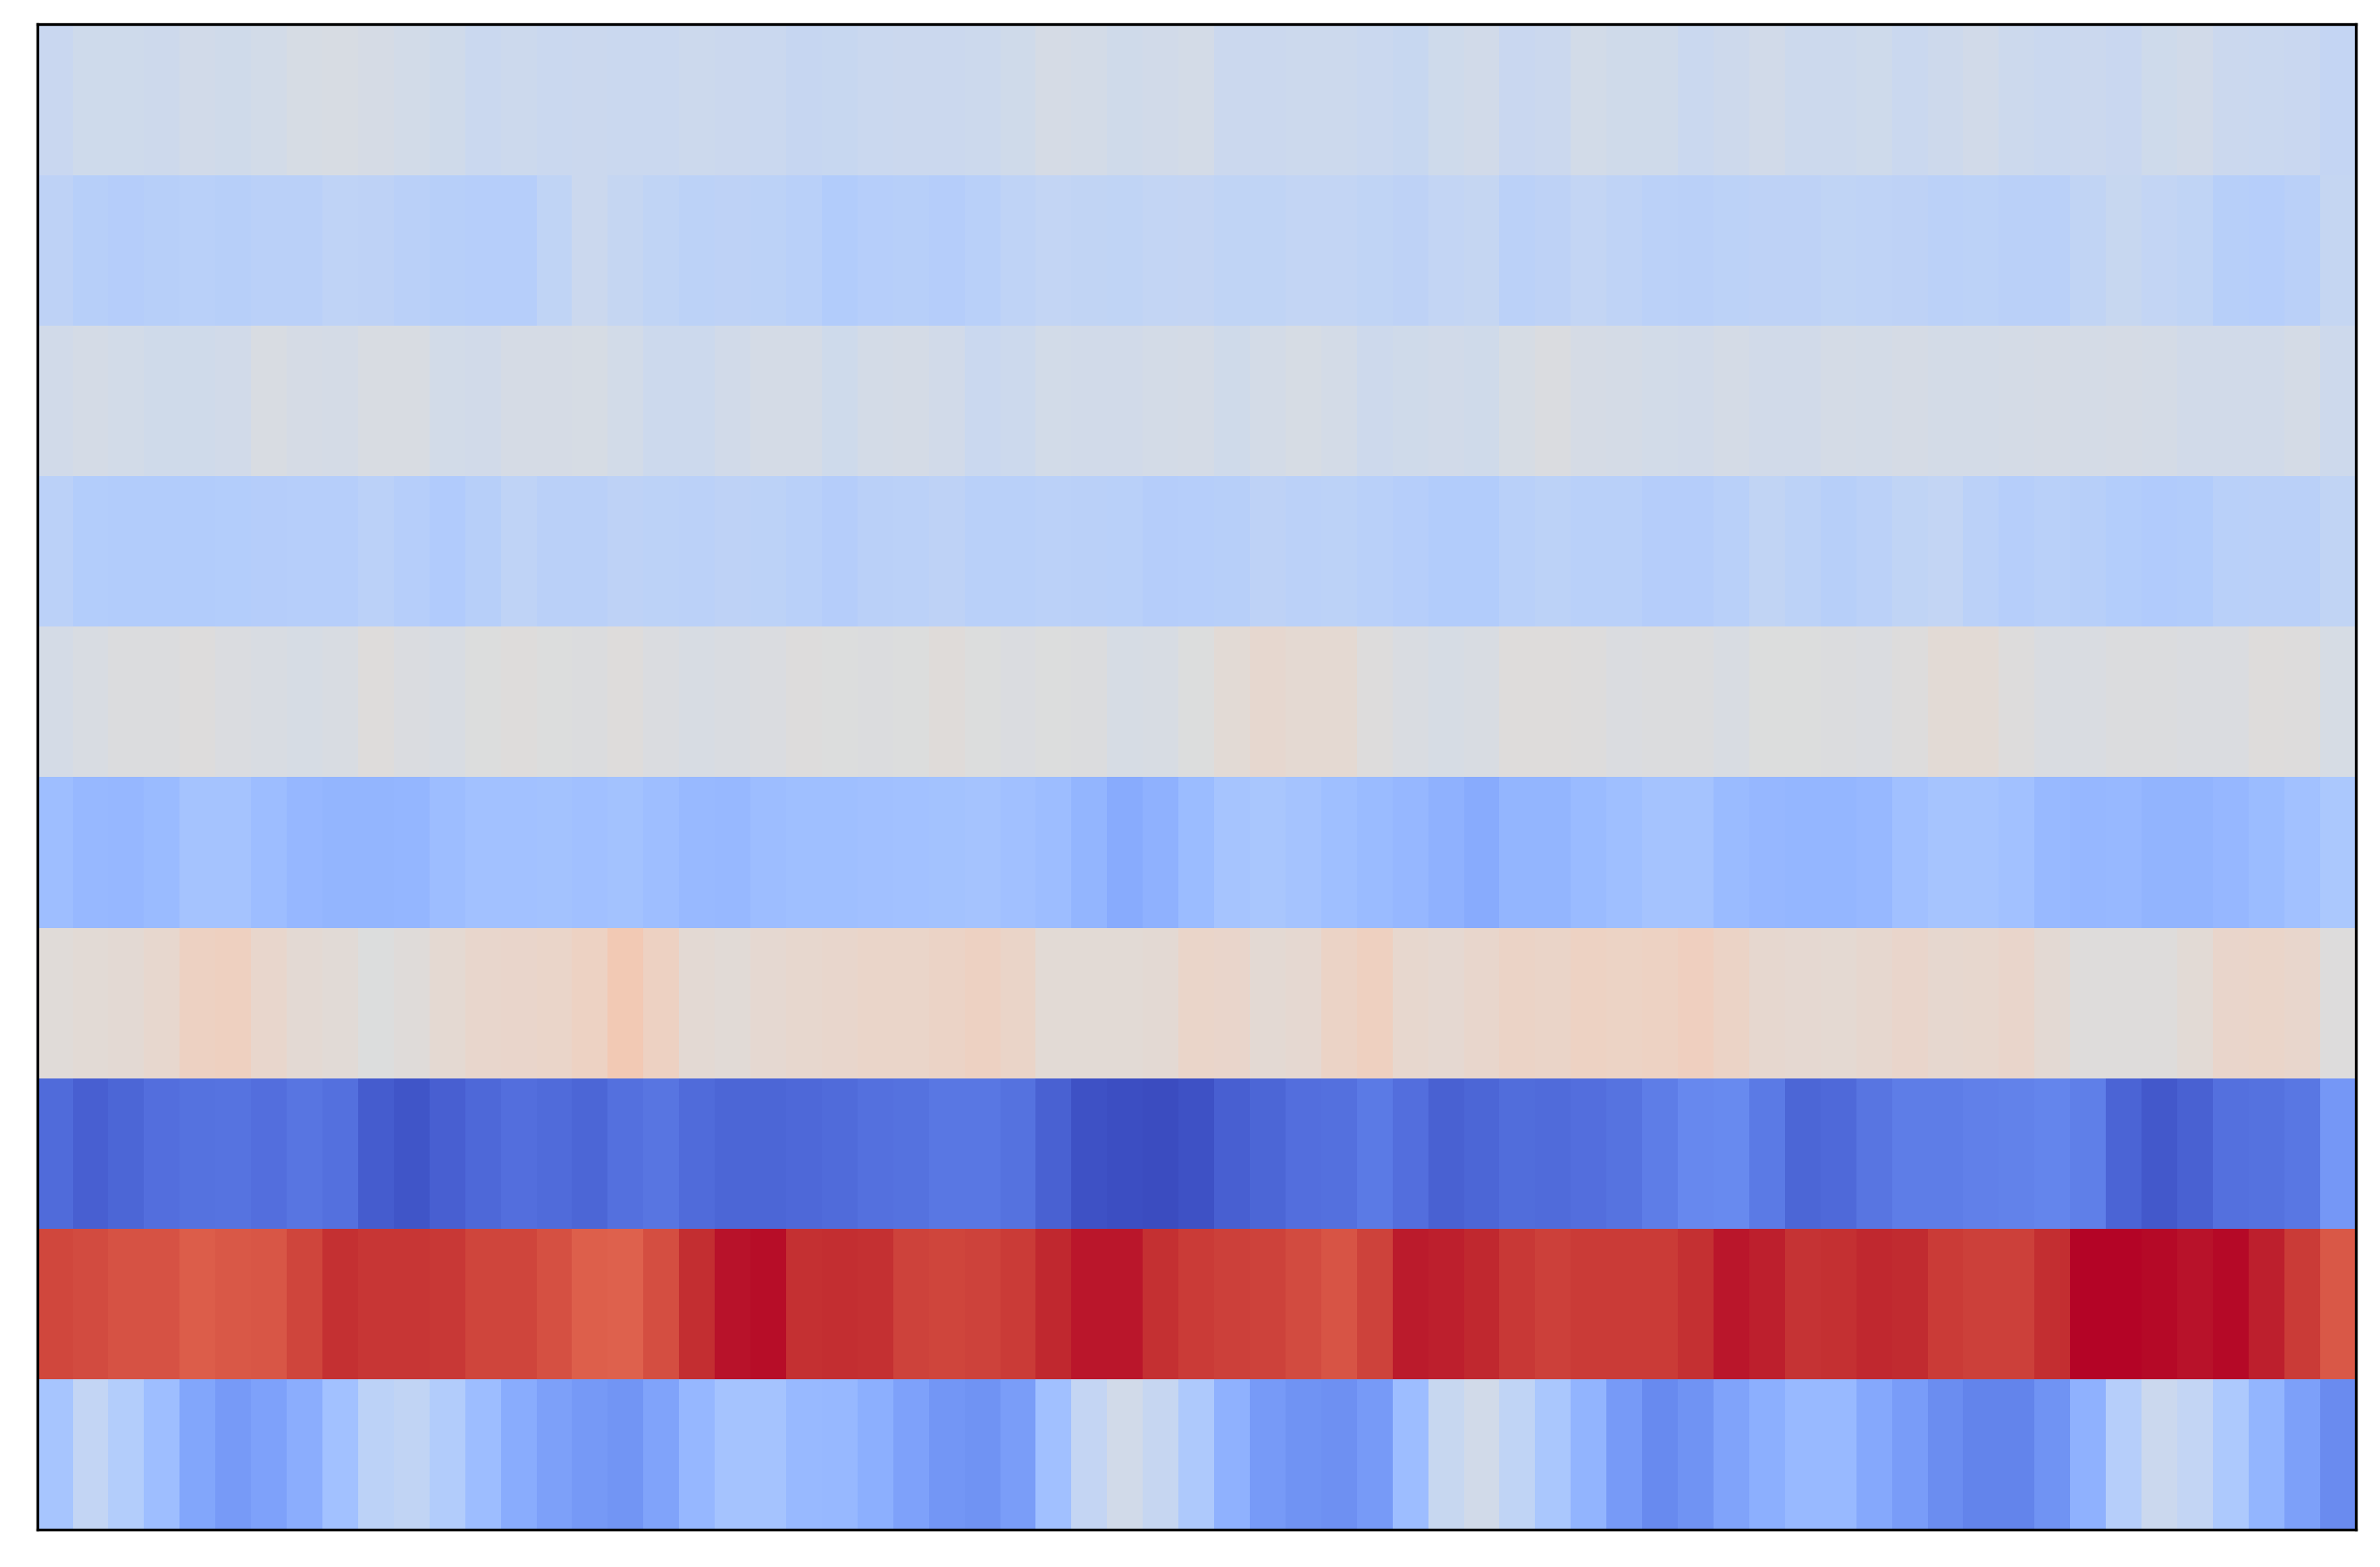

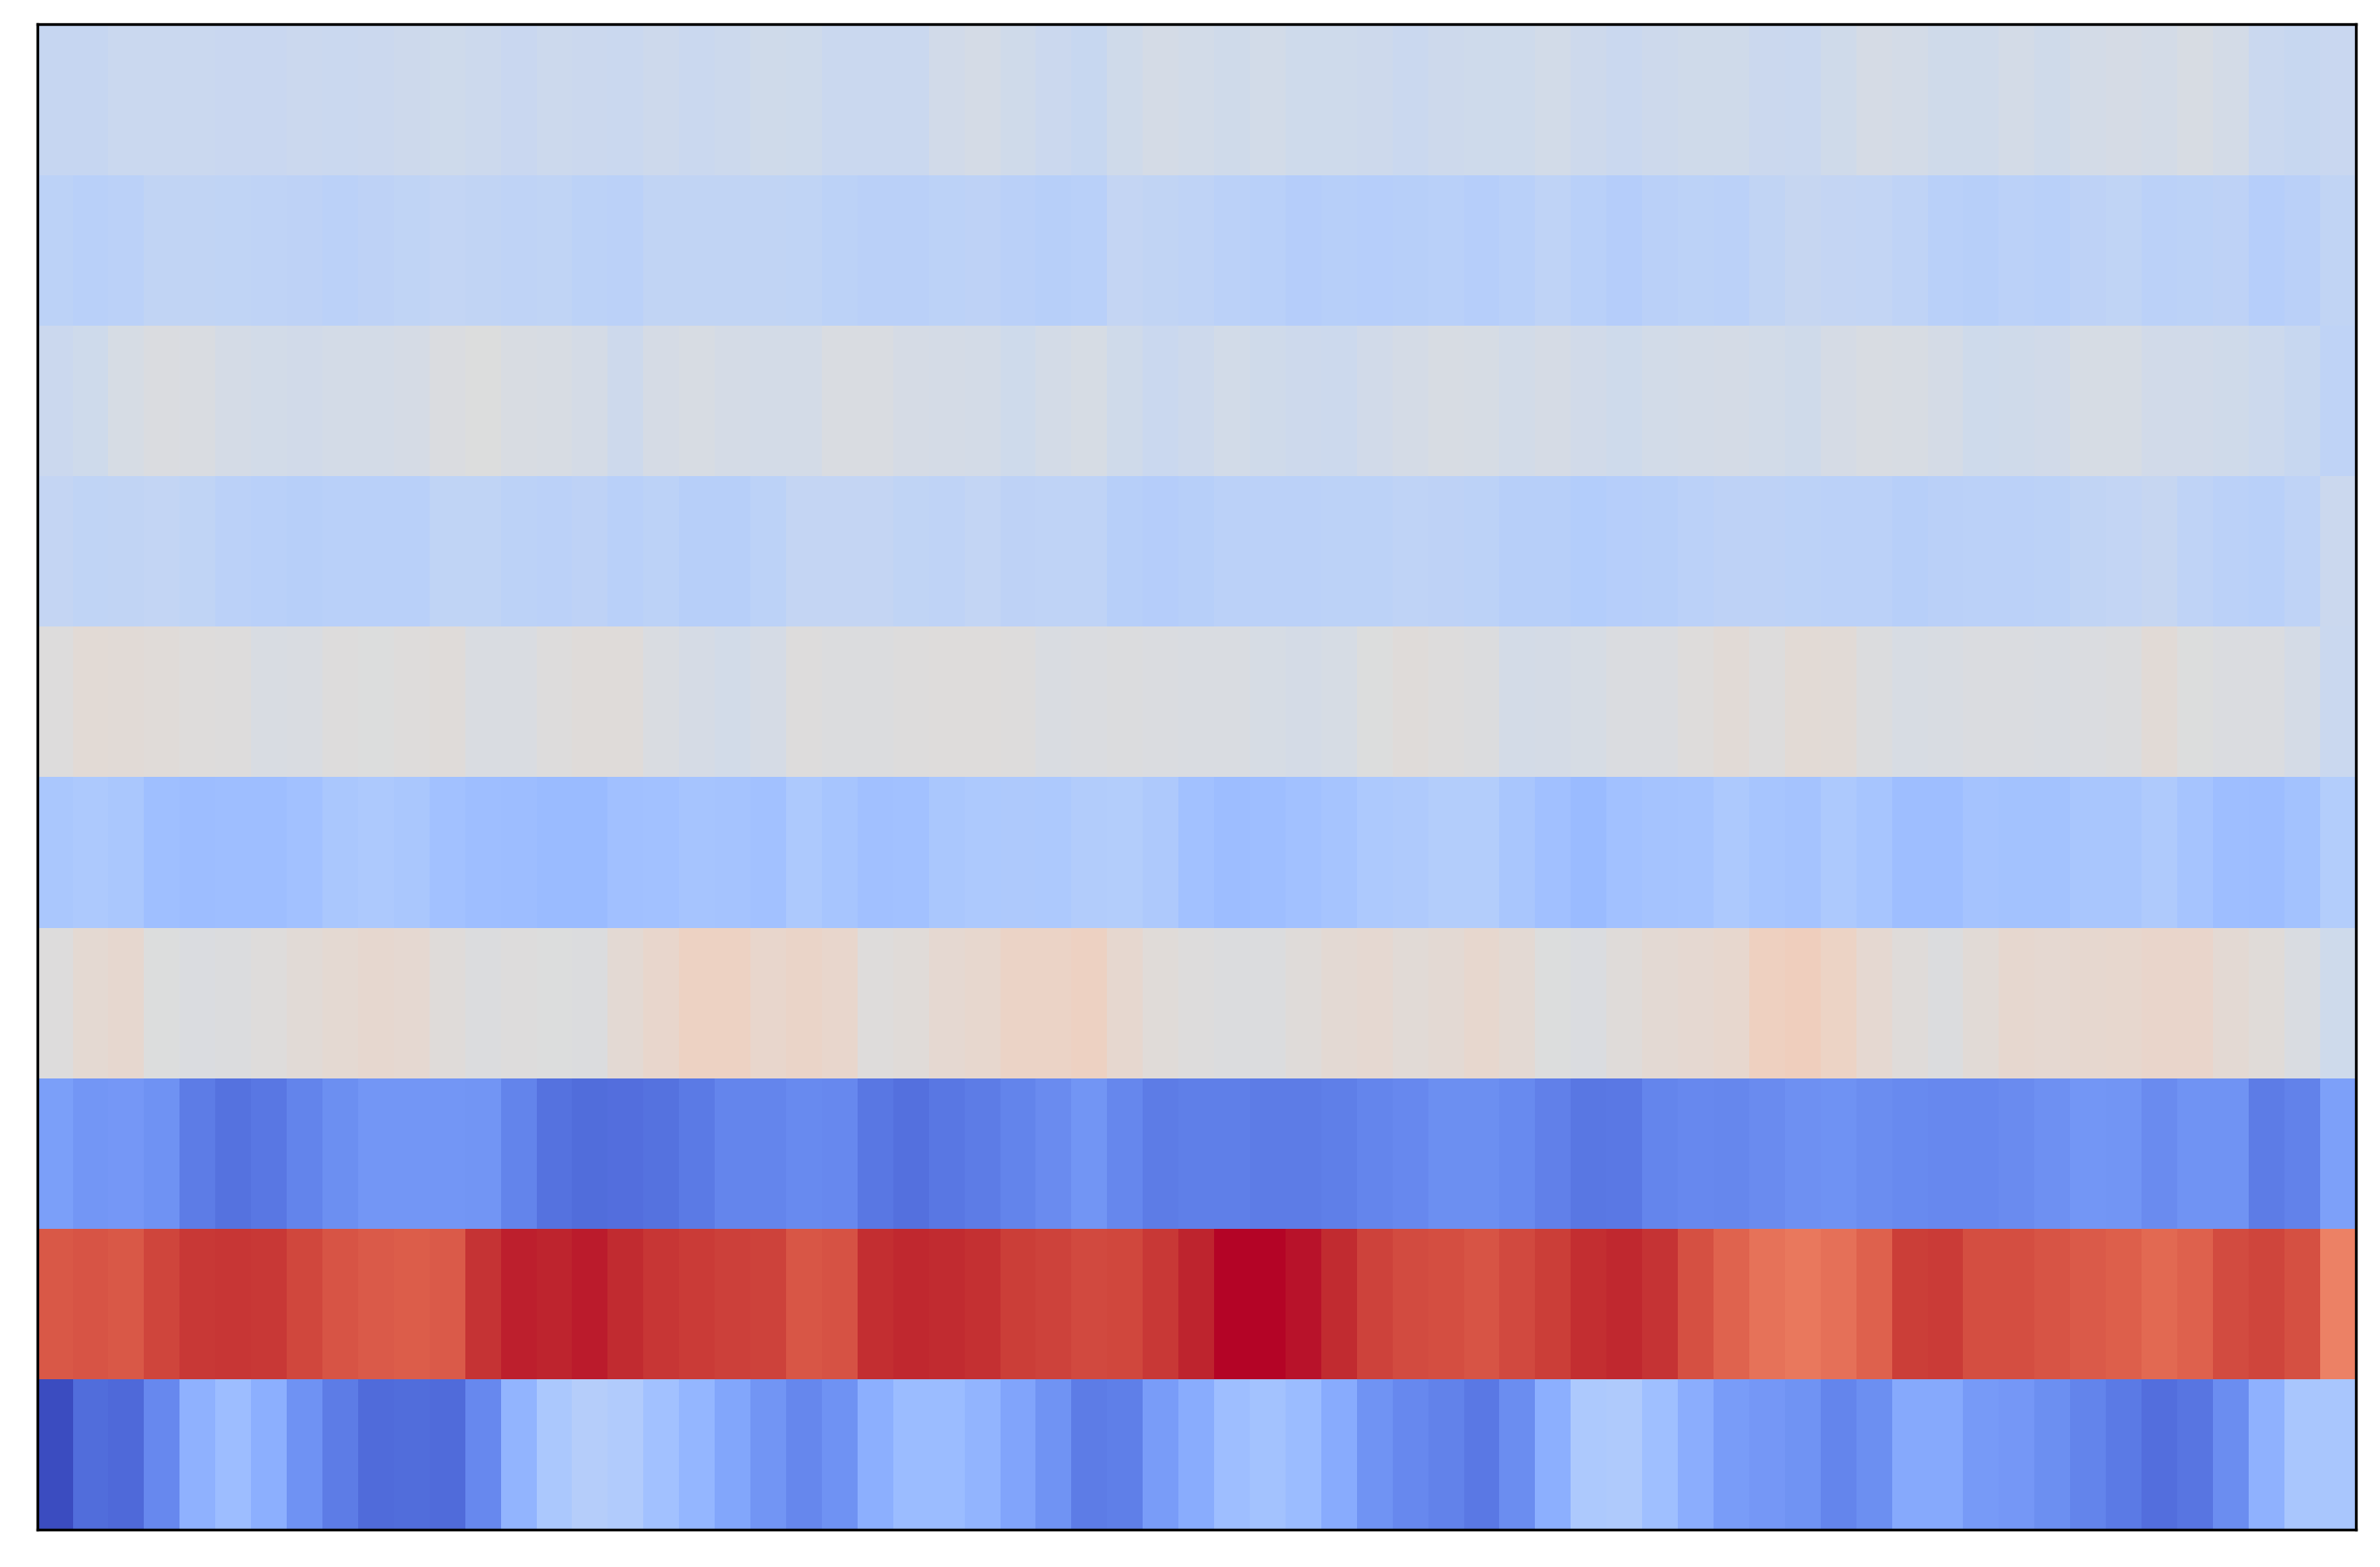

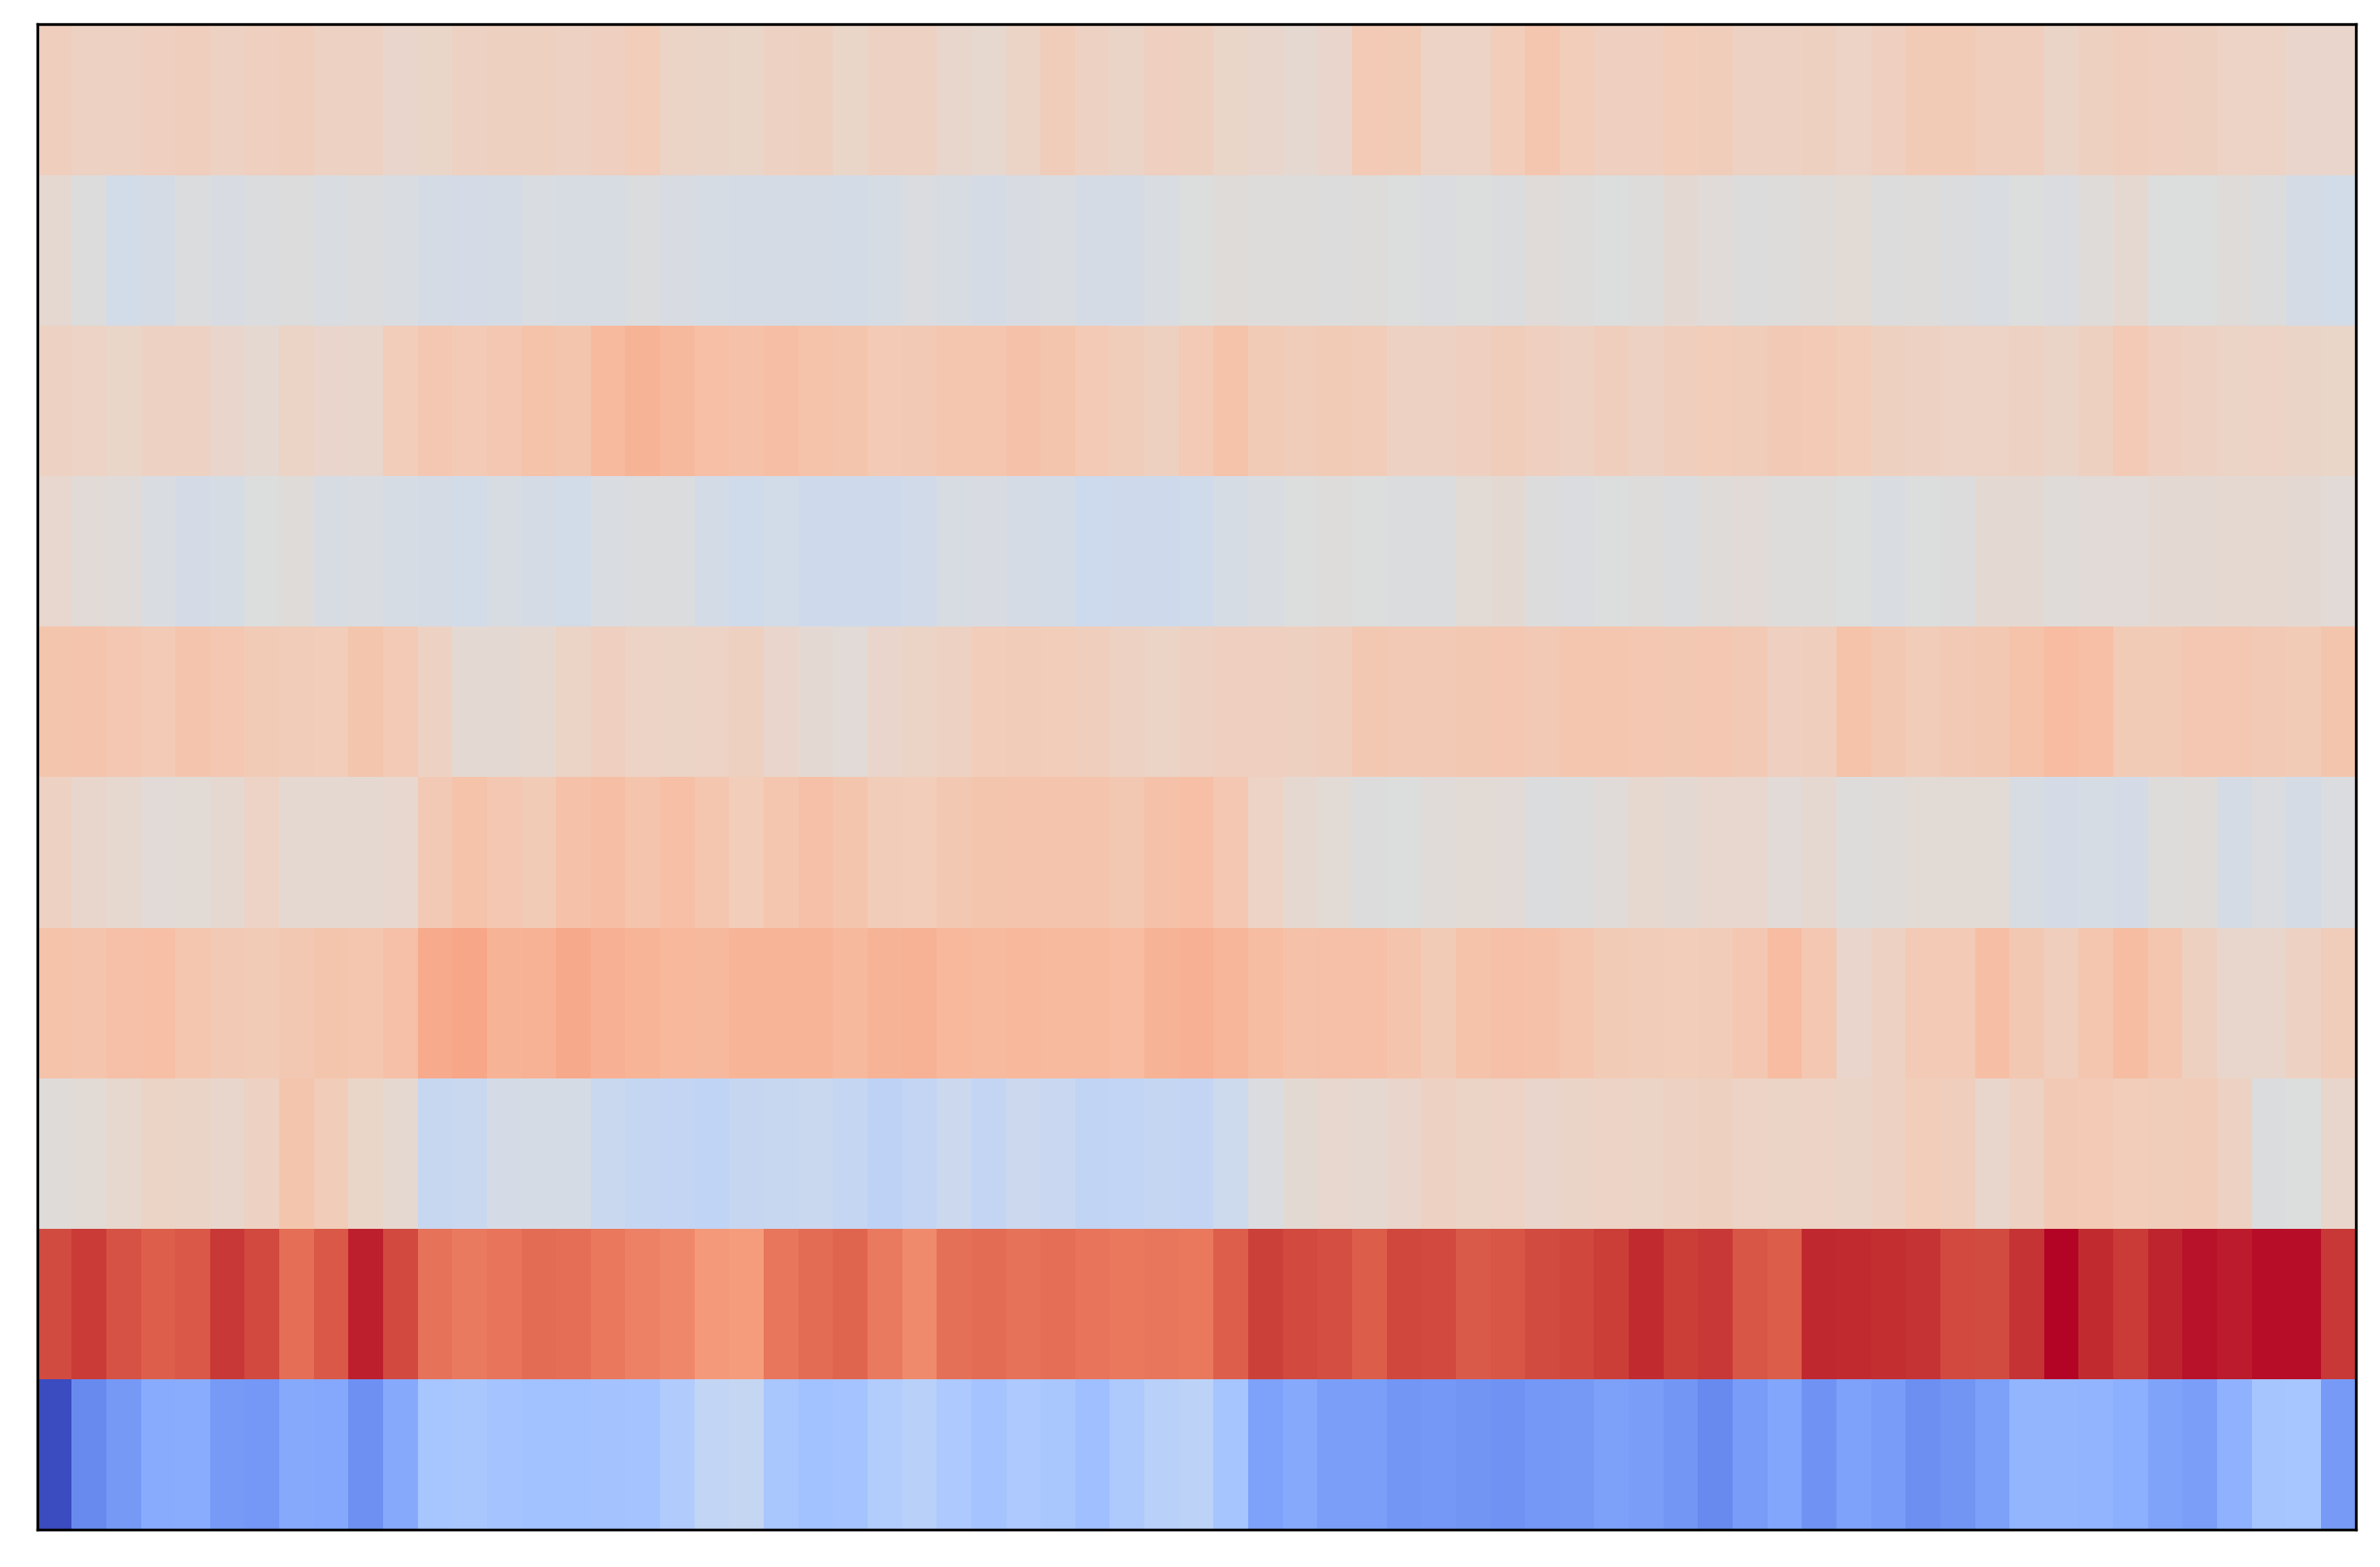

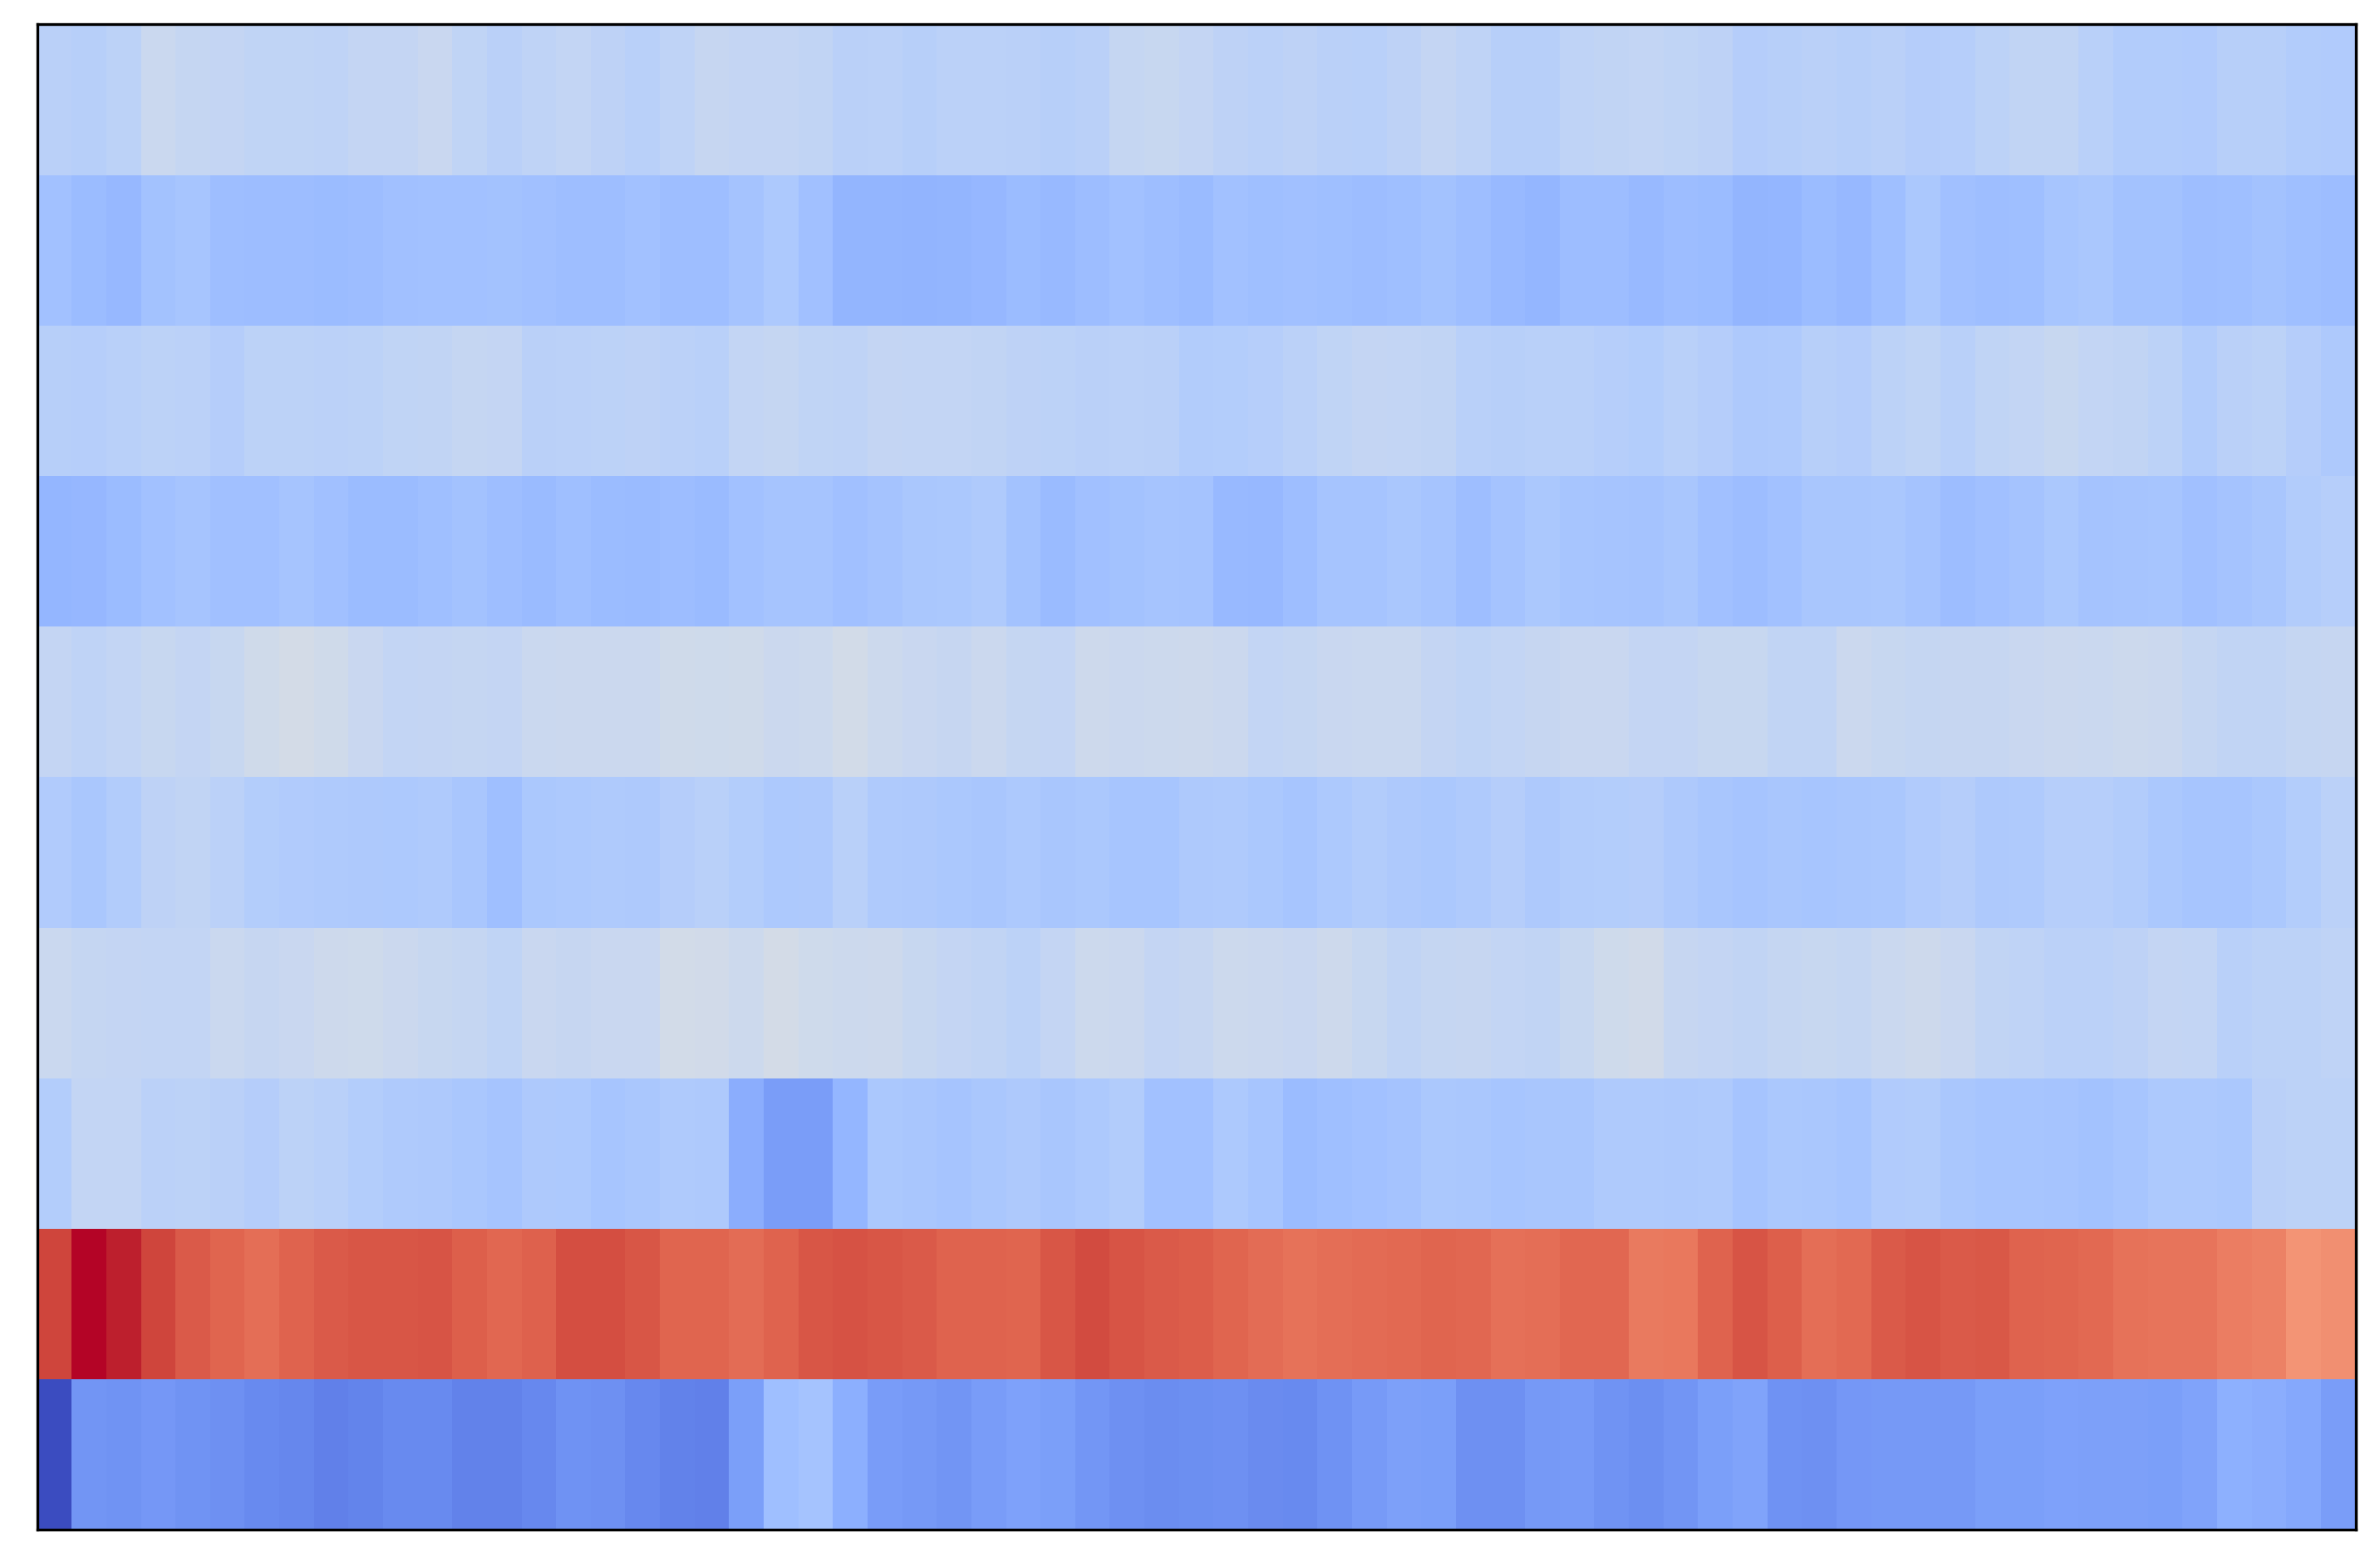

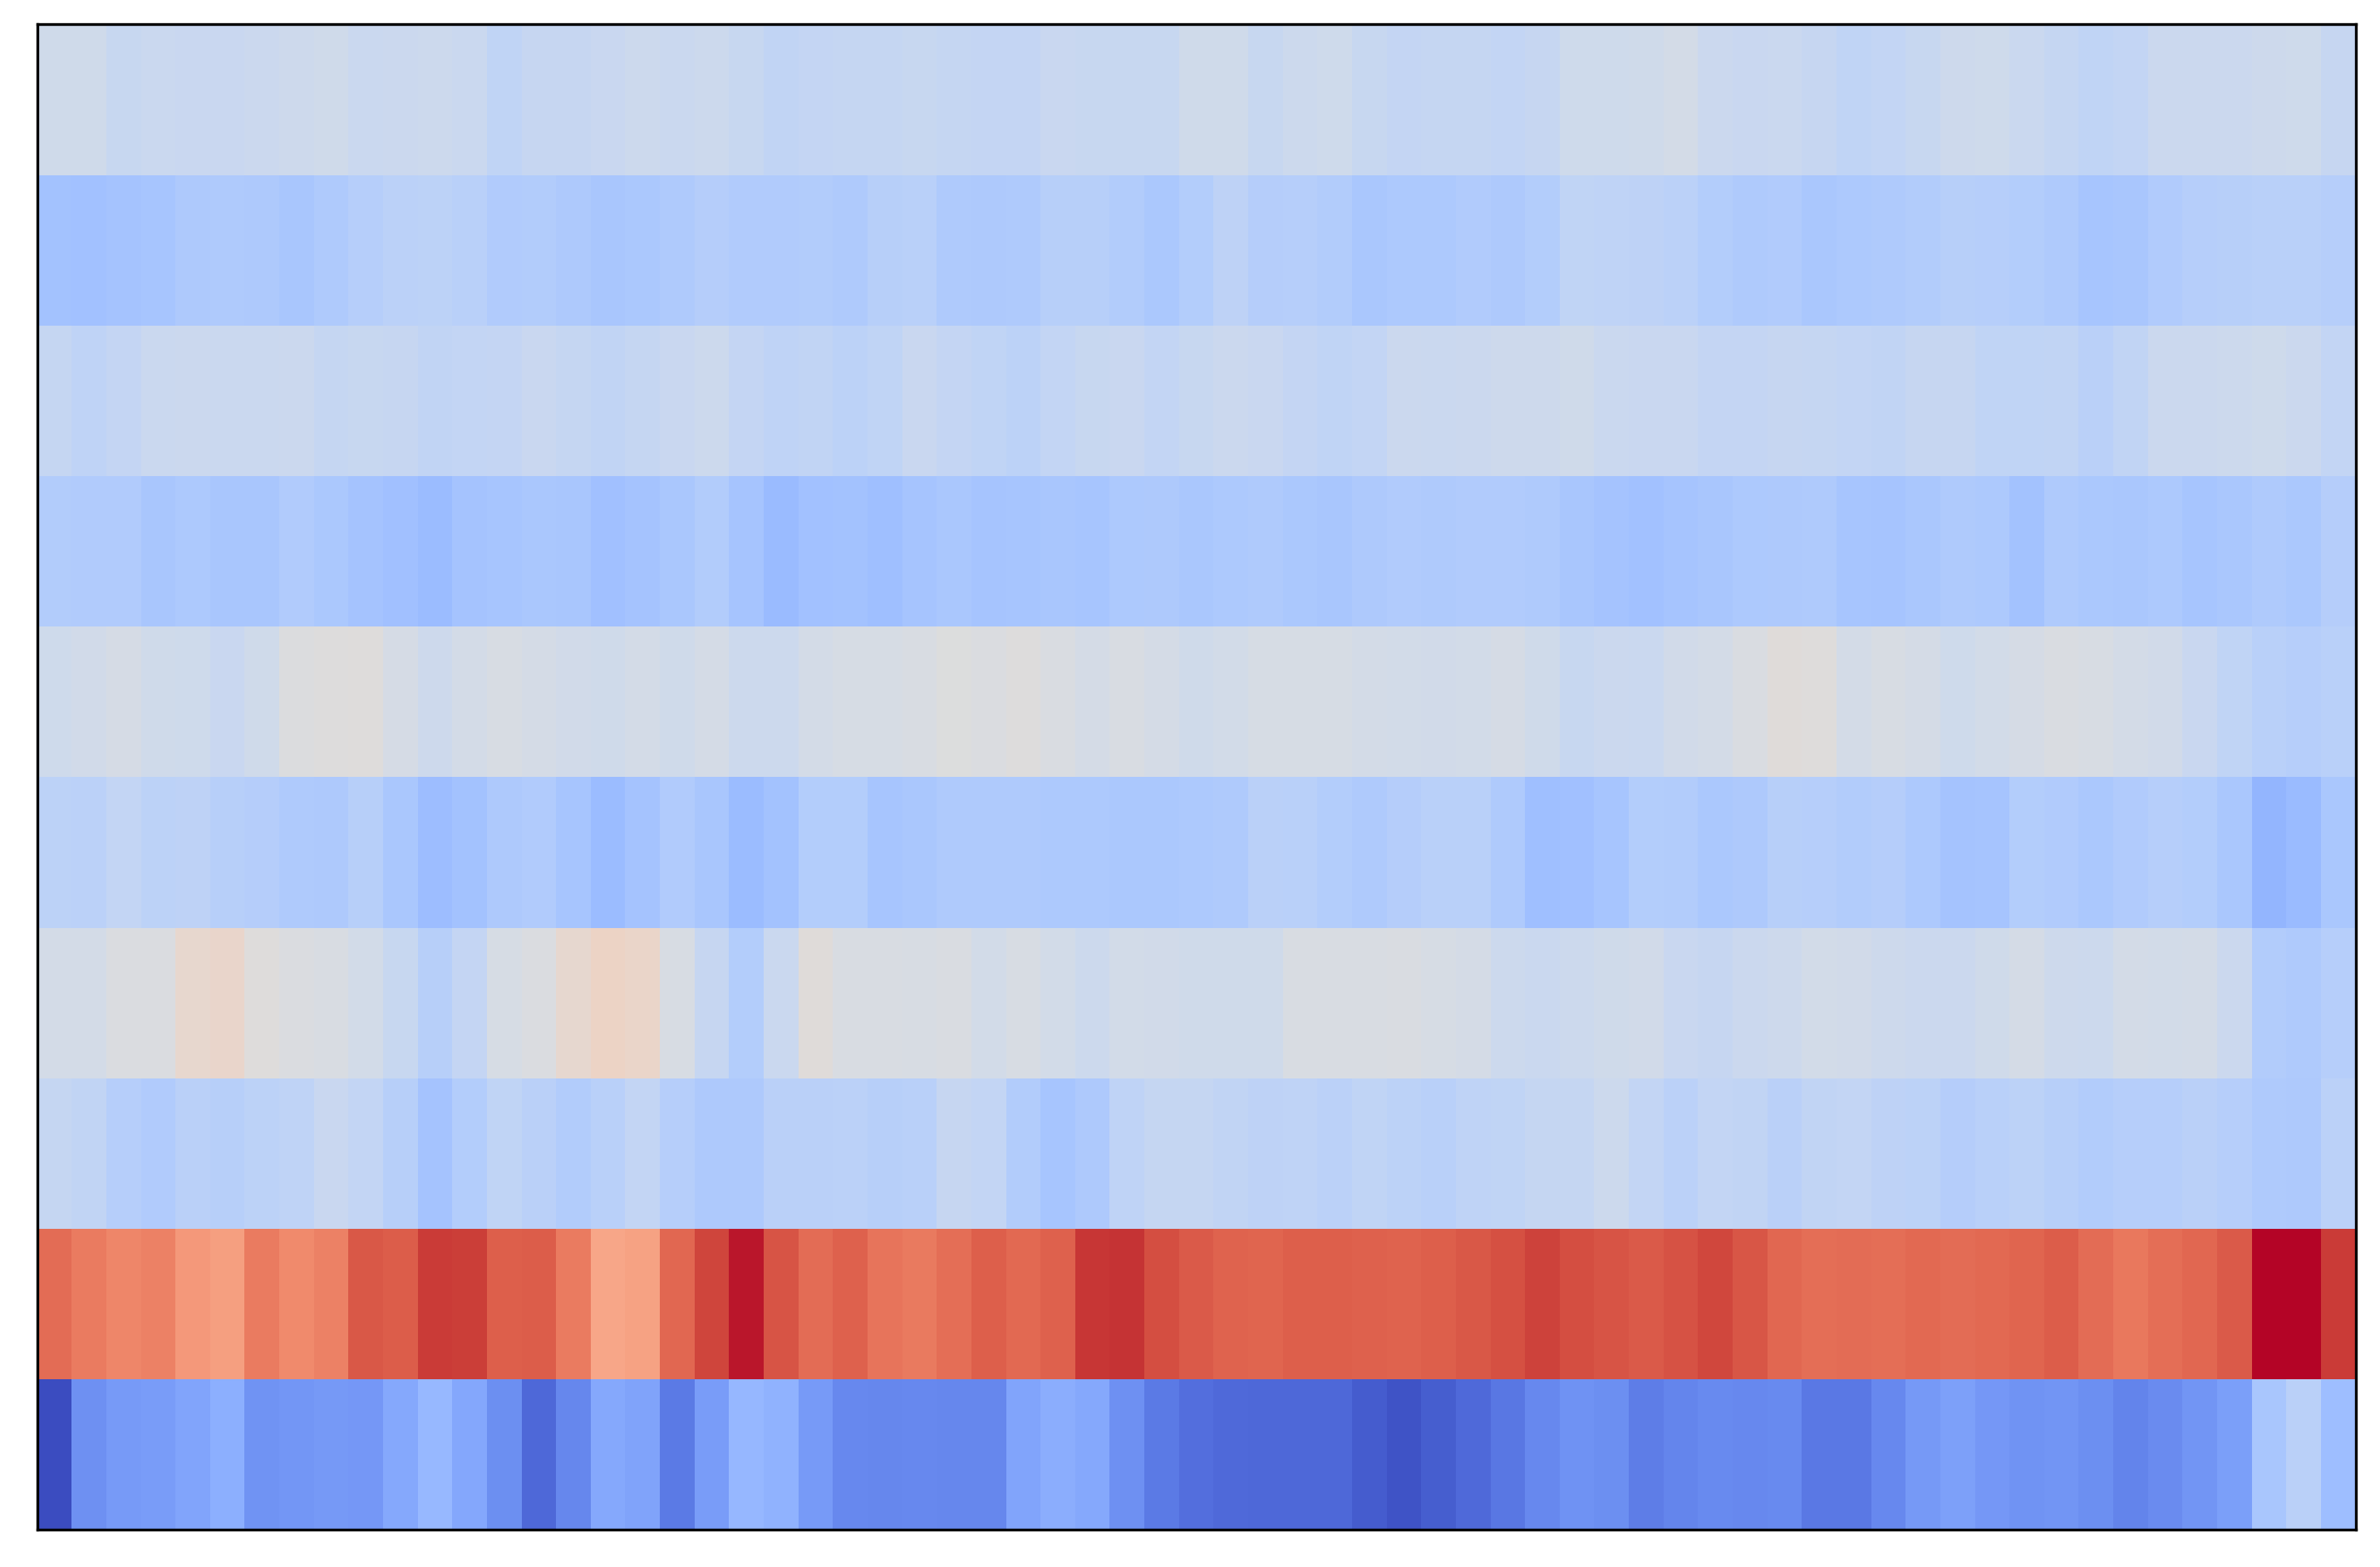

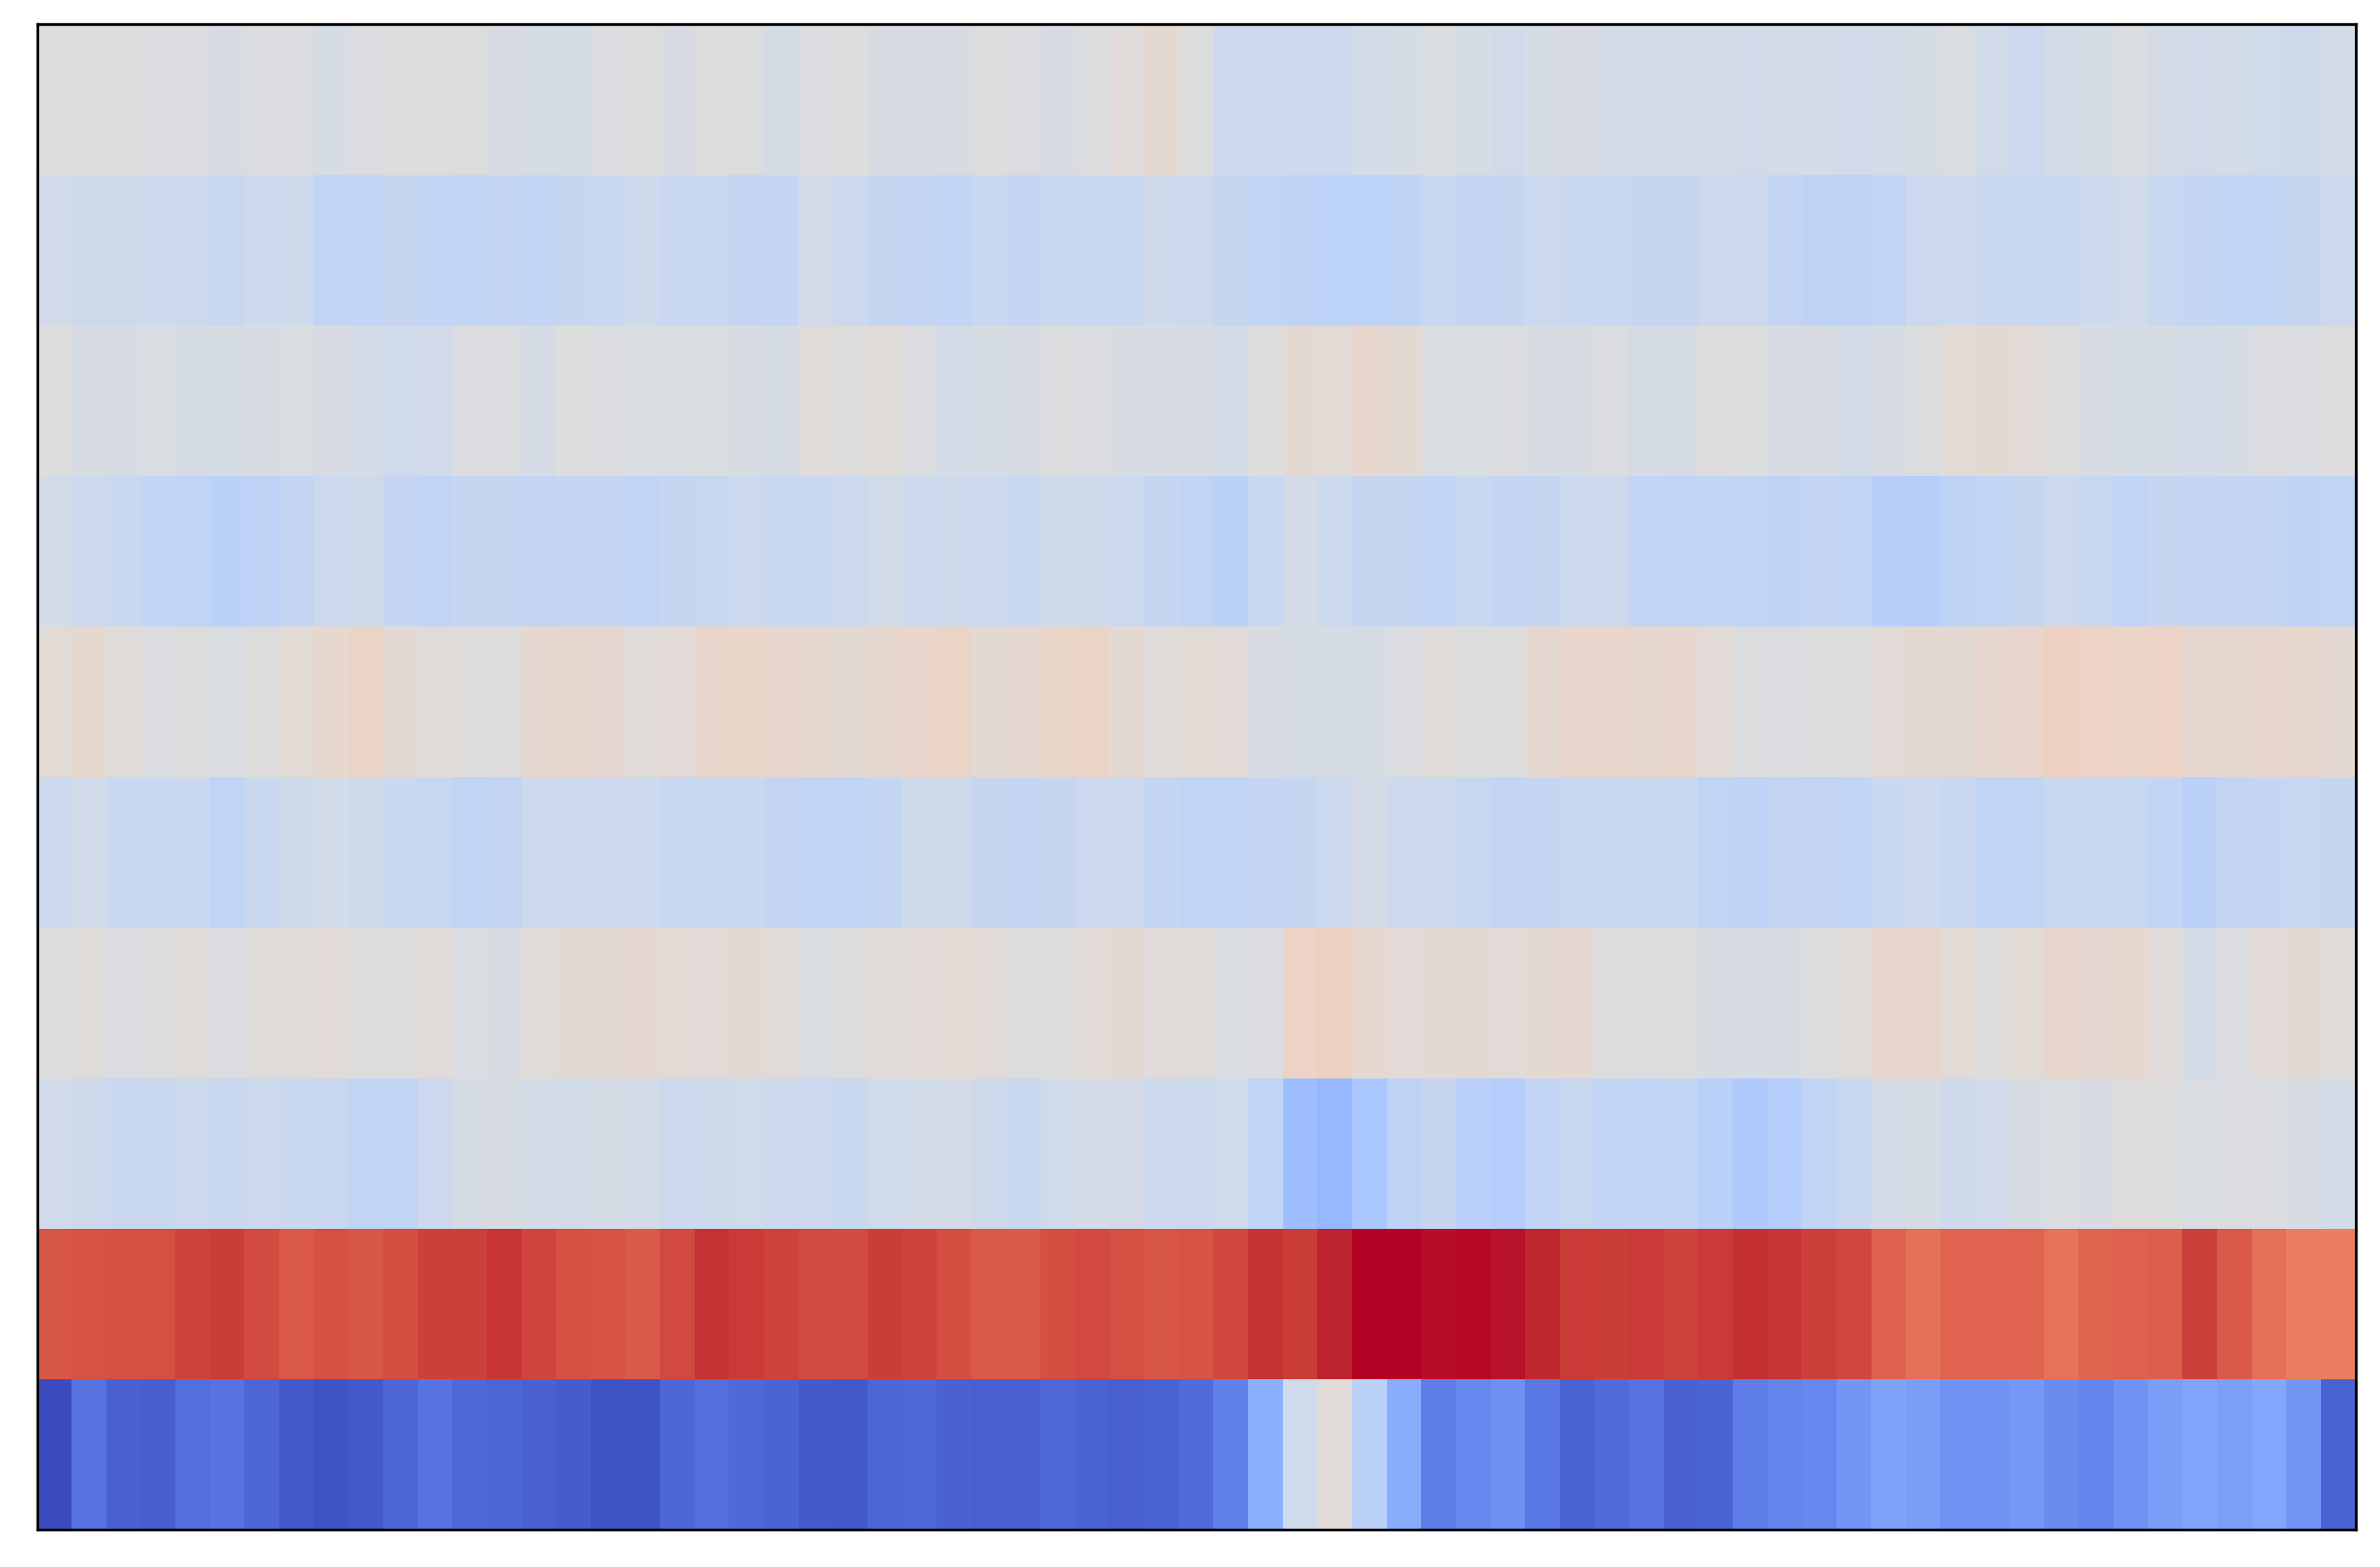

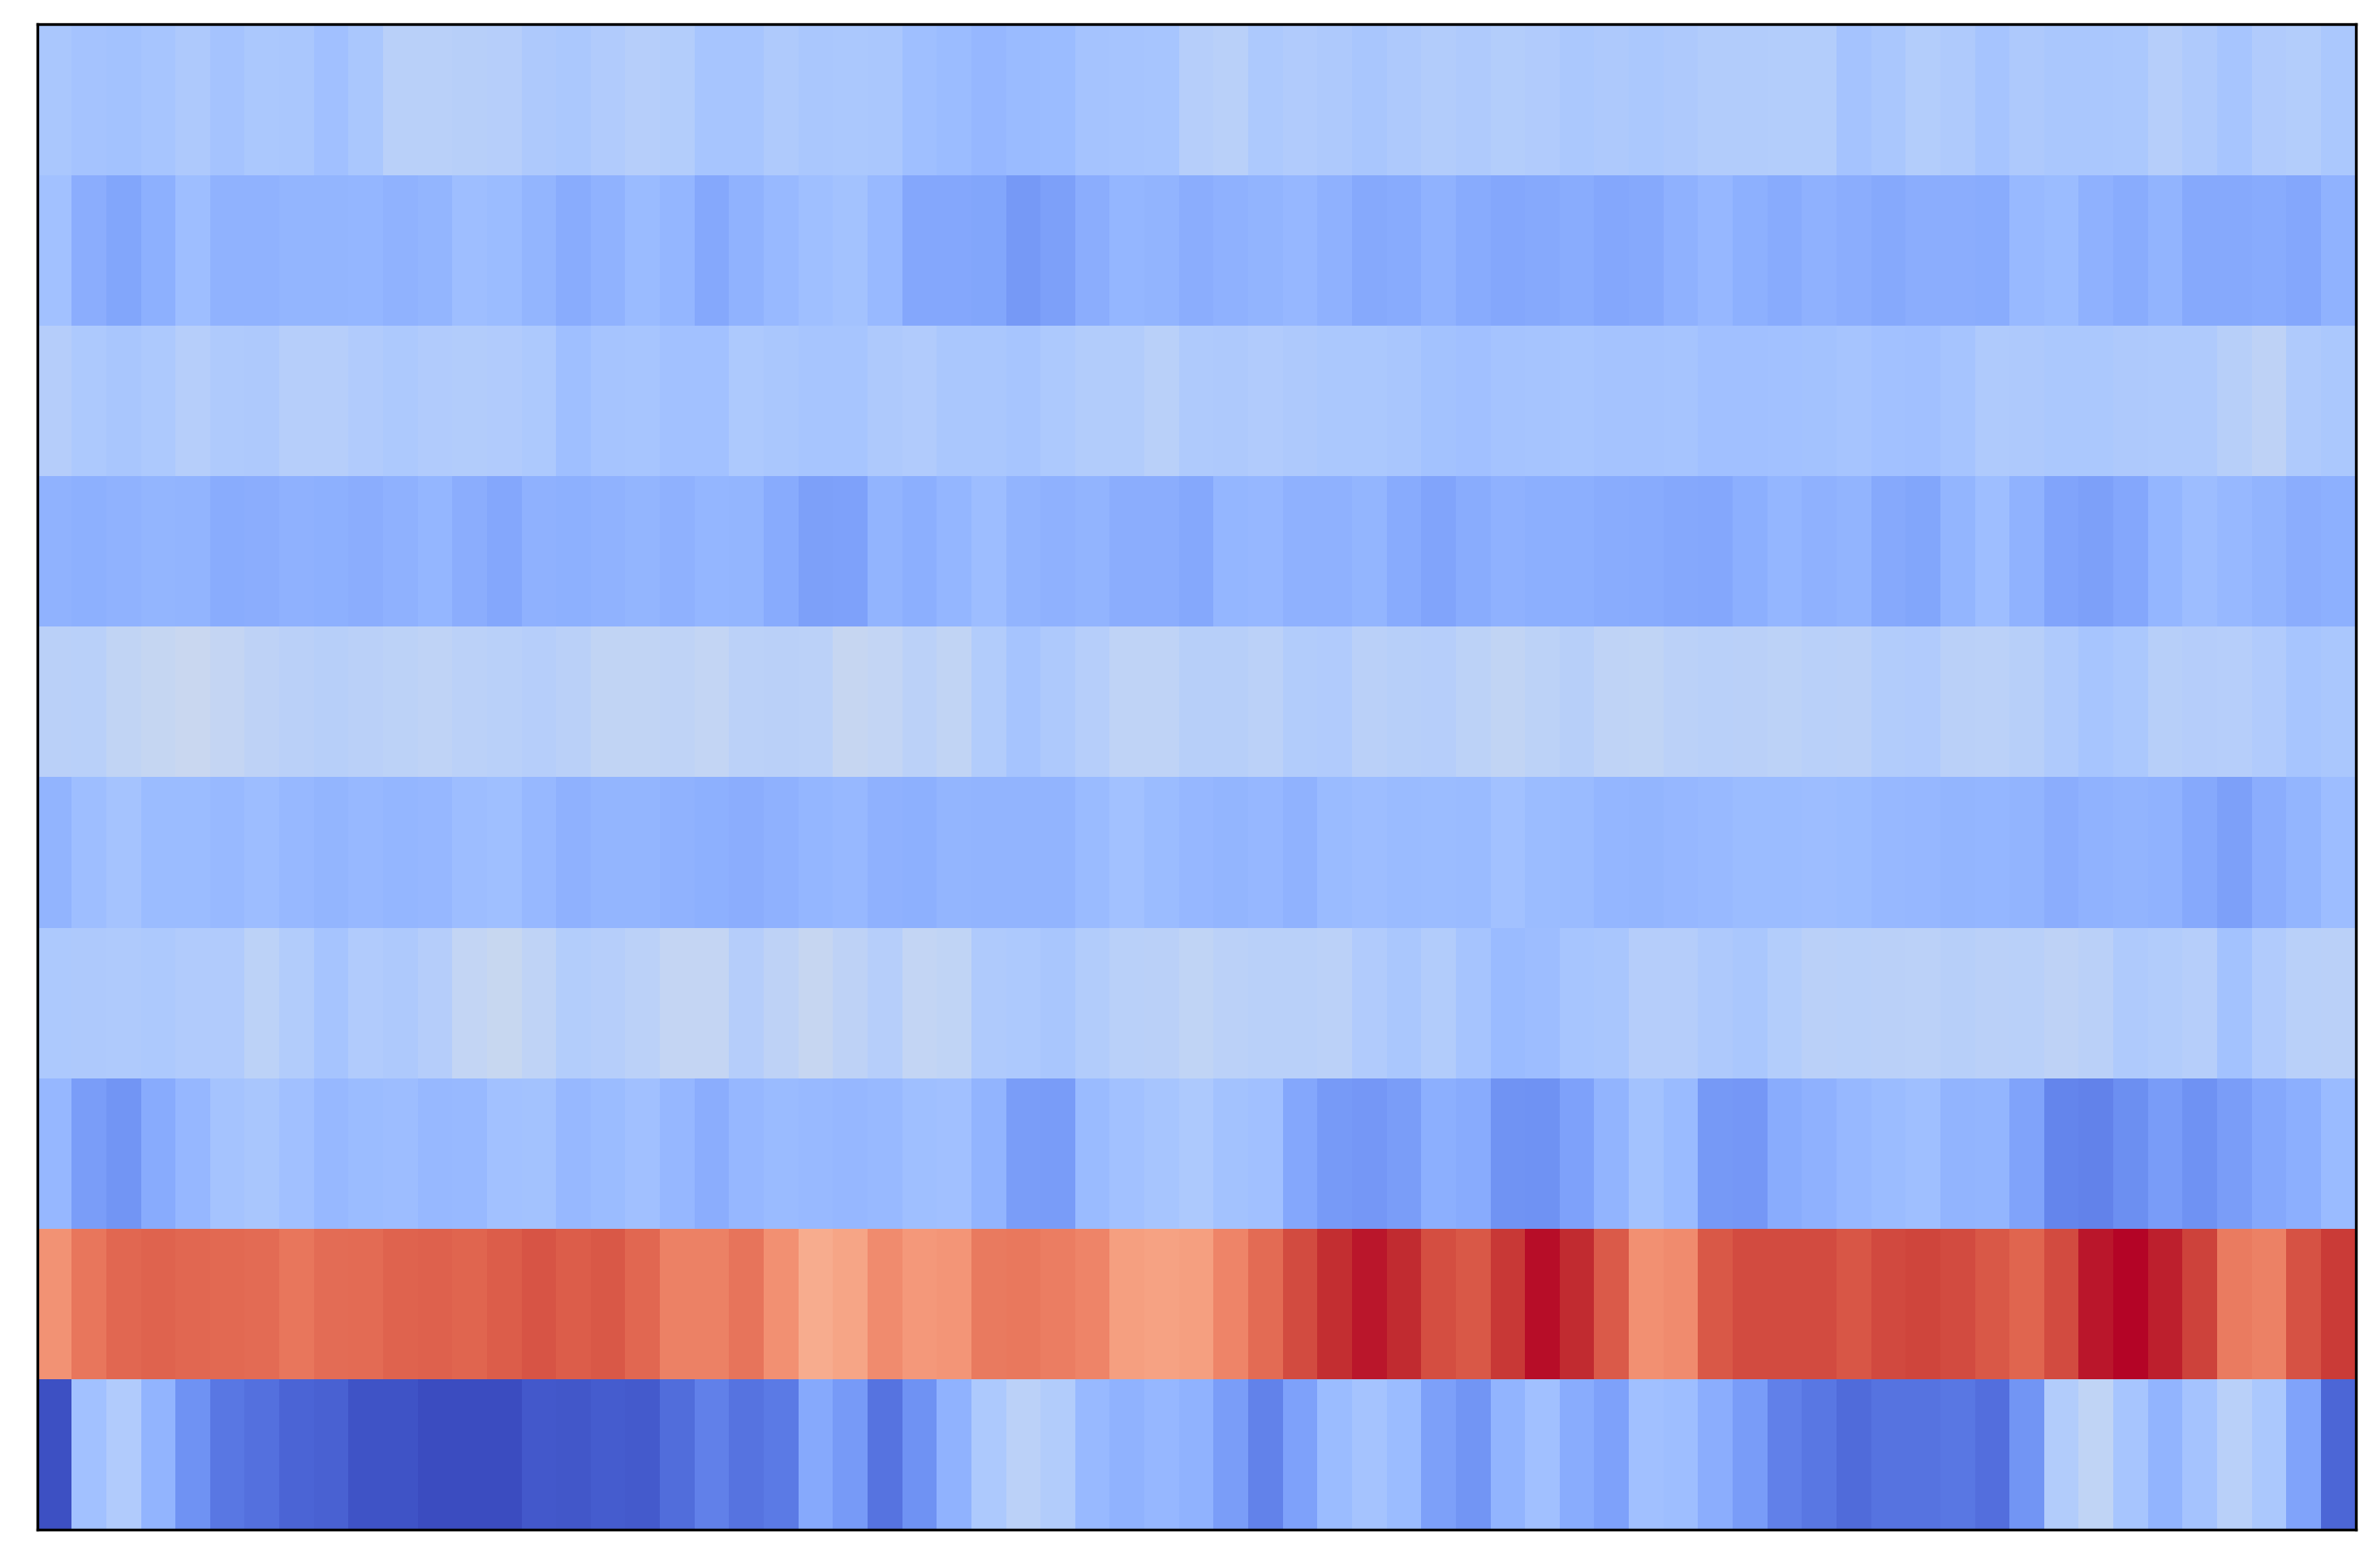

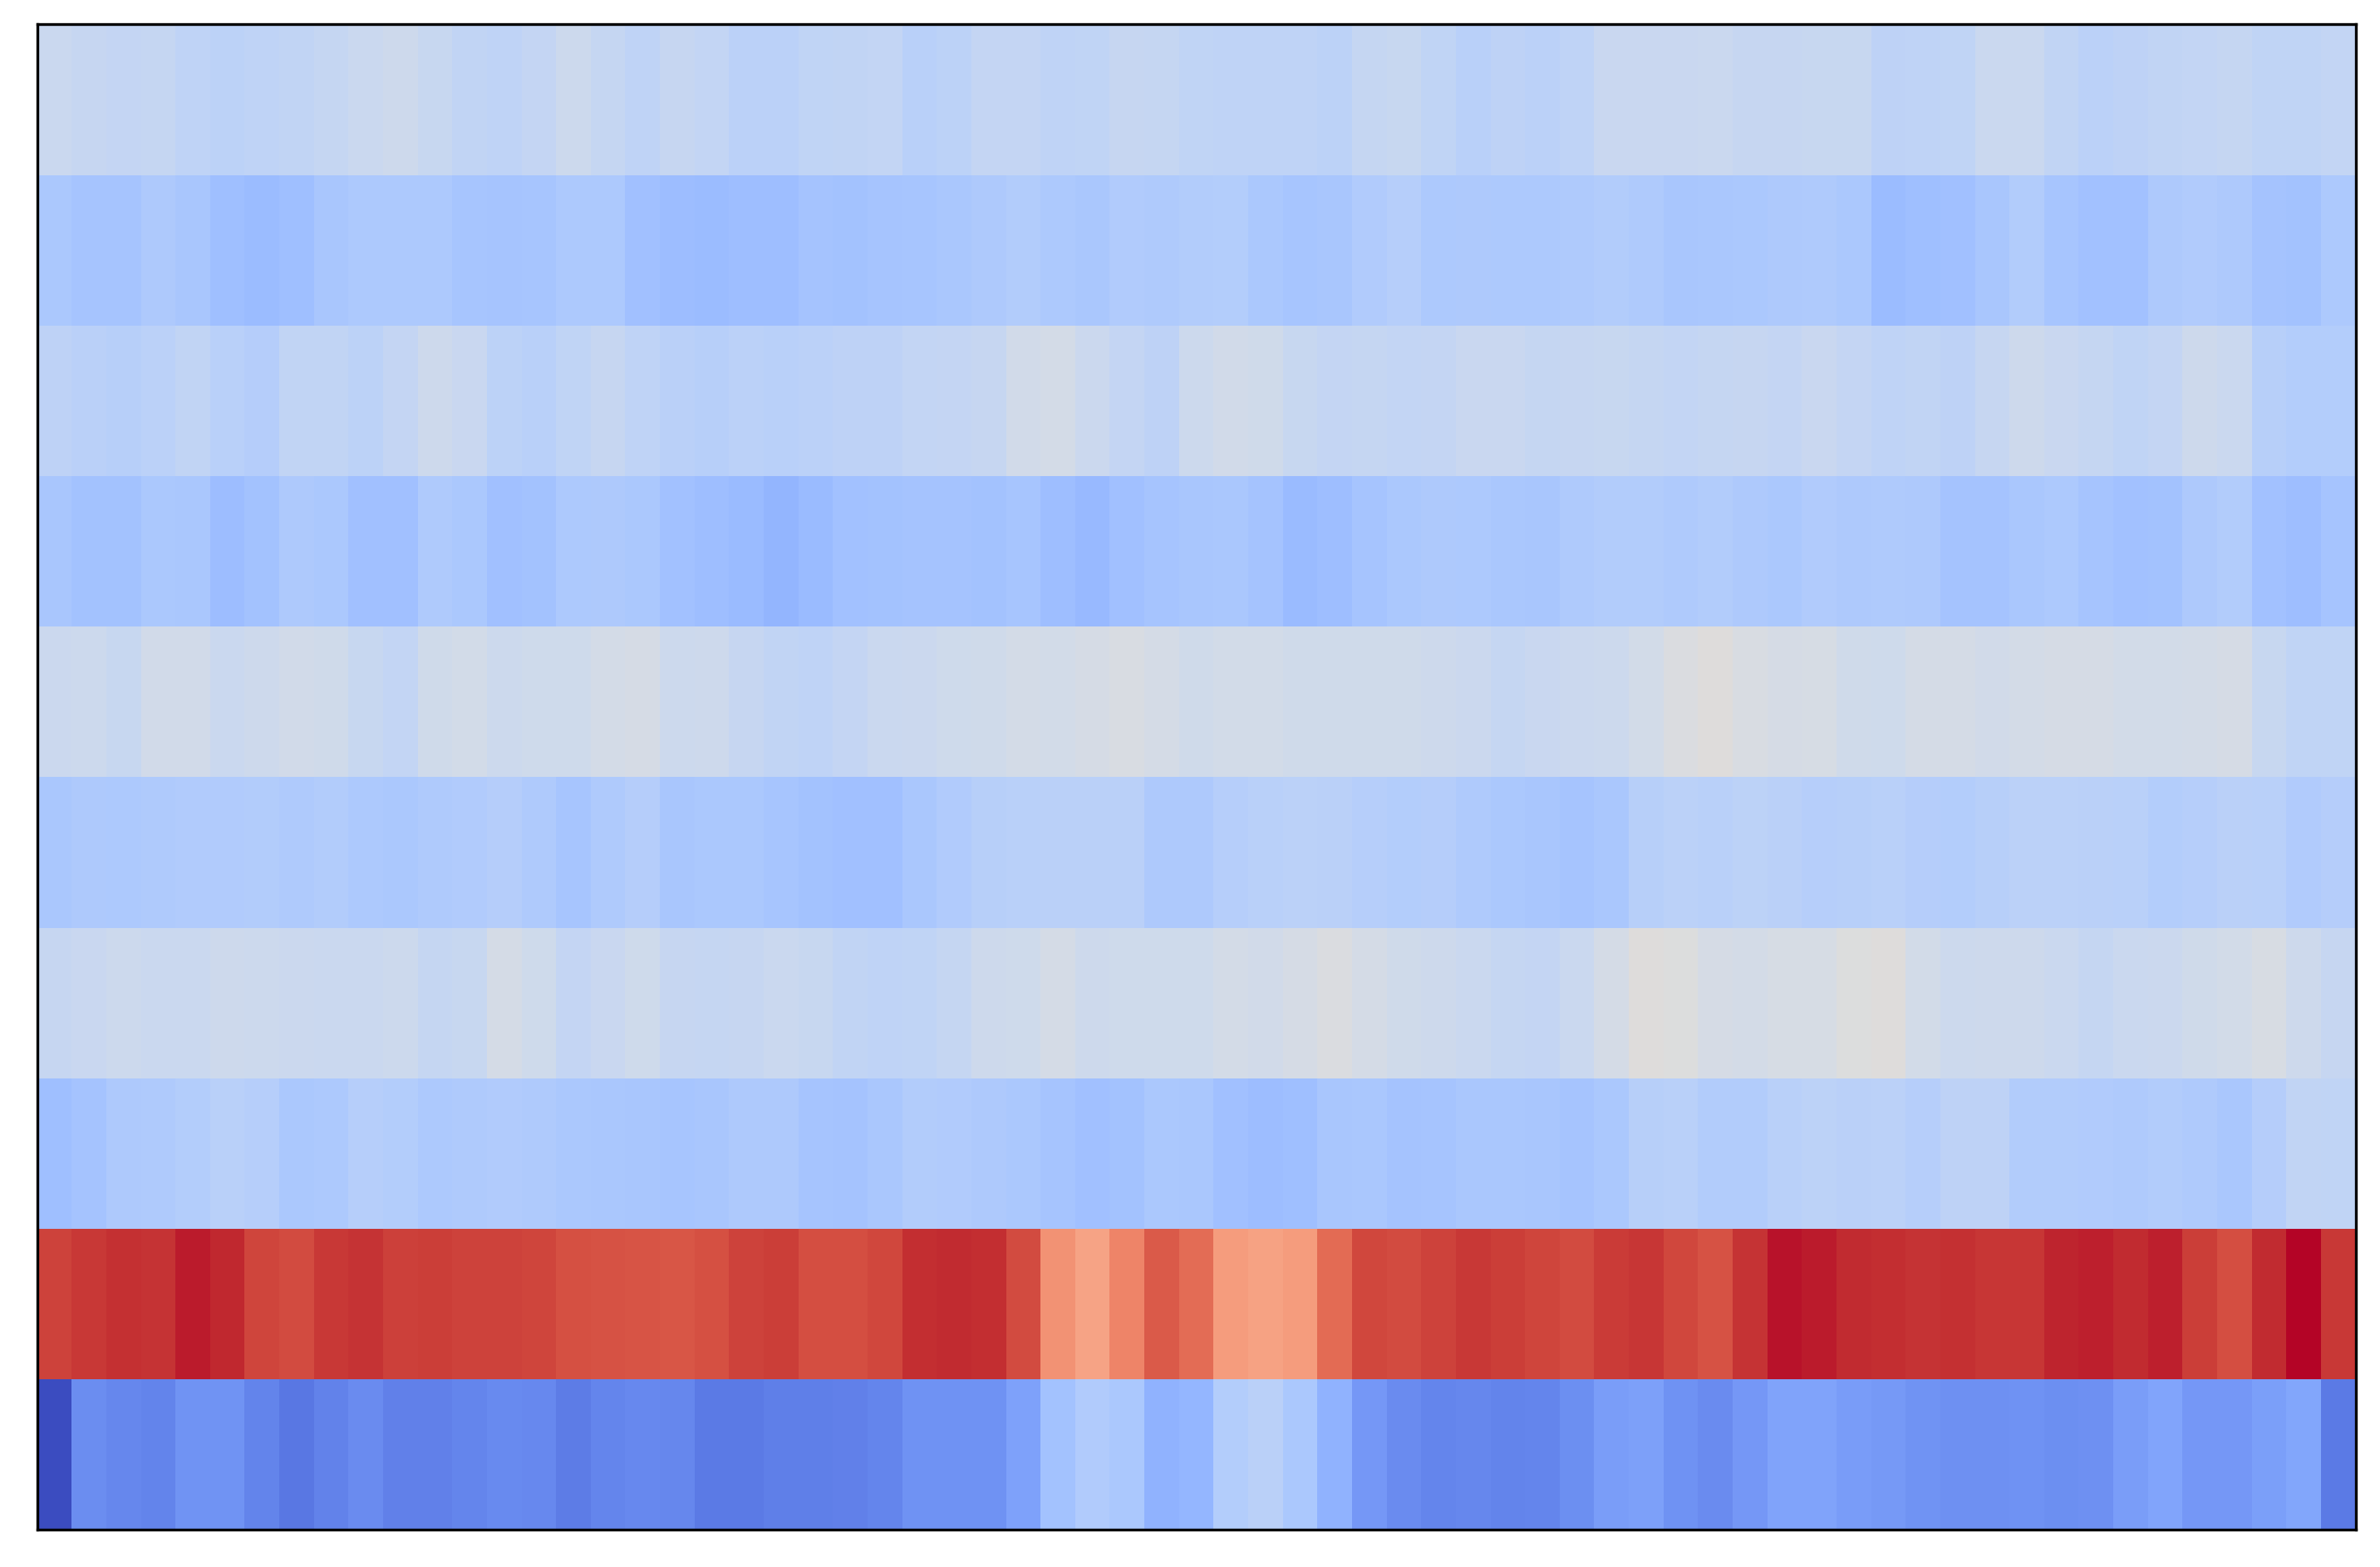

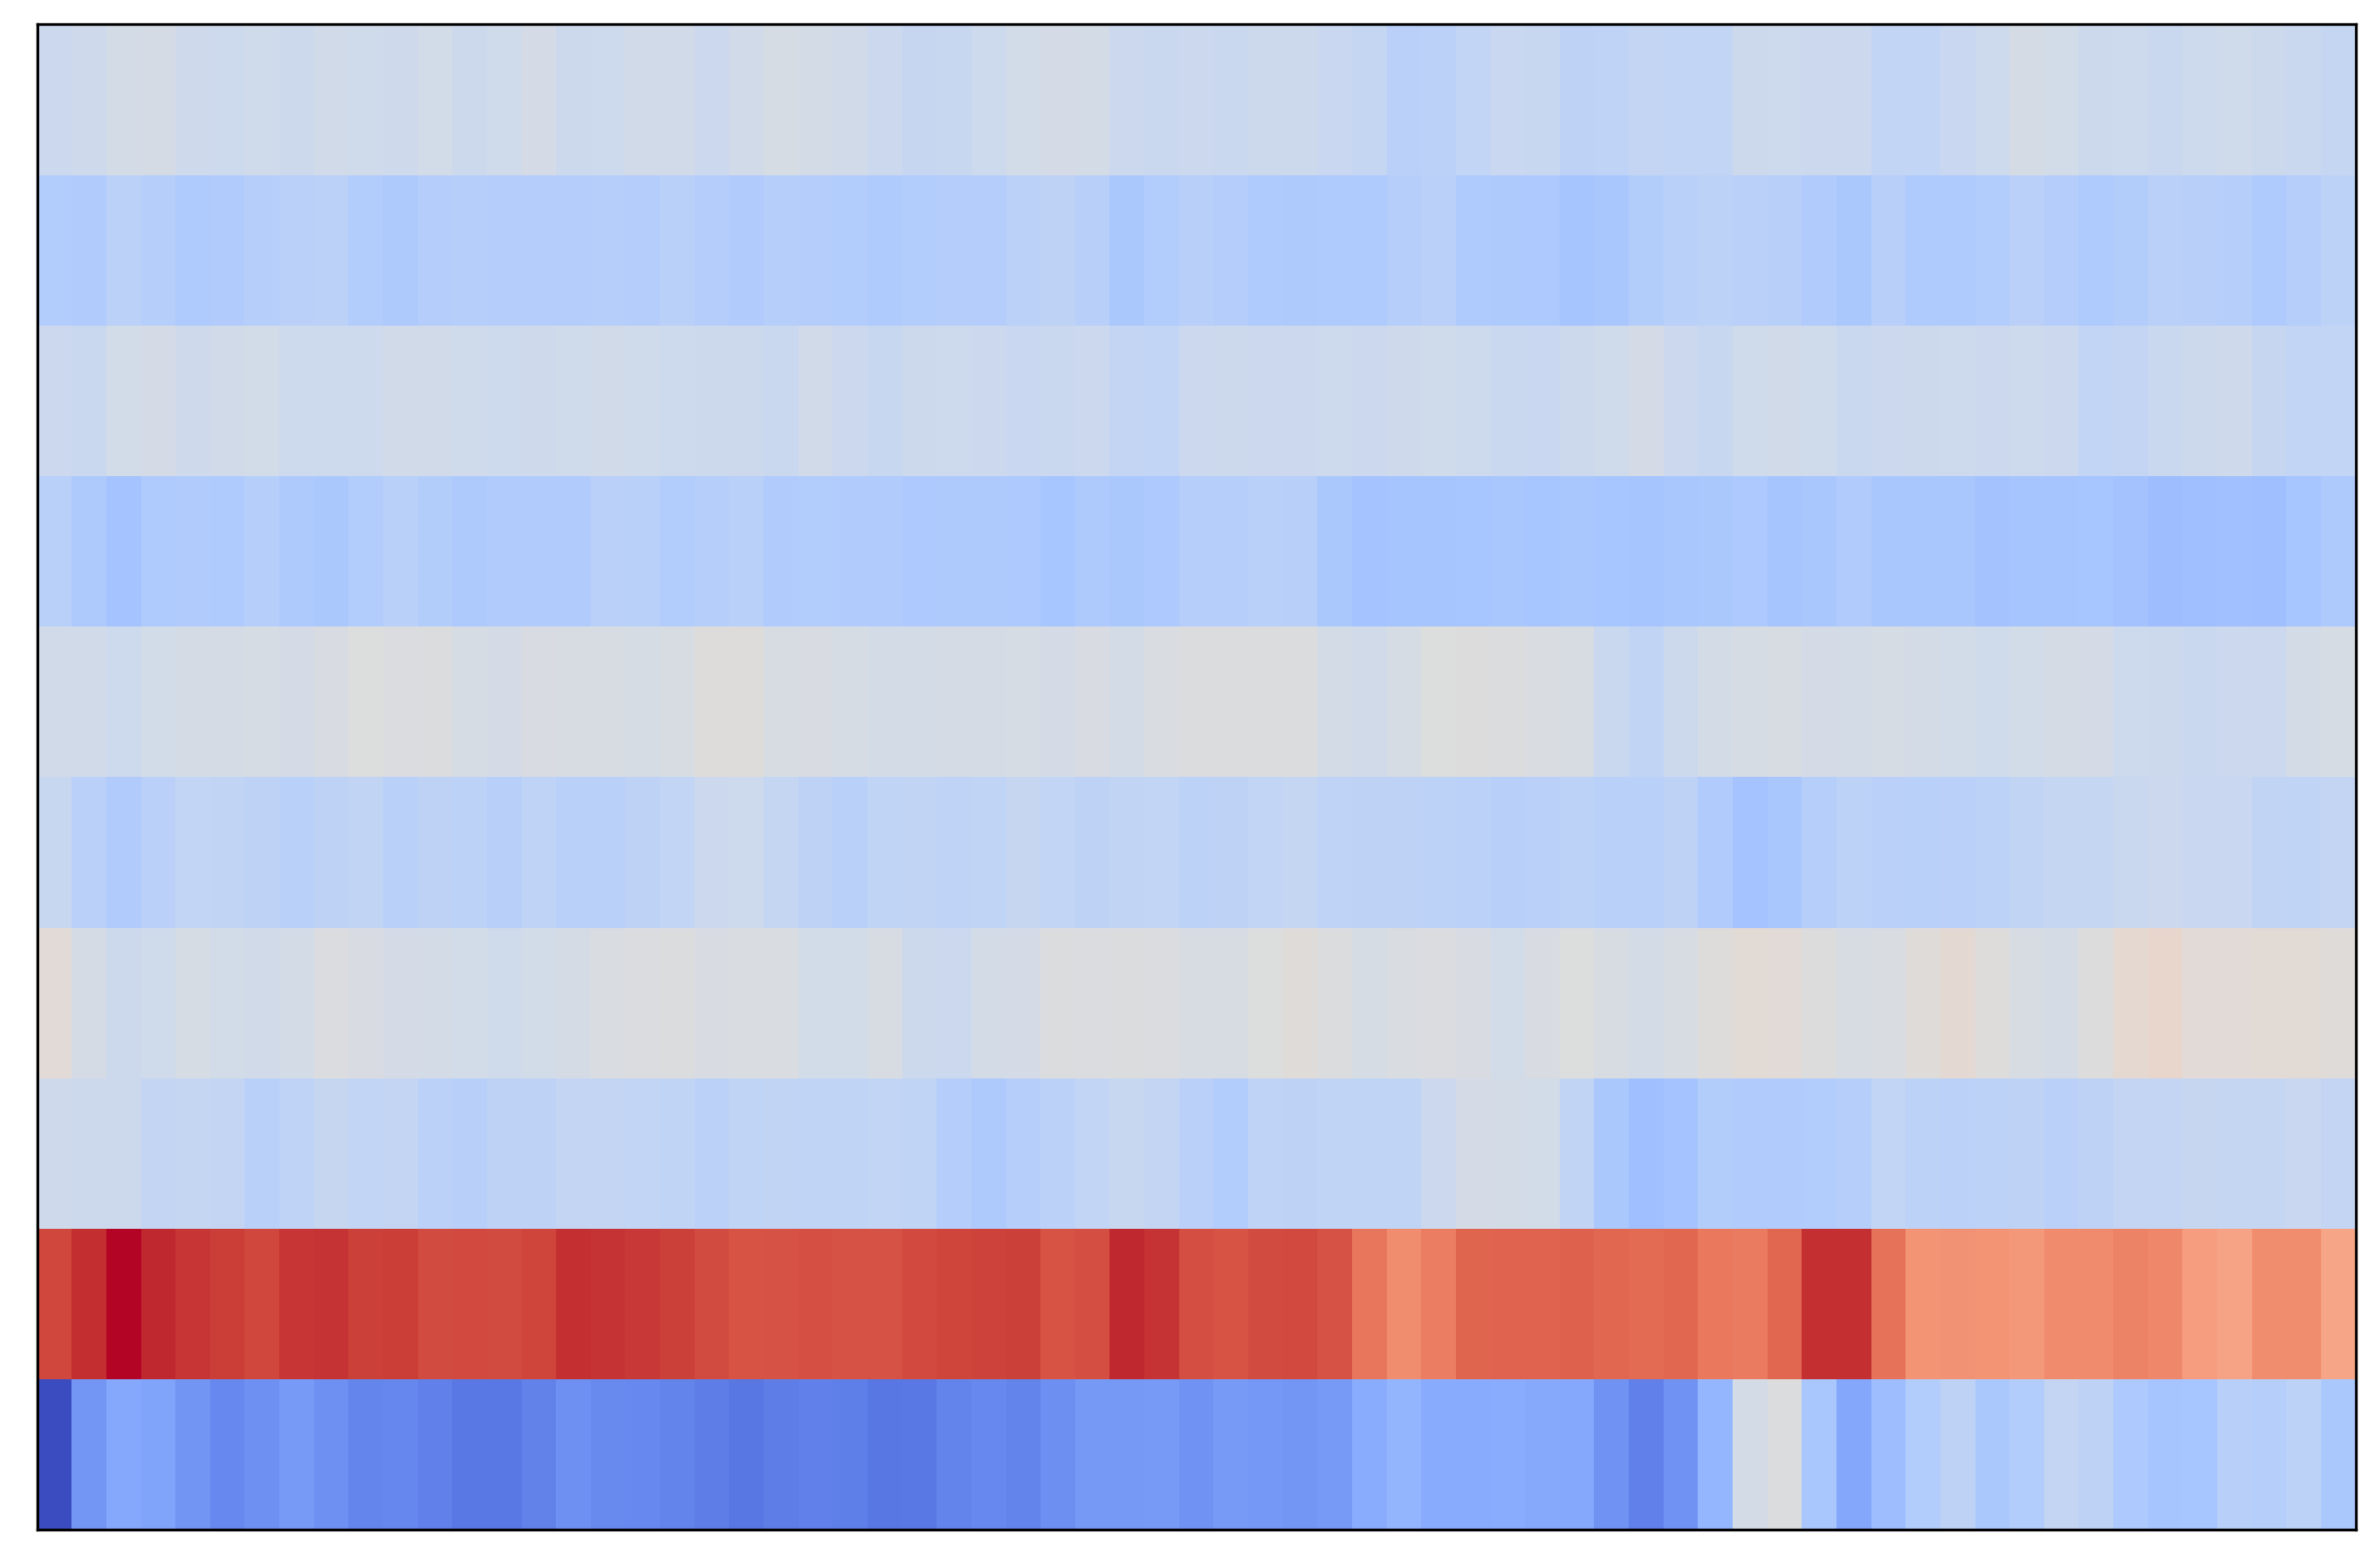

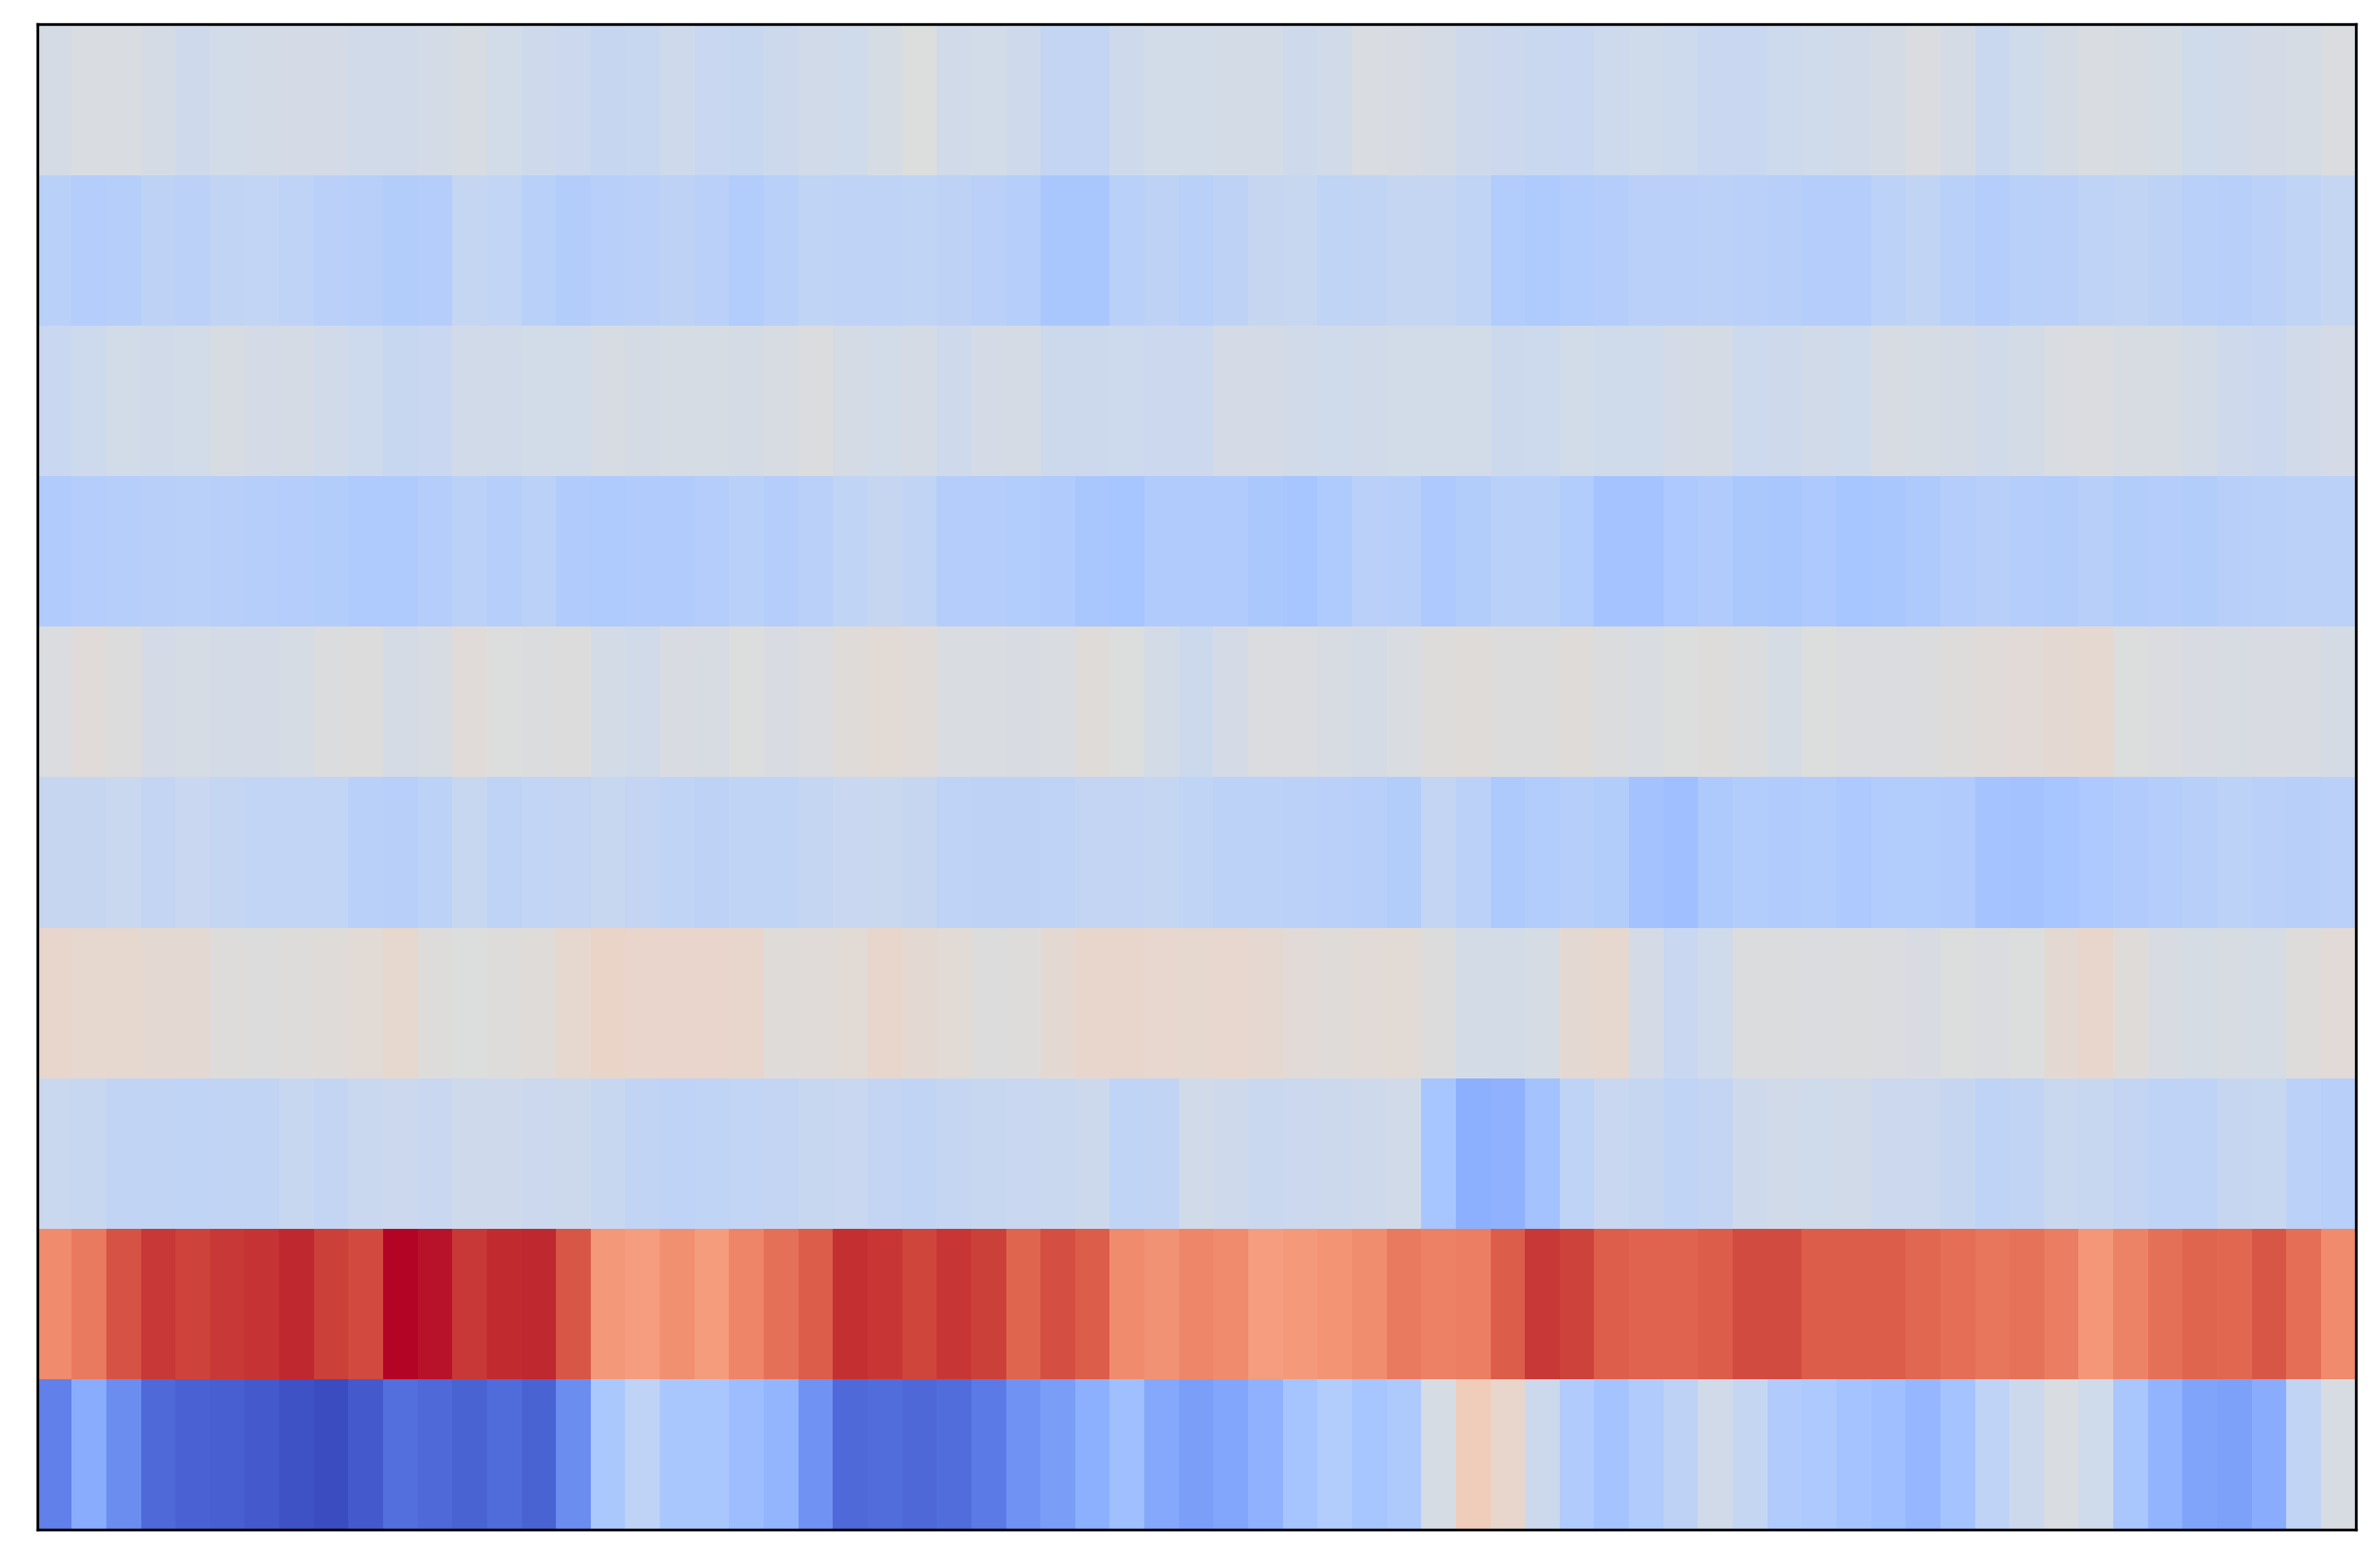

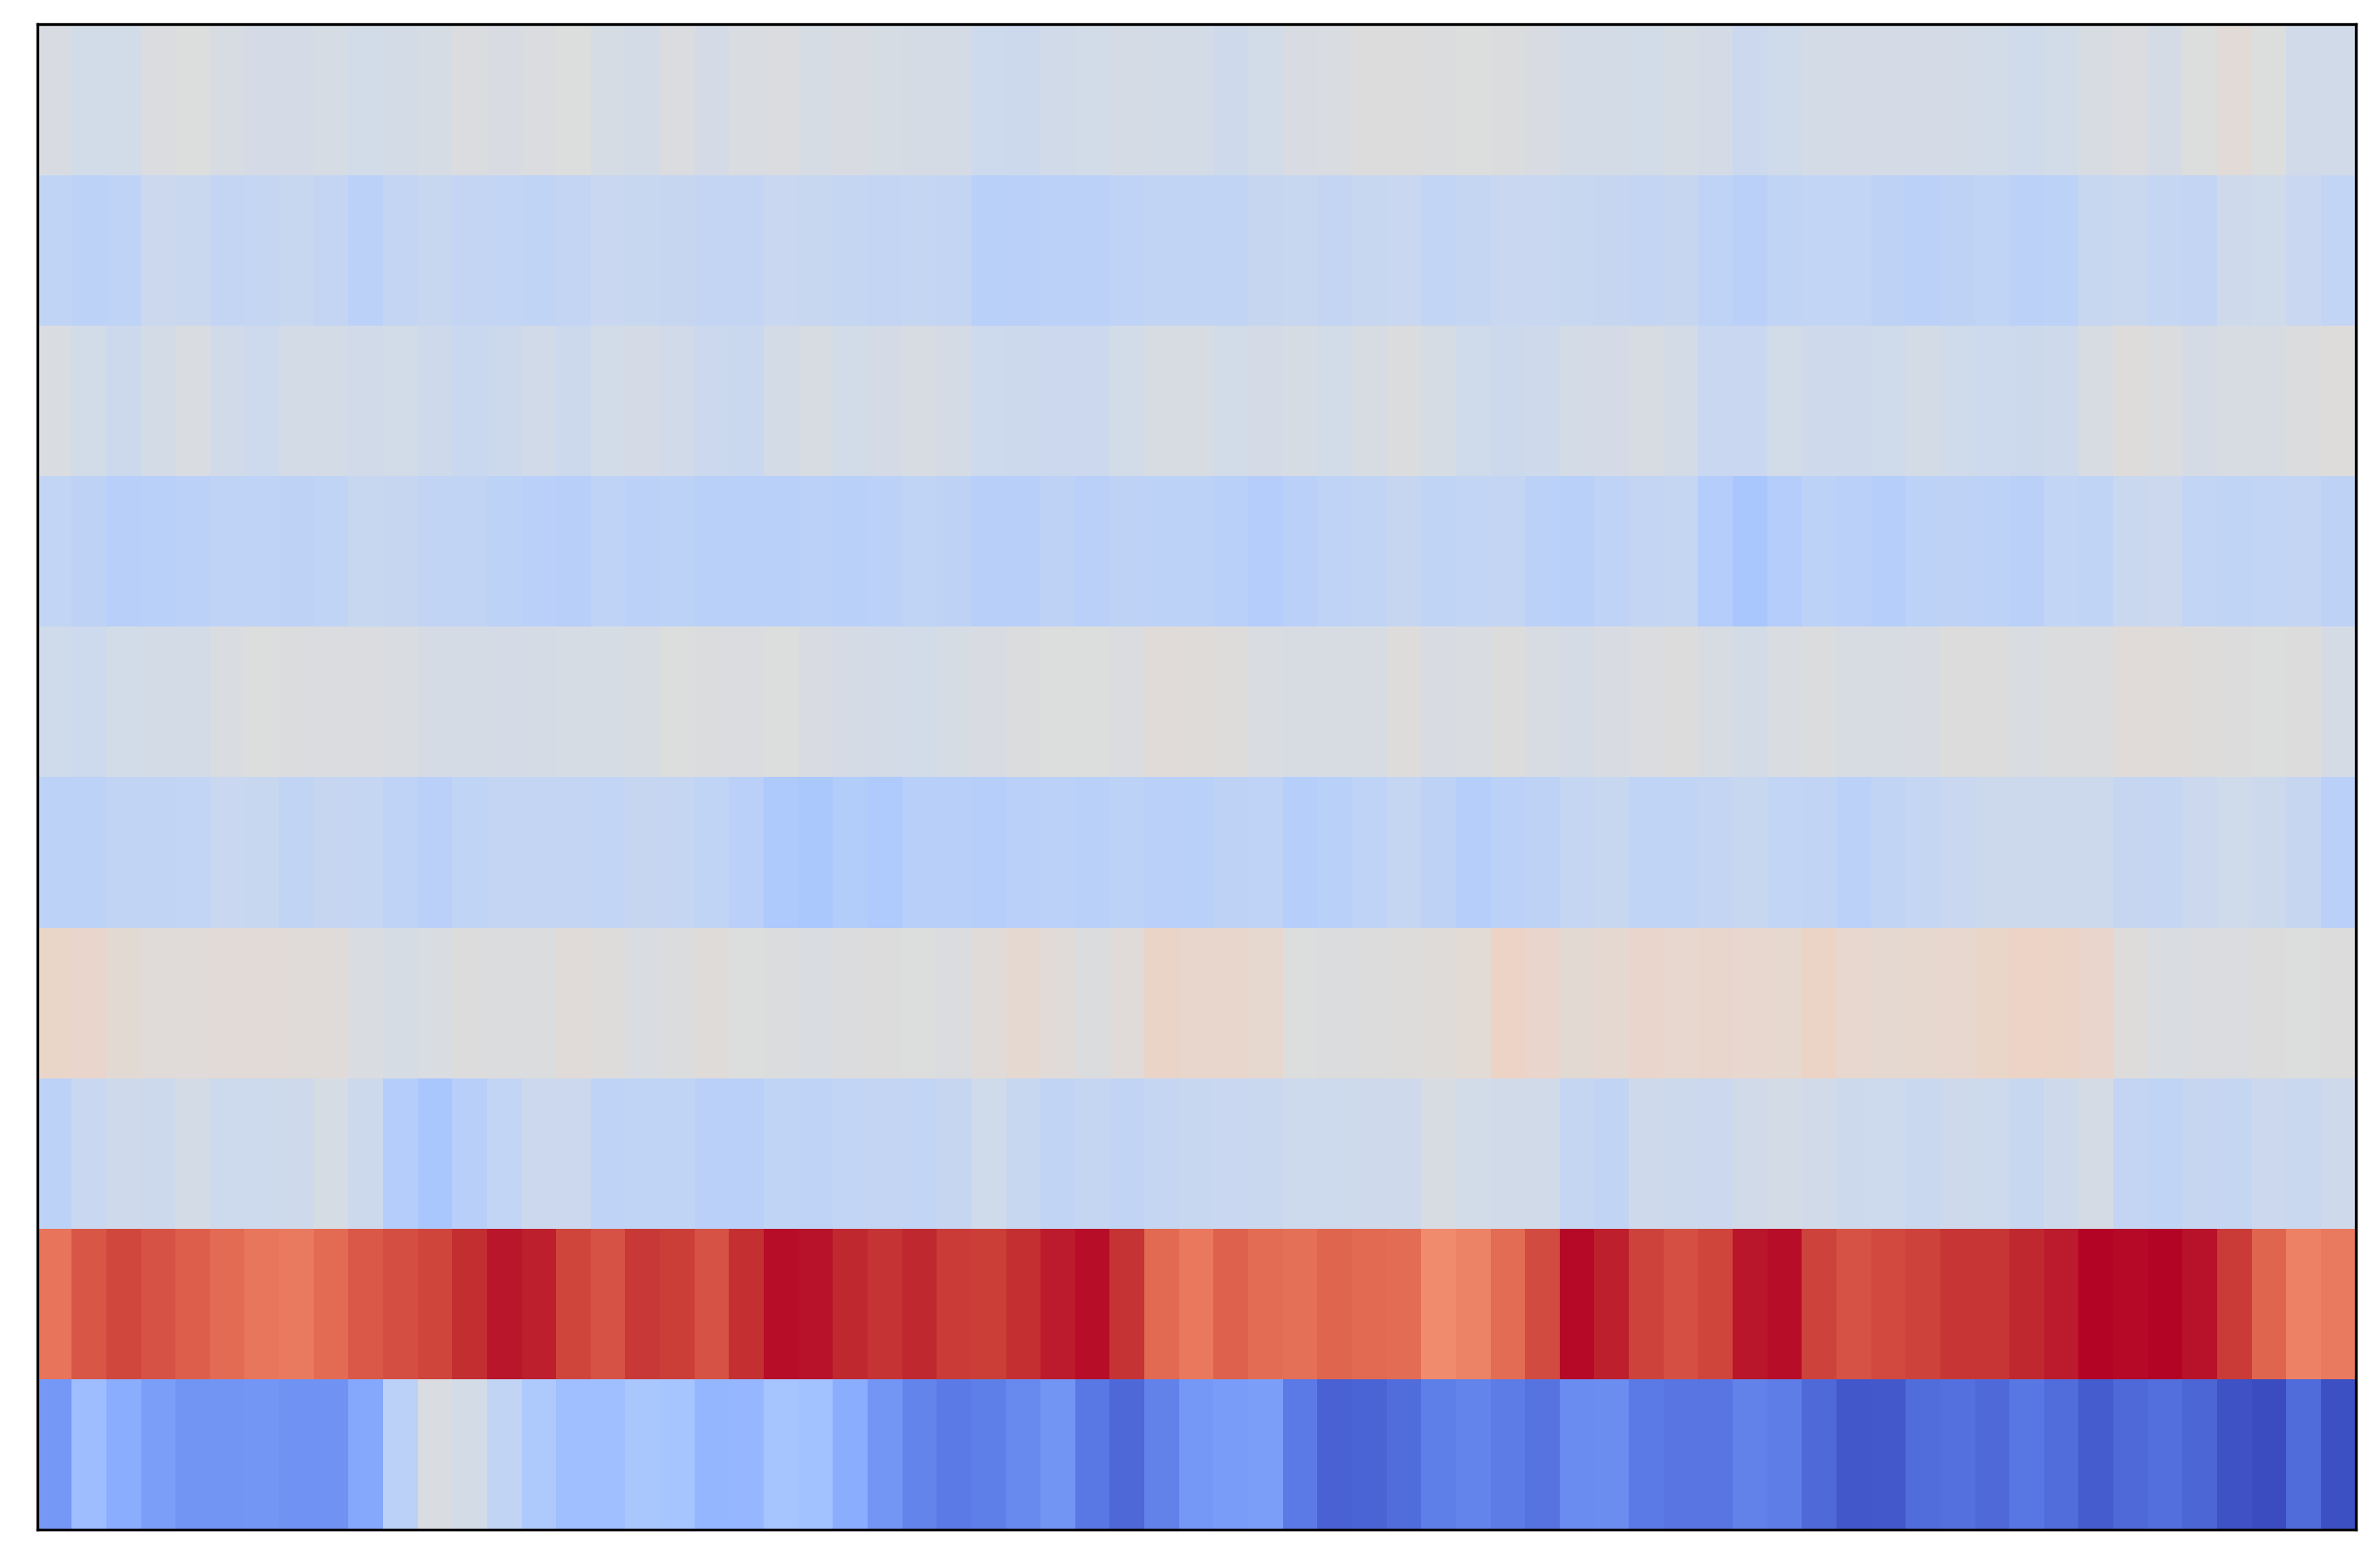

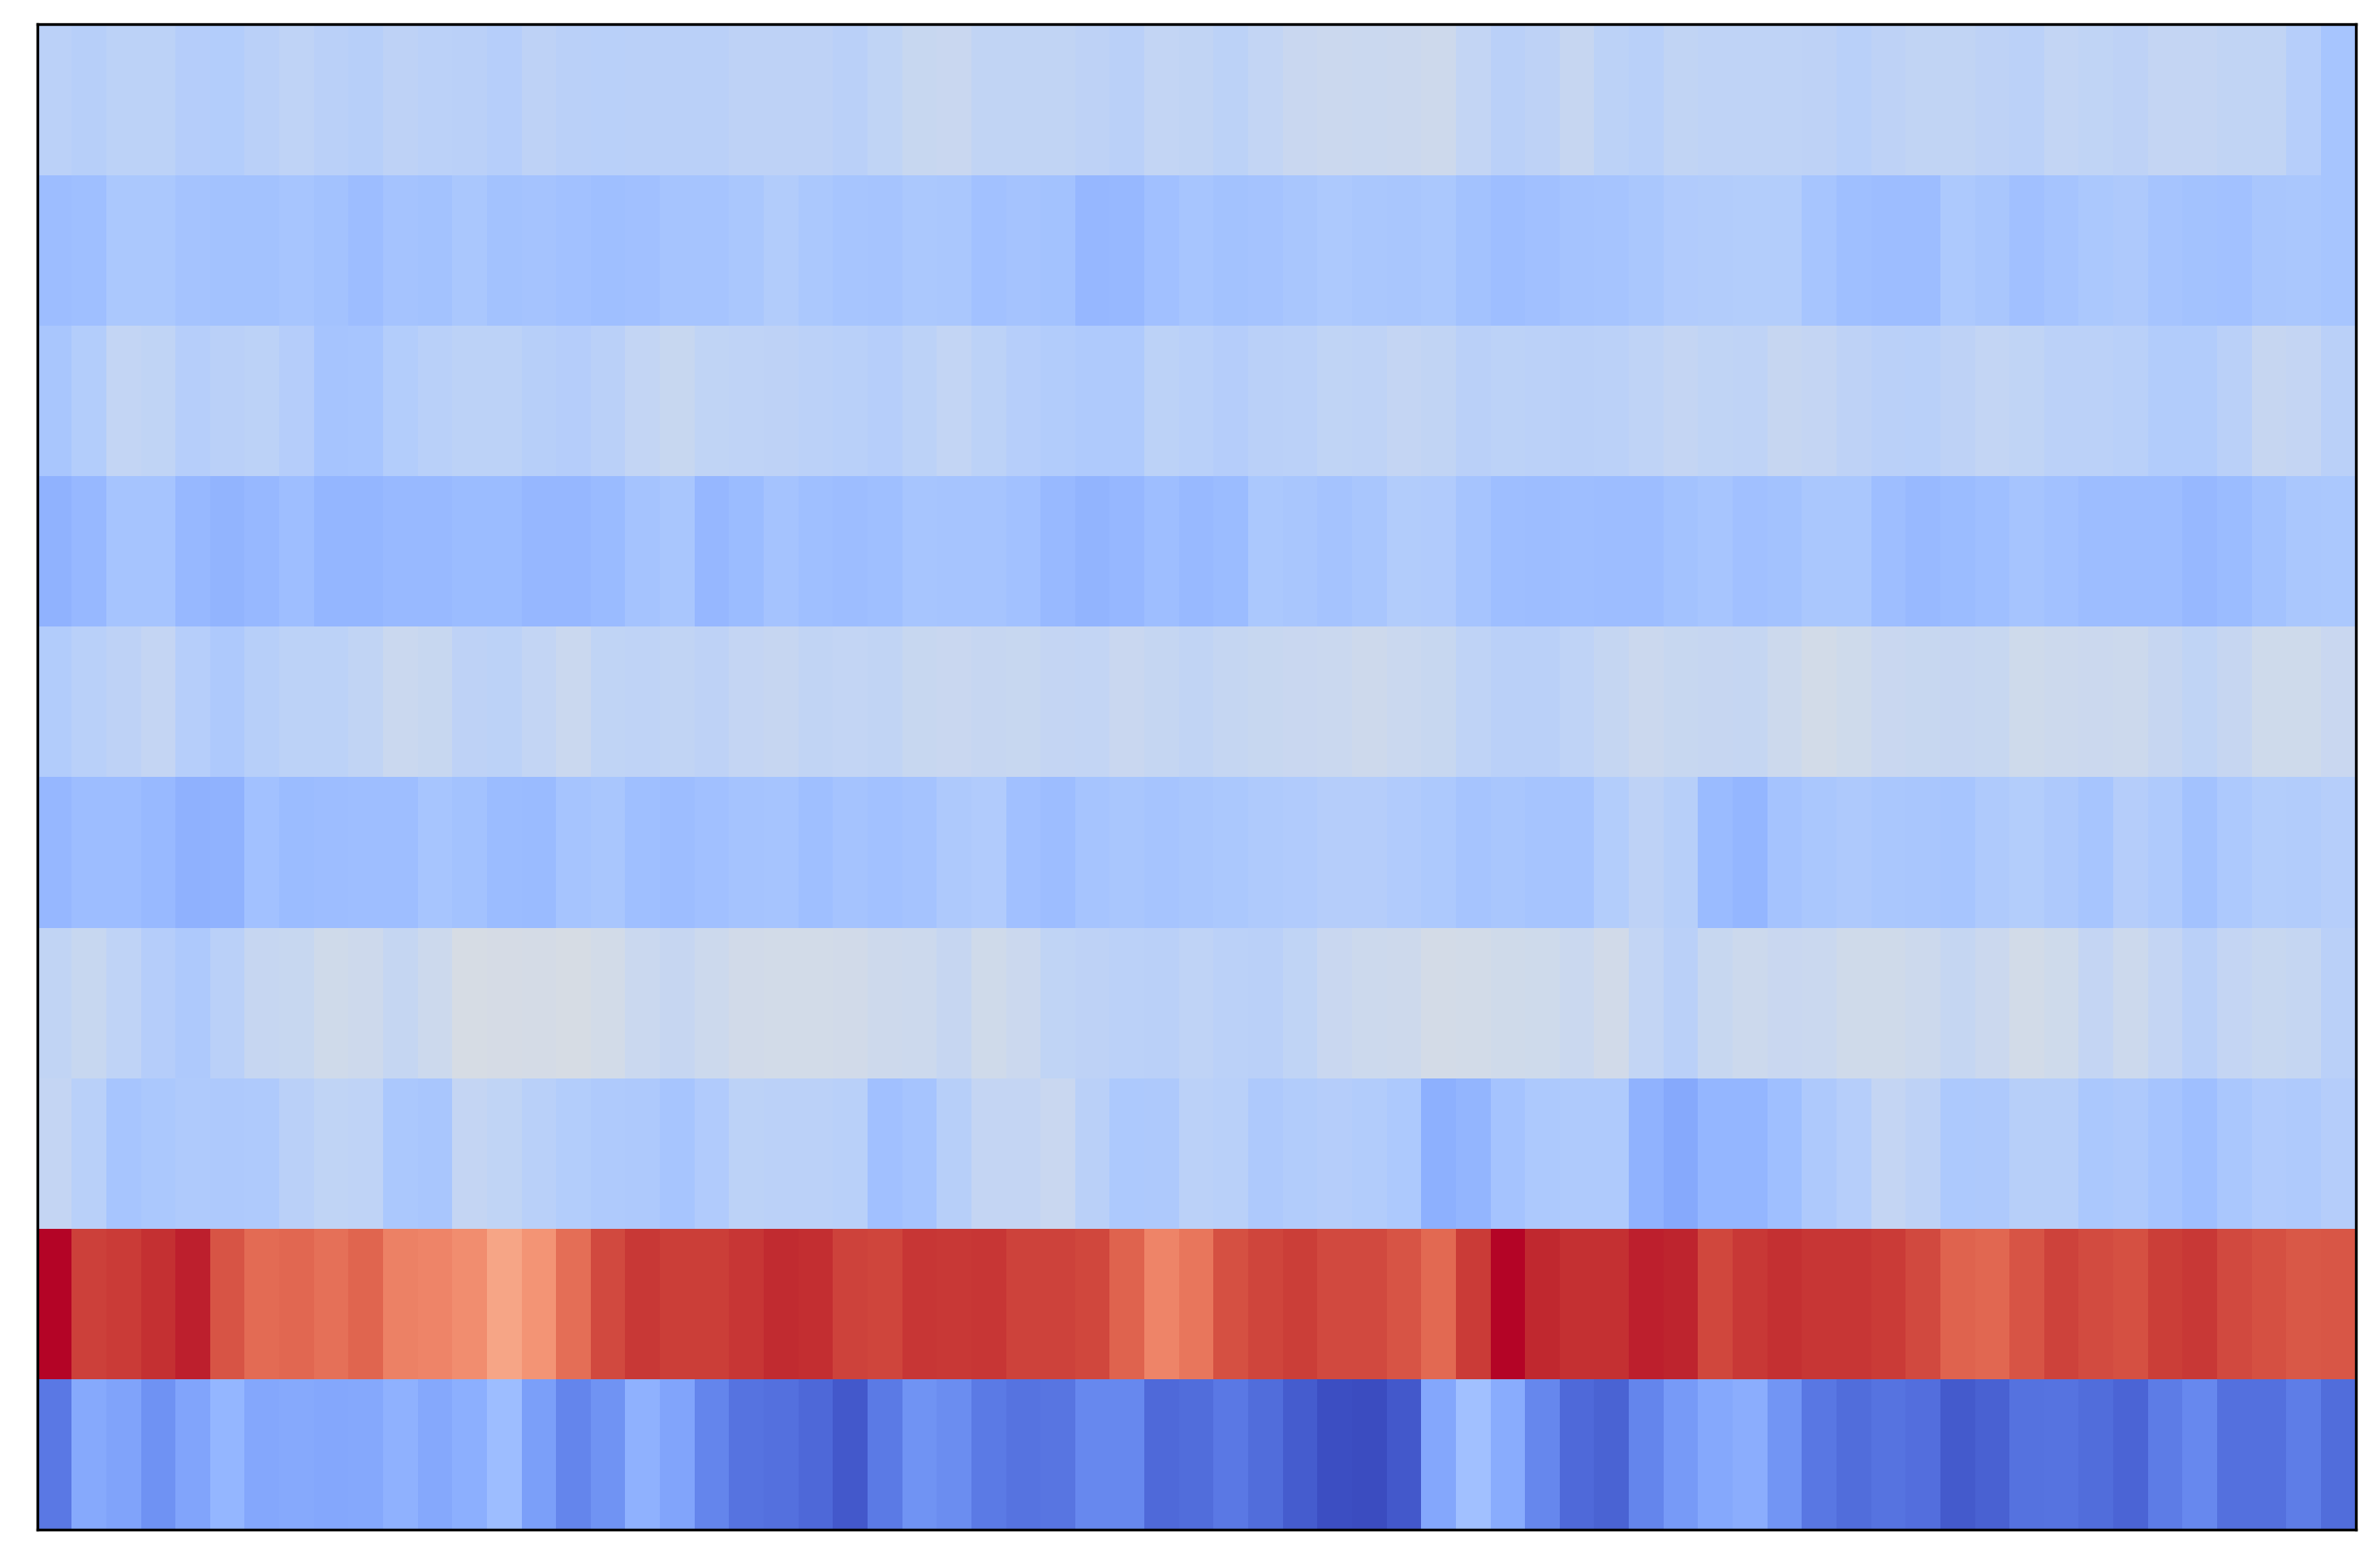

In [75]:
audio_data = []



for categories in CATEGORIES:
    folder=os.path.join(audio_dir,categories)
    label=CATEGORIES.index(categories)
    #print(folder)
    print(label)
    
    
    
    for audios in os.listdir(folder):
        audio_files = os.path.join(folder,audios)
        
        # Load Audios
        audio_values, sample_rate = librosa.load(audio_files)
        
        # Normalize the audio files
        norm_values = audio_values / np.max(np.abs(audio_values))
        
        # mfcc feature extraction
        mfcc = librosa.feature.mfcc(y=norm_values, sr=sample_rate, n_mfcc=10)
        
        #Add audio feature and label
        audio_data.append([mfcc, label])
        
        # create a file to save our results in
        #outputFile = resultsDirectory + "/" + os.path.splitext(audios)[0] + ".jpg"
        #skimage.io.imsave(out, img)
        
        #file = open(outputFile, 'w+') # make file/over write existing file
        #np.savetxt(file, mfcc, delimiter=",") #save MFCCs as .csv
        #file.close() # close file
        
        dpi = 300
        width = 12
        height = 8
        fig = plt.figure(figsize=(width, height), dpi=dpi, frameon=False)
        ax = fig.add_subplot(111)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_frame_on(True)
    
        outputFile = subfolder+ "/" + os.path.splitext(audios)[0]
        librosa.display.specshow(mfcc, y_axis='linear')
            
        plt.savefig(outputFile+str()+'.jpg', figsize=(width, height), bbox_inches='tight',
                    pad_inches=0, dpi=dpi, orientation ='landscape', transparent = True,)
            
        

In [76]:
print(mfcc.shape)

(10, 67)


In [77]:
print(len(audio_data))

30


In [78]:
random.shuffle(audio_data)

In [146]:
print(audio_data)

[[array([[-125.18308   , -102.701775  , -105.168076  ,  -83.449     ,
         -49.033833  ,  -37.905178  ,  -51.69265   ,  -75.466     ,
         -91.62024   , -103.67122   , -102.32451   , -103.273056  ,
         -82.936676  ,  -46.467594  ,  -24.43559   ,  -16.635239  ,
         -20.02941   ,  -32.789574  ,  -45.21385   ,  -59.658115  ,
         -74.202705  ,  -84.45897   ,  -75.80601   ,  -52.046783  ,
         -38.57186   ,  -38.43195   ,  -47.196033  ,  -60.713932  ,
         -74.59966   ,  -91.91691   ,  -90.25538   ,  -67.67461   ,
         -53.719944  ,  -36.492935  ,  -31.435026  ,  -39.21857   ,
         -54.91639   ,  -74.63038   ,  -82.63293   ,  -87.26111   ,
         -95.06392   ,  -79.683754  ,  -52.127216  ,  -23.77427   ,
         -21.012566  ,  -34.907413  ,  -53.15277   ,  -68.1344    ,
         -70.87768   ,  -75.001884  ,  -85.28871   ,  -78.36435   ,
         -56.59026   ,  -56.7081    ,  -69.47422   ,  -71.267654  ,
         -78.08831   ,  -85.89403   ,  -93.725

In [147]:
import pandas as pd
df = pd.DataFrame (audio_data, columns = ['features', 'label'])

In [148]:
df

,features,label
0,"[[-125.18308, -102.701775, -105.168076, -83.44...",1
1,"[[-121.11113, -87.34956, -78.19872, -65.98966,...",2
2,"[[-83.318, -62.58554, -57.354702, -38.723423, ...",1
3,"[[-629.72375, -629.72375, -629.72375, -228.791...",0
4,"[[-34.63852, -2.5131993, -1.1908007, 0.2485043...",0
5,"[[-13.414302, 27.505365, 27.994074, 25.218418,...",0
6,"[[-19.024591, 15.899975, 20.636024, 15.006001,...",0
7,"[[-90.0507, -49.675125, -37.994183, -40.835484...",2
8,"[[-15.344228, 14.705487, 21.289265, 23.884676,...",0
9,"[[-69.40922, -48.113537, -49.026066, -42.70244...",1
